In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [3]:
x = pd.read_csv('Machine Learning/Convolution_Neural_Networks/CNN_Fashion_MNIST/dataset/fashion-mnist_train.csv')
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(60000, 784) (60000,)


In [27]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


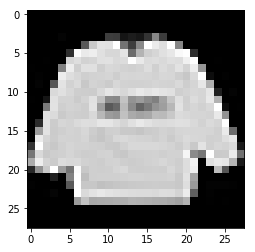

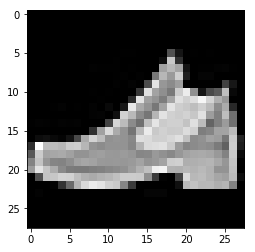

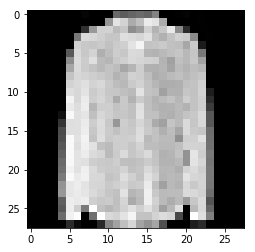

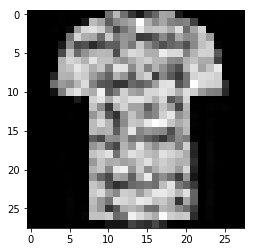

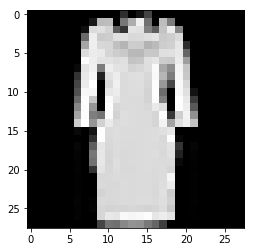

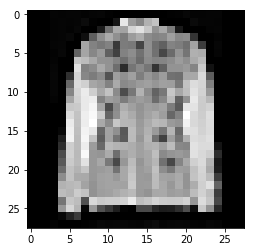

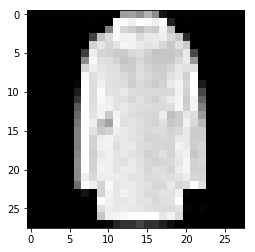

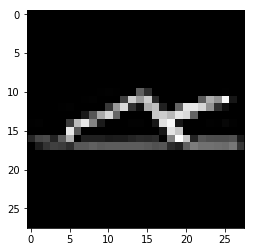

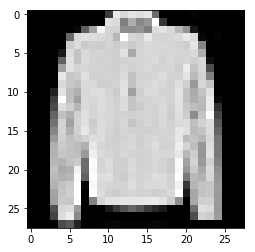

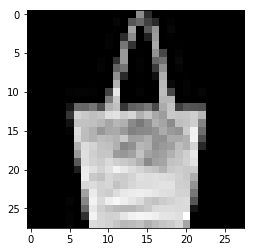

In [28]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(i)
    plt.imshow(X[i].reshape((28,28)),cmap='gray')

In [29]:
# CNN MODEL

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(Convolution2D(8,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()



Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 8)           2312      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam'
              ,metrics=["accuracy"])

In [31]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256
                 ,validation_split=0.20)


Instructions for updating:
Use tf.cast instead.


Train on 48000 samples, validate on 12000 samples
Epoch 1/20


  256/48000 [..............................] - ETA: 11:58 - loss: 2.3072 - acc: 0.0586

  512/48000 [..............................] - ETA: 7:15 - loss: 2.3033 - acc: 0.1230 

  768/48000 [..............................] - ETA: 5:41 - loss: 2.2931 - acc: 0.1628

 1024/48000 [..............................] - ETA: 4:53 - loss: 2.2835 - acc: 0.1865

 1280/48000 [..............................] - ETA: 4:24 - loss: 2.2699 - acc: 0.2328

 1536/48000 [..............................] - ETA: 4:04 - loss: 2.2572 - acc: 0.2598

 1792/48000 [>.............................] - ETA: 3:50 - loss: 2.2431 - acc: 0.2801

 2048/48000 [>.............................] - ETA: 3:39 - loss: 2.2299 - acc: 0.2871

 2304/48000 [>.............................] - ETA: 3:30 - loss: 2.2124 - acc: 0.3038

 2560/48000 [>.............................] - ETA: 3:24 - loss: 2.1903 - acc: 0.3172

 2816/48000 [>.............................] - ETA: 3:18 - loss: 2.1650 - acc: 0.3256

 3072/48000 [>.............................] - ETA: 3:13 - loss: 2.1354 - acc: 0.3366

 3328/48000 [=>............................] - ETA: 3:08 - loss: 2.1044 - acc: 0.3459

 3584/48000 [=>............................] - ETA: 3:04 - loss: 2.0734 - acc: 0.3530

 3840/48000 [=>............................] - ETA: 3:01 - loss: 2.0352 - acc: 0.3667

 4096/48000 [=>............................] - ETA: 2:57 - loss: 1.9969 - acc: 0.3816

 4352/48000 [=>............................] - ETA: 2:54 - loss: 1.9538 - acc: 0.3913

 4608/48000 [=>............................] - ETA: 2:51 - loss: 1.9082 - acc: 0.4045

 4864/48000 [==>...........................] - ETA: 2:49 - loss: 1.8665 - acc: 0.4153

 5120/48000 [==>...........................] - ETA: 2:47 - loss: 1.8216 - acc: 0.4271

 5376/48000 [==>...........................] - ETA: 2:45 - loss: 1.7851 - acc: 0.4371

 5632/48000 [==>...........................] - ETA: 2:43 - loss: 1.7491 - acc: 0.4462

 5888/48000 [==>...........................] - ETA: 2:41 - loss: 1.7146 - acc: 0.4548

 6144/48000 [==>...........................] - ETA: 2:39 - loss: 1.6769 - acc: 0.4652

 6400/48000 [===>..........................] - ETA: 2:37 - loss: 1.6466 - acc: 0.4722

 6656/48000 [===>..........................] - ETA: 2:35 - loss: 1.6182 - acc: 0.4794

 6912/48000 [===>..........................] - ETA: 2:34 - loss: 1.5857 - acc: 0.4897

 7168/48000 [===>..........................] - ETA: 2:32 - loss: 1.5588 - acc: 0.4972

 7424/48000 [===>..........................] - ETA: 2:31 - loss: 1.5339 - acc: 0.5036

 7680/48000 [===>..........................] - ETA: 2:29 - loss: 1.5090 - acc: 0.5111

 7936/48000 [===>..........................] - ETA: 2:27 - loss: 1.4857 - acc: 0.5170

 8192/48000 [====>.........................] - ETA: 2:26 - loss: 1.4670 - acc: 0.5223

 8448/48000 [====>.........................] - ETA: 2:25 - loss: 1.4461 - acc: 0.5283

 8704/48000 [====>.........................] - ETA: 2:23 - loss: 1.4268 - acc: 0.5340

 8960/48000 [====>.........................] - ETA: 2:22 - loss: 1.4076 - acc: 0.5397

 9216/48000 [====>.........................] - ETA: 2:21 - loss: 1.3901 - acc: 0.5448

 9472/48000 [====>.........................] - ETA: 2:19 - loss: 1.3740 - acc: 0.5494

 9728/48000 [=====>........................] - ETA: 2:18 - loss: 1.3575 - acc: 0.5540

 9984/48000 [=====>........................] - ETA: 2:17 - loss: 1.3412 - acc: 0.5590

10240/48000 [=====>........................] - ETA: 2:16 - loss: 1.3262 - acc: 0.5634

10496/48000 [=====>........................] - ETA: 2:14 - loss: 1.3132 - acc: 0.5673

10752/48000 [=====>........................] - ETA: 2:13 - loss: 1.3001 - acc: 0.5707

11008/48000 [=====>........................] - ETA: 2:12 - loss: 1.2888 - acc: 0.5735

11264/48000 [======>.......................] - ETA: 2:11 - loss: 1.2727 - acc: 0.5780

11520/48000 [======>.......................] - ETA: 2:10 - loss: 1.2601 - acc: 0.5815

11776/48000 [======>.......................] - ETA: 2:09 - loss: 1.2481 - acc: 0.5848

12032/48000 [======>.......................] - ETA: 2:08 - loss: 1.2366 - acc: 0.5882

12288/48000 [======>.......................] - ETA: 2:07 - loss: 1.2241 - acc: 0.5922

12544/48000 [======>.......................] - ETA: 2:06 - loss: 1.2132 - acc: 0.5952

12800/48000 [=======>......................] - ETA: 2:04 - loss: 1.2035 - acc: 0.5975

13056/48000 [=======>......................] - ETA: 2:03 - loss: 1.1950 - acc: 0.5998

13312/48000 [=======>......................] - ETA: 2:02 - loss: 1.1842 - acc: 0.6031

13568/48000 [=======>......................] - ETA: 2:01 - loss: 1.1733 - acc: 0.6060

13824/48000 [=======>......................] - ETA: 2:00 - loss: 1.1650 - acc: 0.6082

14080/48000 [=======>......................] - ETA: 1:59 - loss: 1.1565 - acc: 0.6107

14336/48000 [=======>......................] - ETA: 1:58 - loss: 1.1479 - acc: 0.6132

14592/48000 [========>.....................] - ETA: 1:57 - loss: 1.1392 - acc: 0.6160

14848/48000 [========>.....................] - ETA: 1:56 - loss: 1.1302 - acc: 0.6187

15104/48000 [========>.....................] - ETA: 1:55 - loss: 1.1234 - acc: 0.6209

15360/48000 [========>.....................] - ETA: 1:54 - loss: 1.1162 - acc: 0.6229

15616/48000 [========>.....................] - ETA: 1:53 - loss: 1.1078 - acc: 0.6252

15872/48000 [========>.....................] - ETA: 1:52 - loss: 1.1001 - acc: 0.6278

16128/48000 [=========>....................] - ETA: 1:51 - loss: 1.0952 - acc: 0.6289

16384/48000 [=========>....................] - ETA: 1:50 - loss: 1.0869 - acc: 0.6313

16640/48000 [=========>....................] - ETA: 1:49 - loss: 1.0807 - acc: 0.6337

16896/48000 [=========>....................] - ETA: 1:48 - loss: 1.0765 - acc: 0.6346

17152/48000 [=========>....................] - ETA: 1:47 - loss: 1.0709 - acc: 0.6363

17408/48000 [=========>....................] - ETA: 1:46 - loss: 1.0643 - acc: 0.6382

17664/48000 [==========>...................] - ETA: 1:45 - loss: 1.0579 - acc: 0.6397

17920/48000 [==========>...................] - ETA: 1:44 - loss: 1.0514 - acc: 0.6417

18176/48000 [==========>...................] - ETA: 1:43 - loss: 1.0443 - acc: 0.6442

18432/48000 [==========>...................] - ETA: 1:42 - loss: 1.0398 - acc: 0.6452

18688/48000 [==========>...................] - ETA: 1:41 - loss: 1.0343 - acc: 0.6468

18944/48000 [==========>...................] - ETA: 1:41 - loss: 1.0282 - acc: 0.6487

19200/48000 [===========>..................] - ETA: 1:40 - loss: 1.0223 - acc: 0.6507

19456/48000 [===========>..................] - ETA: 1:39 - loss: 1.0169 - acc: 0.6521

19712/48000 [===========>..................] - ETA: 1:38 - loss: 1.0117 - acc: 0.6539

19968/48000 [===========>..................] - ETA: 1:37 - loss: 1.0062 - acc: 0.6555

20224/48000 [===========>..................] - ETA: 1:37 - loss: 1.0011 - acc: 0.6574

20480/48000 [===========>..................] - ETA: 1:36 - loss: 0.9970 - acc: 0.6587

20736/48000 [===========>..................] - ETA: 1:35 - loss: 0.9926 - acc: 0.6601

20992/48000 [============>.................] - ETA: 1:34 - loss: 0.9875 - acc: 0.6617

21248/48000 [============>.................] - ETA: 1:34 - loss: 0.9820 - acc: 0.6635

21504/48000 [============>.................] - ETA: 1:33 - loss: 0.9769 - acc: 0.6650

21760/48000 [============>.................] - ETA: 1:32 - loss: 0.9713 - acc: 0.6667

22016/48000 [============>.................] - ETA: 1:32 - loss: 0.9672 - acc: 0.6678

22272/48000 [============>.................] - ETA: 1:31 - loss: 0.9622 - acc: 0.6696

22528/48000 [=============>................] - ETA: 1:30 - loss: 0.9596 - acc: 0.6705

22784/48000 [=============>................] - ETA: 1:29 - loss: 0.9554 - acc: 0.6718

23040/48000 [=============>................] - ETA: 1:28 - loss: 0.9515 - acc: 0.6730

23296/48000 [=============>................] - ETA: 1:27 - loss: 0.9477 - acc: 0.6742

23552/48000 [=============>................] - ETA: 1:26 - loss: 0.9428 - acc: 0.6757

23808/48000 [=============>................] - ETA: 1:25 - loss: 0.9395 - acc: 0.6764

24064/48000 [==============>...............] - ETA: 1:24 - loss: 0.9353 - acc: 0.6775

24320/48000 [==============>...............] - ETA: 1:23 - loss: 0.9312 - acc: 0.6788

24576/48000 [==============>...............] - ETA: 1:22 - loss: 0.9272 - acc: 0.6801

24832/48000 [==============>...............] - ETA: 1:21 - loss: 0.9227 - acc: 0.6819

25088/48000 [==============>...............] - ETA: 1:21 - loss: 0.9190 - acc: 0.6829

25344/48000 [==============>...............] - ETA: 1:20 - loss: 0.9151 - acc: 0.6839

25600/48000 [===============>..............] - ETA: 1:19 - loss: 0.9117 - acc: 0.6853

25856/48000 [===============>..............] - ETA: 1:18 - loss: 0.9086 - acc: 0.6863

26112/48000 [===============>..............] - ETA: 1:17 - loss: 0.9056 - acc: 0.6873

26368/48000 [===============>..............] - ETA: 1:16 - loss: 0.9027 - acc: 0.6880

26624/48000 [===============>..............] - ETA: 1:15 - loss: 0.8995 - acc: 0.6890

26880/48000 [===============>..............] - ETA: 1:14 - loss: 0.8962 - acc: 0.6898

27136/48000 [===============>..............] - ETA: 1:13 - loss: 0.8934 - acc: 0.6909

27392/48000 [================>.............] - ETA: 1:12 - loss: 0.8914 - acc: 0.6915

27648/48000 [================>.............] - ETA: 1:11 - loss: 0.8881 - acc: 0.6927

27904/48000 [================>.............] - ETA: 1:10 - loss: 0.8850 - acc: 0.6938

28160/48000 [================>.............] - ETA: 1:09 - loss: 0.8830 - acc: 0.6942

28416/48000 [================>.............] - ETA: 1:08 - loss: 0.8799 - acc: 0.6951

28672/48000 [================>.............] - ETA: 1:07 - loss: 0.8772 - acc: 0.6958

28928/48000 [=================>............] - ETA: 1:06 - loss: 0.8748 - acc: 0.6963

29184/48000 [=================>............] - ETA: 1:05 - loss: 0.8718 - acc: 0.6971

29440/48000 [=================>............] - ETA: 1:04 - loss: 0.8691 - acc: 0.6975

29696/48000 [=================>............] - ETA: 1:04 - loss: 0.8670 - acc: 0.6982

29952/48000 [=================>............] - ETA: 1:03 - loss: 0.8647 - acc: 0.6987

30208/48000 [=================>............] - ETA: 1:02 - loss: 0.8618 - acc: 0.6995

30464/48000 [==================>...........] - ETA: 1:01 - loss: 0.8592 - acc: 0.7002

30720/48000 [==================>...........] - ETA: 1:00 - loss: 0.8564 - acc: 0.7013

30976/48000 [==================>...........] - ETA: 59s - loss: 0.8546 - acc: 0.7019 

31232/48000 [==================>...........] - ETA: 58s - loss: 0.8512 - acc: 0.7030

31488/48000 [==================>...........] - ETA: 57s - loss: 0.8487 - acc: 0.7039

31744/48000 [==================>...........] - ETA: 56s - loss: 0.8465 - acc: 0.7048

32000/48000 [===================>..........] - ETA: 55s - loss: 0.8439 - acc: 0.7055

32256/48000 [===================>..........] - ETA: 54s - loss: 0.8416 - acc: 0.7060

32512/48000 [===================>..........] - ETA: 53s - loss: 0.8392 - acc: 0.7069

32768/48000 [===================>..........] - ETA: 53s - loss: 0.8365 - acc: 0.7079

33024/48000 [===================>..........] - ETA: 52s - loss: 0.8345 - acc: 0.7088

33280/48000 [===================>..........] - ETA: 51s - loss: 0.8316 - acc: 0.7096

33536/48000 [===================>..........] - ETA: 50s - loss: 0.8298 - acc: 0.7102

33792/48000 [====================>.........] - ETA: 49s - loss: 0.8273 - acc: 0.7112

34048/48000 [====================>.........] - ETA: 48s - loss: 0.8260 - acc: 0.7118

34304/48000 [====================>.........] - ETA: 47s - loss: 0.8240 - acc: 0.7127

34560/48000 [====================>.........] - ETA: 46s - loss: 0.8214 - acc: 0.7134

34816/48000 [====================>.........] - ETA: 45s - loss: 0.8192 - acc: 0.7140

35072/48000 [====================>.........] - ETA: 44s - loss: 0.8171 - acc: 0.7146

35328/48000 [=====================>........] - ETA: 43s - loss: 0.8156 - acc: 0.7152

35584/48000 [=====================>........] - ETA: 43s - loss: 0.8132 - acc: 0.7160

35840/48000 [=====================>........] - ETA: 42s - loss: 0.8106 - acc: 0.7169

36096/48000 [=====================>........] - ETA: 41s - loss: 0.8088 - acc: 0.7174

36352/48000 [=====================>........] - ETA: 40s - loss: 0.8079 - acc: 0.7178

36608/48000 [=====================>........] - ETA: 39s - loss: 0.8057 - acc: 0.7186

36864/48000 [======================>.......] - ETA: 38s - loss: 0.8036 - acc: 0.7192

37120/48000 [======================>.......] - ETA: 37s - loss: 0.8015 - acc: 0.7199

37376/48000 [======================>.......] - ETA: 36s - loss: 0.7992 - acc: 0.7208

37632/48000 [======================>.......] - ETA: 35s - loss: 0.7975 - acc: 0.7213

37888/48000 [======================>.......] - ETA: 34s - loss: 0.7957 - acc: 0.7219

38144/48000 [======================>.......] - ETA: 34s - loss: 0.7942 - acc: 0.7224

38400/48000 [=======================>......] - ETA: 33s - loss: 0.7924 - acc: 0.7232

38656/48000 [=======================>......] - ETA: 32s - loss: 0.7901 - acc: 0.7240

38912/48000 [=======================>......] - ETA: 31s - loss: 0.7879 - acc: 0.7247

39168/48000 [=======================>......] - ETA: 30s - loss: 0.7863 - acc: 0.7253

39424/48000 [=======================>......] - ETA: 29s - loss: 0.7842 - acc: 0.7260

39680/48000 [=======================>......] - ETA: 28s - loss: 0.7828 - acc: 0.7264

39936/48000 [=======================>......] - ETA: 27s - loss: 0.7810 - acc: 0.7271

40192/48000 [========================>.....] - ETA: 26s - loss: 0.7797 - acc: 0.7274

40448/48000 [========================>.....] - ETA: 26s - loss: 0.7783 - acc: 0.7277

40704/48000 [========================>.....] - ETA: 25s - loss: 0.7764 - acc: 0.7284

40960/48000 [========================>.....] - ETA: 24s - loss: 0.7747 - acc: 0.7290

41216/48000 [========================>.....] - ETA: 23s - loss: 0.7725 - acc: 0.7297

41472/48000 [========================>.....] - ETA: 22s - loss: 0.7718 - acc: 0.7301

41728/48000 [=========================>....] - ETA: 21s - loss: 0.7703 - acc: 0.7305

41984/48000 [=========================>....] - ETA: 20s - loss: 0.7682 - acc: 0.7311

42240/48000 [=========================>....] - ETA: 19s - loss: 0.7664 - acc: 0.7318

42496/48000 [=========================>....] - ETA: 19s - loss: 0.7648 - acc: 0.7323

42752/48000 [=========================>....] - ETA: 18s - loss: 0.7631 - acc: 0.7328

43008/48000 [=========================>....] - ETA: 17s - loss: 0.7618 - acc: 0.7334

43264/48000 [==========================>...] - ETA: 16s - loss: 0.7610 - acc: 0.7337

43520/48000 [==========================>...] - ETA: 15s - loss: 0.7596 - acc: 0.7341

43776/48000 [==========================>...] - ETA: 14s - loss: 0.7579 - acc: 0.7346

44032/48000 [==========================>...] - ETA: 13s - loss: 0.7566 - acc: 0.7350

44288/48000 [==========================>...] - ETA: 12s - loss: 0.7549 - acc: 0.7354

44544/48000 [==========================>...] - ETA: 11s - loss: 0.7538 - acc: 0.7358

44800/48000 [===========================>..] - ETA: 11s - loss: 0.7525 - acc: 0.7362

45056/48000 [===========================>..] - ETA: 10s - loss: 0.7514 - acc: 0.7364

45312/48000 [===========================>..] - ETA: 9s - loss: 0.7503 - acc: 0.7369 

45568/48000 [===========================>..] - ETA: 8s - loss: 0.7486 - acc: 0.7375

45824/48000 [===========================>..] - ETA: 7s - loss: 0.7473 - acc: 0.7378

46080/48000 [===========================>..] - ETA: 6s - loss: 0.7463 - acc: 0.7383

46336/48000 [===========================>..] - ETA: 5s - loss: 0.7453 - acc: 0.7386

46592/48000 [============================>.] - ETA: 4s - loss: 0.7442 - acc: 0.7389

46848/48000 [============================>.] - ETA: 3s - loss: 0.7430 - acc: 0.7393

47104/48000 [============================>.] - ETA: 3s - loss: 0.7413 - acc: 0.7399

47360/48000 [============================>.] - ETA: 2s - loss: 0.7398 - acc: 0.7404

47616/48000 [============================>.] - ETA: 1s - loss: 0.7382 - acc: 0.7408

47872/48000 [============================>.] - ETA: 0s - loss: 0.7368 - acc: 0.7414

48000/48000 [==============================] - 175s 4ms/step - loss: 0.7363 - acc: 0.7415 - val_loss: 0.5186 - val_acc: 0.8217


Epoch 2/20


  256/48000 [..............................] - ETA: 2:38 - loss: 0.4334 - acc: 0.8320

  512/48000 [..............................] - ETA: 2:37 - loss: 0.4506 - acc: 0.8281

  768/48000 [..............................] - ETA: 2:41 - loss: 0.4538 - acc: 0.8203

 1024/48000 [..............................] - ETA: 2:41 - loss: 0.4817 - acc: 0.8086

 1280/48000 [..............................] - ETA: 2:40 - loss: 0.4745 - acc: 0.8117

 1536/48000 [..............................] - ETA: 2:38 - loss: 0.4564 - acc: 0.8223

 1792/48000 [>.............................] - ETA: 2:37 - loss: 0.4652 - acc: 0.8214

 2048/48000 [>.............................] - ETA: 2:35 - loss: 0.4854 - acc: 0.8193

 2304/48000 [>.............................] - ETA: 2:35 - loss: 0.4773 - acc: 0.8229

 2560/48000 [>.............................] - ETA: 2:34 - loss: 0.4708 - acc: 0.8250

 2816/48000 [>.............................] - ETA: 2:32 - loss: 0.4763 - acc: 0.8224

 3072/48000 [>.............................] - ETA: 2:32 - loss: 0.4676 - acc: 0.8275

 3328/48000 [=>............................] - ETA: 2:31 - loss: 0.4612 - acc: 0.8299

 3584/48000 [=>............................] - ETA: 2:30 - loss: 0.4605 - acc: 0.8318

 3840/48000 [=>............................] - ETA: 2:29 - loss: 0.4606 - acc: 0.8315

 4096/48000 [=>............................] - ETA: 2:28 - loss: 0.4543 - acc: 0.8337

 4352/48000 [=>............................] - ETA: 2:26 - loss: 0.4516 - acc: 0.8346

 4608/48000 [=>............................] - ETA: 2:25 - loss: 0.4517 - acc: 0.8351

 4864/48000 [==>...........................] - ETA: 2:24 - loss: 0.4578 - acc: 0.8322

 5120/48000 [==>...........................] - ETA: 2:23 - loss: 0.4530 - acc: 0.8340

 5376/48000 [==>...........................] - ETA: 2:22 - loss: 0.4500 - acc: 0.8344

 5632/48000 [==>...........................] - ETA: 2:22 - loss: 0.4528 - acc: 0.8336

 5888/48000 [==>...........................] - ETA: 2:21 - loss: 0.4550 - acc: 0.8339

 6144/48000 [==>...........................] - ETA: 2:20 - loss: 0.4504 - acc: 0.8354

 6400/48000 [===>..........................] - ETA: 2:19 - loss: 0.4521 - acc: 0.8355

 6656/48000 [===>..........................] - ETA: 2:18 - loss: 0.4541 - acc: 0.8338

 6912/48000 [===>..........................] - ETA: 2:17 - loss: 0.4543 - acc: 0.8341

 7168/48000 [===>..........................] - ETA: 2:16 - loss: 0.4562 - acc: 0.8336

 7424/48000 [===>..........................] - ETA: 2:15 - loss: 0.4567 - acc: 0.8331

 7680/48000 [===>..........................] - ETA: 2:14 - loss: 0.4565 - acc: 0.8337

 7936/48000 [===>..........................] - ETA: 2:14 - loss: 0.4554 - acc: 0.8343

 8192/48000 [====>.........................] - ETA: 2:13 - loss: 0.4537 - acc: 0.8354

 8448/48000 [====>.........................] - ETA: 2:12 - loss: 0.4542 - acc: 0.8348

 8704/48000 [====>.........................] - ETA: 2:11 - loss: 0.4543 - acc: 0.8349

 8960/48000 [====>.........................] - ETA: 2:10 - loss: 0.4530 - acc: 0.8357

 9216/48000 [====>.........................] - ETA: 2:09 - loss: 0.4517 - acc: 0.8359

 9472/48000 [====>.........................] - ETA: 2:08 - loss: 0.4537 - acc: 0.8352

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.4549 - acc: 0.8348

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.4560 - acc: 0.8342

10240/48000 [=====>........................] - ETA: 2:06 - loss: 0.4569 - acc: 0.8341

10496/48000 [=====>........................] - ETA: 2:05 - loss: 0.4597 - acc: 0.8337

10752/48000 [=====>........................] - ETA: 2:04 - loss: 0.4622 - acc: 0.8334

11008/48000 [=====>........................] - ETA: 2:03 - loss: 0.4618 - acc: 0.8339

11264/48000 [======>.......................] - ETA: 2:02 - loss: 0.4627 - acc: 0.8332

11520/48000 [======>.......................] - ETA: 2:01 - loss: 0.4616 - acc: 0.8338

11776/48000 [======>.......................] - ETA: 2:00 - loss: 0.4616 - acc: 0.8335

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.4630 - acc: 0.8335

12288/48000 [======>.......................] - ETA: 1:59 - loss: 0.4638 - acc: 0.8335

12544/48000 [======>.......................] - ETA: 1:58 - loss: 0.4624 - acc: 0.8343

12800/48000 [=======>......................] - ETA: 1:57 - loss: 0.4638 - acc: 0.8344

13056/48000 [=======>......................] - ETA: 1:56 - loss: 0.4659 - acc: 0.8336

13312/48000 [=======>......................] - ETA: 1:55 - loss: 0.4640 - acc: 0.8342

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.4640 - acc: 0.8338

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.4650 - acc: 0.8335

14080/48000 [=======>......................] - ETA: 1:53 - loss: 0.4642 - acc: 0.8338

14336/48000 [=======>......................] - ETA: 1:52 - loss: 0.4627 - acc: 0.8343

14592/48000 [========>.....................] - ETA: 1:51 - loss: 0.4633 - acc: 0.8342

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.4634 - acc: 0.8343

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.4641 - acc: 0.8342

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.4638 - acc: 0.8345

15616/48000 [========>.....................] - ETA: 1:48 - loss: 0.4638 - acc: 0.8341

15872/48000 [========>.....................] - ETA: 1:47 - loss: 0.4639 - acc: 0.8341

16128/48000 [=========>....................] - ETA: 1:46 - loss: 0.4644 - acc: 0.8338

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.4638 - acc: 0.8335

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.4640 - acc: 0.8334

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.4637 - acc: 0.8339

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.4634 - acc: 0.8341

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.4635 - acc: 0.8340

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.4631 - acc: 0.8339

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.4631 - acc: 0.8337

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.4620 - acc: 0.8341

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.4627 - acc: 0.8339

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.4618 - acc: 0.8342

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.4622 - acc: 0.8340

19200/48000 [===========>..................] - ETA: 1:35 - loss: 0.4606 - acc: 0.8349

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.4607 - acc: 0.8348

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.4605 - acc: 0.8352

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.4610 - acc: 0.8351

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.4608 - acc: 0.8354

20480/48000 [===========>..................] - ETA: 1:31 - loss: 0.4601 - acc: 0.8356

20736/48000 [===========>..................] - ETA: 1:30 - loss: 0.4590 - acc: 0.8363

20992/48000 [============>.................] - ETA: 1:29 - loss: 0.4583 - acc: 0.8363

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.4576 - acc: 0.8365

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.4576 - acc: 0.8364

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.4580 - acc: 0.8363

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.4587 - acc: 0.8359

22272/48000 [============>.................] - ETA: 1:25 - loss: 0.4585 - acc: 0.8358

22528/48000 [=============>................] - ETA: 1:24 - loss: 0.4592 - acc: 0.8353

22784/48000 [=============>................] - ETA: 1:23 - loss: 0.4585 - acc: 0.8356

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.4584 - acc: 0.8356

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.4583 - acc: 0.8355

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.4583 - acc: 0.8353

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.4584 - acc: 0.8353

24064/48000 [==============>...............] - ETA: 1:19 - loss: 0.4590 - acc: 0.8350

24320/48000 [==============>...............] - ETA: 1:18 - loss: 0.4585 - acc: 0.8348

24576/48000 [==============>...............] - ETA: 1:17 - loss: 0.4586 - acc: 0.8346

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.4582 - acc: 0.8346

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.4585 - acc: 0.8344

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.4580 - acc: 0.8348

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.4585 - acc: 0.8346

25856/48000 [===============>..............] - ETA: 1:13 - loss: 0.4584 - acc: 0.8347

26112/48000 [===============>..............] - ETA: 1:12 - loss: 0.4578 - acc: 0.8349

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.4576 - acc: 0.8351

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.4565 - acc: 0.8353

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.4563 - acc: 0.8355

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.4554 - acc: 0.8359

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.4556 - acc: 0.8358

27648/48000 [================>.............] - ETA: 1:07 - loss: 0.4551 - acc: 0.8362

27904/48000 [================>.............] - ETA: 1:06 - loss: 0.4545 - acc: 0.8364

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.4550 - acc: 0.8363

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.4550 - acc: 0.8365

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.4551 - acc: 0.8361

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.4556 - acc: 0.8363

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.4565 - acc: 0.8362

29440/48000 [=================>............] - ETA: 1:01 - loss: 0.4561 - acc: 0.8362

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.4564 - acc: 0.8361

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.4571 - acc: 0.8357

30208/48000 [=================>............] - ETA: 59s - loss: 0.4574 - acc: 0.8356 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.4577 - acc: 0.8356

30720/48000 [==================>...........] - ETA: 57s - loss: 0.4569 - acc: 0.8359

30976/48000 [==================>...........] - ETA: 56s - loss: 0.4564 - acc: 0.8359

31232/48000 [==================>...........] - ETA: 56s - loss: 0.4560 - acc: 0.8360

31488/48000 [==================>...........] - ETA: 55s - loss: 0.4557 - acc: 0.8362

31744/48000 [==================>...........] - ETA: 54s - loss: 0.4548 - acc: 0.8366

32000/48000 [===================>..........] - ETA: 53s - loss: 0.4544 - acc: 0.8368

32256/48000 [===================>..........] - ETA: 52s - loss: 0.4542 - acc: 0.8370

32512/48000 [===================>..........] - ETA: 51s - loss: 0.4542 - acc: 0.8370

32768/48000 [===================>..........] - ETA: 50s - loss: 0.4542 - acc: 0.8369

33024/48000 [===================>..........] - ETA: 50s - loss: 0.4539 - acc: 0.8369

33280/48000 [===================>..........] - ETA: 49s - loss: 0.4541 - acc: 0.8368

33536/48000 [===================>..........] - ETA: 48s - loss: 0.4534 - acc: 0.8372

33792/48000 [====================>.........] - ETA: 47s - loss: 0.4529 - acc: 0.8372

34048/48000 [====================>.........] - ETA: 46s - loss: 0.4524 - acc: 0.8374

34304/48000 [====================>.........] - ETA: 45s - loss: 0.4522 - acc: 0.8374

34560/48000 [====================>.........] - ETA: 44s - loss: 0.4515 - acc: 0.8375

34816/48000 [====================>.........] - ETA: 44s - loss: 0.4510 - acc: 0.8377

35072/48000 [====================>.........] - ETA: 43s - loss: 0.4510 - acc: 0.8377

35328/48000 [=====================>........] - ETA: 42s - loss: 0.4505 - acc: 0.8381

35584/48000 [=====================>........] - ETA: 41s - loss: 0.4507 - acc: 0.8381

35840/48000 [=====================>........] - ETA: 40s - loss: 0.4509 - acc: 0.8383

36096/48000 [=====================>........] - ETA: 39s - loss: 0.4512 - acc: 0.8384

36352/48000 [=====================>........] - ETA: 38s - loss: 0.4512 - acc: 0.8386

36608/48000 [=====================>........] - ETA: 38s - loss: 0.4506 - acc: 0.8387

36864/48000 [======================>.......] - ETA: 37s - loss: 0.4502 - acc: 0.8389

37120/48000 [======================>.......] - ETA: 36s - loss: 0.4502 - acc: 0.8391

37376/48000 [======================>.......] - ETA: 35s - loss: 0.4497 - acc: 0.8394

37632/48000 [======================>.......] - ETA: 34s - loss: 0.4494 - acc: 0.8393

37888/48000 [======================>.......] - ETA: 33s - loss: 0.4490 - acc: 0.8397

38144/48000 [======================>.......] - ETA: 32s - loss: 0.4488 - acc: 0.8398

38400/48000 [=======================>......] - ETA: 32s - loss: 0.4481 - acc: 0.8400

38656/48000 [=======================>......] - ETA: 31s - loss: 0.4480 - acc: 0.8402

38912/48000 [=======================>......] - ETA: 30s - loss: 0.4481 - acc: 0.8403

39168/48000 [=======================>......] - ETA: 29s - loss: 0.4480 - acc: 0.8401

39424/48000 [=======================>......] - ETA: 28s - loss: 0.4479 - acc: 0.8401

39680/48000 [=======================>......] - ETA: 27s - loss: 0.4473 - acc: 0.8402

39936/48000 [=======================>......] - ETA: 26s - loss: 0.4469 - acc: 0.8403

40192/48000 [========================>.....] - ETA: 26s - loss: 0.4469 - acc: 0.8403

40448/48000 [========================>.....] - ETA: 25s - loss: 0.4464 - acc: 0.8406

40704/48000 [========================>.....] - ETA: 24s - loss: 0.4465 - acc: 0.8404

40960/48000 [========================>.....] - ETA: 23s - loss: 0.4467 - acc: 0.8405

41216/48000 [========================>.....] - ETA: 22s - loss: 0.4465 - acc: 0.8405

41472/48000 [========================>.....] - ETA: 21s - loss: 0.4467 - acc: 0.8404

41728/48000 [=========================>....] - ETA: 20s - loss: 0.4462 - acc: 0.8407

41984/48000 [=========================>....] - ETA: 20s - loss: 0.4456 - acc: 0.8408

42240/48000 [=========================>....] - ETA: 19s - loss: 0.4453 - acc: 0.8411

42496/48000 [=========================>....] - ETA: 18s - loss: 0.4454 - acc: 0.8411

42752/48000 [=========================>....] - ETA: 17s - loss: 0.4454 - acc: 0.8412

43008/48000 [=========================>....] - ETA: 16s - loss: 0.4447 - acc: 0.8414

43264/48000 [==========================>...] - ETA: 15s - loss: 0.4447 - acc: 0.8414

43520/48000 [==========================>...] - ETA: 14s - loss: 0.4448 - acc: 0.8415

43776/48000 [==========================>...] - ETA: 14s - loss: 0.4451 - acc: 0.8414

44032/48000 [==========================>...] - ETA: 13s - loss: 0.4449 - acc: 0.8415

44288/48000 [==========================>...] - ETA: 12s - loss: 0.4447 - acc: 0.8416

44544/48000 [==========================>...] - ETA: 11s - loss: 0.4447 - acc: 0.8415

44800/48000 [===========================>..] - ETA: 10s - loss: 0.4449 - acc: 0.8414

45056/48000 [===========================>..] - ETA: 9s - loss: 0.4449 - acc: 0.8414 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.4445 - acc: 0.8415

45568/48000 [===========================>..] - ETA: 8s - loss: 0.4442 - acc: 0.8416

45824/48000 [===========================>..] - ETA: 7s - loss: 0.4442 - acc: 0.8416

46080/48000 [===========================>..] - ETA: 6s - loss: 0.4437 - acc: 0.8418

46336/48000 [===========================>..] - ETA: 5s - loss: 0.4432 - acc: 0.8419

46592/48000 [============================>.] - ETA: 4s - loss: 0.4432 - acc: 0.8420

46848/48000 [============================>.] - ETA: 3s - loss: 0.4432 - acc: 0.8420

47104/48000 [============================>.] - ETA: 2s - loss: 0.4431 - acc: 0.8422

47360/48000 [============================>.] - ETA: 2s - loss: 0.4427 - acc: 0.8422

47616/48000 [============================>.] - ETA: 1s - loss: 0.4422 - acc: 0.8425

47872/48000 [============================>.] - ETA: 0s - loss: 0.4419 - acc: 0.8427

48000/48000 [==============================] - 169s 4ms/step - loss: 0.4418 - acc: 0.8428 - val_loss: 0.4340 - val_acc: 0.8515


Epoch 3/20


  256/48000 [..............................] - ETA: 2:43 - loss: 0.3713 - acc: 0.8828

  512/48000 [..............................] - ETA: 2:39 - loss: 0.3686 - acc: 0.8613

  768/48000 [..............................] - ETA: 2:39 - loss: 0.3704 - acc: 0.8633

 1024/48000 [..............................] - ETA: 2:37 - loss: 0.3715 - acc: 0.8584

 1280/48000 [..............................] - ETA: 2:35 - loss: 0.3864 - acc: 0.8547

 1536/48000 [..............................] - ETA: 2:34 - loss: 0.3929 - acc: 0.8535

 1792/48000 [>.............................] - ETA: 2:33 - loss: 0.3933 - acc: 0.8532

 2048/48000 [>.............................] - ETA: 2:32 - loss: 0.3921 - acc: 0.8521

 2304/48000 [>.............................] - ETA: 2:31 - loss: 0.3991 - acc: 0.8490

 2560/48000 [>.............................] - ETA: 2:30 - loss: 0.4105 - acc: 0.8492

 2816/48000 [>.............................] - ETA: 2:29 - loss: 0.4107 - acc: 0.8491

 3072/48000 [>.............................] - ETA: 2:28 - loss: 0.4083 - acc: 0.8529

 3328/48000 [=>............................] - ETA: 2:27 - loss: 0.4064 - acc: 0.8546

 3584/48000 [=>............................] - ETA: 2:26 - loss: 0.3998 - acc: 0.8566

 3840/48000 [=>............................] - ETA: 2:26 - loss: 0.3960 - acc: 0.8578

 4096/48000 [=>............................] - ETA: 2:25 - loss: 0.3942 - acc: 0.8572

 4352/48000 [=>............................] - ETA: 2:24 - loss: 0.3949 - acc: 0.8573

 4608/48000 [=>............................] - ETA: 2:23 - loss: 0.3973 - acc: 0.8570

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.3947 - acc: 0.8579

 5120/48000 [==>...........................] - ETA: 2:22 - loss: 0.3923 - acc: 0.8596

 5376/48000 [==>...........................] - ETA: 2:21 - loss: 0.3903 - acc: 0.8603

 5632/48000 [==>...........................] - ETA: 2:20 - loss: 0.3902 - acc: 0.8606

 5888/48000 [==>...........................] - ETA: 2:19 - loss: 0.3931 - acc: 0.8602

 6144/48000 [==>...........................] - ETA: 2:18 - loss: 0.3912 - acc: 0.8604

 6400/48000 [===>..........................] - ETA: 2:18 - loss: 0.3914 - acc: 0.8605

 6656/48000 [===>..........................] - ETA: 2:17 - loss: 0.3882 - acc: 0.8607

 6912/48000 [===>..........................] - ETA: 2:16 - loss: 0.3877 - acc: 0.8607

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 0.3884 - acc: 0.8606

 7424/48000 [===>..........................] - ETA: 2:14 - loss: 0.3905 - acc: 0.8598

 7680/48000 [===>..........................] - ETA: 2:13 - loss: 0.3912 - acc: 0.8596

 7936/48000 [===>..........................] - ETA: 2:13 - loss: 0.3921 - acc: 0.8595

 8192/48000 [====>.........................] - ETA: 2:12 - loss: 0.3916 - acc: 0.8602

 8448/48000 [====>.........................] - ETA: 2:11 - loss: 0.3913 - acc: 0.8603

 8704/48000 [====>.........................] - ETA: 2:10 - loss: 0.3927 - acc: 0.8596

 8960/48000 [====>.........................] - ETA: 2:09 - loss: 0.3909 - acc: 0.8599

 9216/48000 [====>.........................] - ETA: 2:08 - loss: 0.3879 - acc: 0.8610

 9472/48000 [====>.........................] - ETA: 2:08 - loss: 0.3893 - acc: 0.8609

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.3880 - acc: 0.8617

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.3876 - acc: 0.8617

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.3897 - acc: 0.8613

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.3920 - acc: 0.8604

10752/48000 [=====>........................] - ETA: 2:03 - loss: 0.3930 - acc: 0.8597

11008/48000 [=====>........................] - ETA: 2:02 - loss: 0.3940 - acc: 0.8593

11264/48000 [======>.......................] - ETA: 2:01 - loss: 0.3922 - acc: 0.8602

11520/48000 [======>.......................] - ETA: 2:01 - loss: 0.3927 - acc: 0.8606

11776/48000 [======>.......................] - ETA: 2:00 - loss: 0.3922 - acc: 0.8611

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.3907 - acc: 0.8615

12288/48000 [======>.......................] - ETA: 1:58 - loss: 0.3907 - acc: 0.8612

12544/48000 [======>.......................] - ETA: 1:57 - loss: 0.3903 - acc: 0.8617

12800/48000 [=======>......................] - ETA: 1:56 - loss: 0.3912 - acc: 0.8612

13056/48000 [=======>......................] - ETA: 1:55 - loss: 0.3912 - acc: 0.8613

13312/48000 [=======>......................] - ETA: 1:55 - loss: 0.3923 - acc: 0.8605

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.3911 - acc: 0.8612

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.3902 - acc: 0.8611

14080/48000 [=======>......................] - ETA: 1:52 - loss: 0.3928 - acc: 0.8606

14336/48000 [=======>......................] - ETA: 1:51 - loss: 0.3933 - acc: 0.8605

14592/48000 [========>.....................] - ETA: 1:50 - loss: 0.3937 - acc: 0.8608

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.3932 - acc: 0.8607

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.3937 - acc: 0.8604

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.3936 - acc: 0.8604

15616/48000 [========>.....................] - ETA: 1:47 - loss: 0.3936 - acc: 0.8603

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.3933 - acc: 0.8598

16128/48000 [=========>....................] - ETA: 1:45 - loss: 0.3934 - acc: 0.8597

16384/48000 [=========>....................] - ETA: 1:44 - loss: 0.3931 - acc: 0.8598

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.3936 - acc: 0.8600

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.3945 - acc: 0.8598

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.3951 - acc: 0.8597

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.3946 - acc: 0.8599

17664/48000 [==========>...................] - ETA: 1:40 - loss: 0.3939 - acc: 0.8602

17920/48000 [==========>...................] - ETA: 1:39 - loss: 0.3947 - acc: 0.8597

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.3941 - acc: 0.8599

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.3936 - acc: 0.8600

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.3942 - acc: 0.8597

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.3936 - acc: 0.8600

19200/48000 [===========>..................] - ETA: 1:35 - loss: 0.3933 - acc: 0.8602

19456/48000 [===========>..................] - ETA: 1:34 - loss: 0.3937 - acc: 0.8601

19712/48000 [===========>..................] - ETA: 1:33 - loss: 0.3942 - acc: 0.8597

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.3949 - acc: 0.8596

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.3949 - acc: 0.8596

20480/48000 [===========>..................] - ETA: 1:31 - loss: 0.3954 - acc: 0.8593

20736/48000 [===========>..................] - ETA: 1:30 - loss: 0.3949 - acc: 0.8597

20992/48000 [============>.................] - ETA: 1:29 - loss: 0.3944 - acc: 0.8600

21248/48000 [============>.................] - ETA: 1:28 - loss: 0.3939 - acc: 0.8602

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.3928 - acc: 0.8603

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.3934 - acc: 0.8602

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.3933 - acc: 0.8601

22272/48000 [============>.................] - ETA: 1:25 - loss: 0.3937 - acc: 0.8600

22528/48000 [=============>................] - ETA: 1:24 - loss: 0.3931 - acc: 0.8602

22784/48000 [=============>................] - ETA: 1:23 - loss: 0.3942 - acc: 0.8601

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.3947 - acc: 0.8602

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.3952 - acc: 0.8600

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.3948 - acc: 0.8604

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.3941 - acc: 0.8604

24064/48000 [==============>...............] - ETA: 1:19 - loss: 0.3934 - acc: 0.8605

24320/48000 [==============>...............] - ETA: 1:18 - loss: 0.3937 - acc: 0.8601

24576/48000 [==============>...............] - ETA: 1:17 - loss: 0.3932 - acc: 0.8603

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.3929 - acc: 0.8603

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.3934 - acc: 0.8600

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.3925 - acc: 0.8603

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.3926 - acc: 0.8601

25856/48000 [===============>..............] - ETA: 1:13 - loss: 0.3930 - acc: 0.8598

26112/48000 [===============>..............] - ETA: 1:12 - loss: 0.3933 - acc: 0.8598

26368/48000 [===============>..............] - ETA: 1:11 - loss: 0.3930 - acc: 0.8600

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.3936 - acc: 0.8595

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.3933 - acc: 0.8595

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.3926 - acc: 0.8596

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.3932 - acc: 0.8595

27648/48000 [================>.............] - ETA: 1:07 - loss: 0.3932 - acc: 0.8596

27904/48000 [================>.............] - ETA: 1:06 - loss: 0.3929 - acc: 0.8599

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.3923 - acc: 0.8600

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.3929 - acc: 0.8601

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.3930 - acc: 0.8600

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.3930 - acc: 0.8599

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.3926 - acc: 0.8601

29440/48000 [=================>............] - ETA: 1:01 - loss: 0.3927 - acc: 0.8599

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.3925 - acc: 0.8600

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.3930 - acc: 0.8599

30208/48000 [=================>............] - ETA: 59s - loss: 0.3927 - acc: 0.8602 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.3917 - acc: 0.8608

30720/48000 [==================>...........] - ETA: 57s - loss: 0.3922 - acc: 0.8607

30976/48000 [==================>...........] - ETA: 56s - loss: 0.3929 - acc: 0.8606

31232/48000 [==================>...........] - ETA: 55s - loss: 0.3927 - acc: 0.8607

31488/48000 [==================>...........] - ETA: 55s - loss: 0.3924 - acc: 0.8607

31744/48000 [==================>...........] - ETA: 54s - loss: 0.3926 - acc: 0.8607

32000/48000 [===================>..........] - ETA: 53s - loss: 0.3927 - acc: 0.8608

32256/48000 [===================>..........] - ETA: 52s - loss: 0.3929 - acc: 0.8607

32512/48000 [===================>..........] - ETA: 51s - loss: 0.3924 - acc: 0.8609

32768/48000 [===================>..........] - ETA: 50s - loss: 0.3921 - acc: 0.8610

33024/48000 [===================>..........] - ETA: 50s - loss: 0.3924 - acc: 0.8608

33280/48000 [===================>..........] - ETA: 49s - loss: 0.3923 - acc: 0.8609

33536/48000 [===================>..........] - ETA: 48s - loss: 0.3928 - acc: 0.8605

33792/48000 [====================>.........] - ETA: 47s - loss: 0.3926 - acc: 0.8606

34048/48000 [====================>.........] - ETA: 46s - loss: 0.3928 - acc: 0.8605

34304/48000 [====================>.........] - ETA: 45s - loss: 0.3928 - acc: 0.8606

34560/48000 [====================>.........] - ETA: 44s - loss: 0.3924 - acc: 0.8606

34816/48000 [====================>.........] - ETA: 43s - loss: 0.3929 - acc: 0.8604

35072/48000 [====================>.........] - ETA: 43s - loss: 0.3931 - acc: 0.8603

35328/48000 [=====================>........] - ETA: 42s - loss: 0.3928 - acc: 0.8604

35584/48000 [=====================>........] - ETA: 41s - loss: 0.3921 - acc: 0.8606

35840/48000 [=====================>........] - ETA: 40s - loss: 0.3925 - acc: 0.8605

36096/48000 [=====================>........] - ETA: 39s - loss: 0.3921 - acc: 0.8607

36352/48000 [=====================>........] - ETA: 38s - loss: 0.3917 - acc: 0.8609

36608/48000 [=====================>........] - ETA: 38s - loss: 0.3915 - acc: 0.8609

36864/48000 [======================>.......] - ETA: 37s - loss: 0.3916 - acc: 0.8608

37120/48000 [======================>.......] - ETA: 36s - loss: 0.3916 - acc: 0.8606

37376/48000 [======================>.......] - ETA: 35s - loss: 0.3919 - acc: 0.8605

37632/48000 [======================>.......] - ETA: 34s - loss: 0.3925 - acc: 0.8603

37888/48000 [======================>.......] - ETA: 33s - loss: 0.3928 - acc: 0.8602

38144/48000 [======================>.......] - ETA: 32s - loss: 0.3927 - acc: 0.8602

38400/48000 [=======================>......] - ETA: 32s - loss: 0.3927 - acc: 0.8602

38656/48000 [=======================>......] - ETA: 31s - loss: 0.3922 - acc: 0.8605

38912/48000 [=======================>......] - ETA: 30s - loss: 0.3920 - acc: 0.8605

39168/48000 [=======================>......] - ETA: 29s - loss: 0.3922 - acc: 0.8604

39424/48000 [=======================>......] - ETA: 28s - loss: 0.3919 - acc: 0.8605

39680/48000 [=======================>......] - ETA: 27s - loss: 0.3918 - acc: 0.8606

39936/48000 [=======================>......] - ETA: 26s - loss: 0.3913 - acc: 0.8610

40192/48000 [========================>.....] - ETA: 26s - loss: 0.3914 - acc: 0.8609

40448/48000 [========================>.....] - ETA: 25s - loss: 0.3911 - acc: 0.8610

40704/48000 [========================>.....] - ETA: 24s - loss: 0.3913 - acc: 0.8611

40960/48000 [========================>.....] - ETA: 23s - loss: 0.3915 - acc: 0.8610

41216/48000 [========================>.....] - ETA: 22s - loss: 0.3909 - acc: 0.8612

41472/48000 [========================>.....] - ETA: 21s - loss: 0.3906 - acc: 0.8614

41728/48000 [=========================>....] - ETA: 20s - loss: 0.3900 - acc: 0.8616

41984/48000 [=========================>....] - ETA: 20s - loss: 0.3896 - acc: 0.8619

42240/48000 [=========================>....] - ETA: 19s - loss: 0.3897 - acc: 0.8619

42496/48000 [=========================>....] - ETA: 18s - loss: 0.3894 - acc: 0.8620

42752/48000 [=========================>....] - ETA: 17s - loss: 0.3892 - acc: 0.8623

43008/48000 [=========================>....] - ETA: 16s - loss: 0.3891 - acc: 0.8623

43264/48000 [==========================>...] - ETA: 15s - loss: 0.3888 - acc: 0.8624

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3889 - acc: 0.8625

43776/48000 [==========================>...] - ETA: 14s - loss: 0.3888 - acc: 0.8627

44032/48000 [==========================>...] - ETA: 13s - loss: 0.3887 - acc: 0.8626

44288/48000 [==========================>...] - ETA: 12s - loss: 0.3886 - acc: 0.8627

44544/48000 [==========================>...] - ETA: 11s - loss: 0.3887 - acc: 0.8626

44800/48000 [===========================>..] - ETA: 10s - loss: 0.3882 - acc: 0.8628

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3878 - acc: 0.8630 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3877 - acc: 0.8630

45568/48000 [===========================>..] - ETA: 8s - loss: 0.3869 - acc: 0.8633

45824/48000 [===========================>..] - ETA: 7s - loss: 0.3869 - acc: 0.8632

46080/48000 [===========================>..] - ETA: 6s - loss: 0.3863 - acc: 0.8635

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3867 - acc: 0.8633

46592/48000 [============================>.] - ETA: 4s - loss: 0.3862 - acc: 0.8634

46848/48000 [============================>.] - ETA: 3s - loss: 0.3860 - acc: 0.8635

47104/48000 [============================>.] - ETA: 2s - loss: 0.3857 - acc: 0.8636

47360/48000 [============================>.] - ETA: 2s - loss: 0.3856 - acc: 0.8636

47616/48000 [============================>.] - ETA: 1s - loss: 0.3854 - acc: 0.8637

47872/48000 [============================>.] - ETA: 0s - loss: 0.3854 - acc: 0.8635

48000/48000 [==============================] - 169s 4ms/step - loss: 0.3856 - acc: 0.8635 - val_loss: 0.3879 - val_acc: 0.8653


Epoch 4/20


  256/48000 [..............................] - ETA: 2:45 - loss: 0.3081 - acc: 0.9062

  512/48000 [..............................] - ETA: 2:40 - loss: 0.3439 - acc: 0.8945

  768/48000 [..............................] - ETA: 2:38 - loss: 0.3317 - acc: 0.8815

 1024/48000 [..............................] - ETA: 2:37 - loss: 0.3289 - acc: 0.8838

 1280/48000 [..............................] - ETA: 2:36 - loss: 0.3309 - acc: 0.8844

 1536/48000 [..............................] - ETA: 2:35 - loss: 0.3163 - acc: 0.8867

 1792/48000 [>.............................] - ETA: 2:33 - loss: 0.3217 - acc: 0.8873

 2048/48000 [>.............................] - ETA: 2:32 - loss: 0.3160 - acc: 0.8906

 2304/48000 [>.............................] - ETA: 2:32 - loss: 0.3252 - acc: 0.8854

 2560/48000 [>.............................] - ETA: 2:31 - loss: 0.3223 - acc: 0.8848

 2816/48000 [>.............................] - ETA: 2:30 - loss: 0.3331 - acc: 0.8817

 3072/48000 [>.............................] - ETA: 2:29 - loss: 0.3278 - acc: 0.8835

 3328/48000 [=>............................] - ETA: 2:28 - loss: 0.3385 - acc: 0.8777

 3584/48000 [=>............................] - ETA: 2:27 - loss: 0.3428 - acc: 0.8767

 3840/48000 [=>............................] - ETA: 2:26 - loss: 0.3424 - acc: 0.8771

 4096/48000 [=>............................] - ETA: 2:25 - loss: 0.3406 - acc: 0.8774

 4352/48000 [=>............................] - ETA: 2:24 - loss: 0.3366 - acc: 0.8794

 4608/48000 [=>............................] - ETA: 2:24 - loss: 0.3369 - acc: 0.8800

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.3411 - acc: 0.8775

 5120/48000 [==>...........................] - ETA: 2:22 - loss: 0.3447 - acc: 0.8764

 5376/48000 [==>...........................] - ETA: 2:21 - loss: 0.3473 - acc: 0.8759

 5632/48000 [==>...........................] - ETA: 2:20 - loss: 0.3488 - acc: 0.8757

 5888/48000 [==>...........................] - ETA: 2:19 - loss: 0.3495 - acc: 0.8755

 6144/48000 [==>...........................] - ETA: 2:18 - loss: 0.3541 - acc: 0.8739

 6400/48000 [===>..........................] - ETA: 2:17 - loss: 0.3542 - acc: 0.8733

 6656/48000 [===>..........................] - ETA: 2:17 - loss: 0.3526 - acc: 0.8733

 6912/48000 [===>..........................] - ETA: 2:16 - loss: 0.3542 - acc: 0.8724

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 0.3526 - acc: 0.8730

 7424/48000 [===>..........................] - ETA: 2:14 - loss: 0.3525 - acc: 0.8737

 7680/48000 [===>..........................] - ETA: 2:13 - loss: 0.3517 - acc: 0.8741

 7936/48000 [===>..........................] - ETA: 2:12 - loss: 0.3531 - acc: 0.8732

 8192/48000 [====>.........................] - ETA: 2:11 - loss: 0.3530 - acc: 0.8738

 8448/48000 [====>.........................] - ETA: 2:11 - loss: 0.3524 - acc: 0.8739

 8704/48000 [====>.........................] - ETA: 2:10 - loss: 0.3540 - acc: 0.8733

 8960/48000 [====>.........................] - ETA: 2:09 - loss: 0.3553 - acc: 0.8731

 9216/48000 [====>.........................] - ETA: 2:08 - loss: 0.3561 - acc: 0.8729

 9472/48000 [====>.........................] - ETA: 2:07 - loss: 0.3583 - acc: 0.8723

 9728/48000 [=====>........................] - ETA: 2:06 - loss: 0.3584 - acc: 0.8719

 9984/48000 [=====>........................] - ETA: 2:05 - loss: 0.3575 - acc: 0.8722

10240/48000 [=====>........................] - ETA: 2:04 - loss: 0.3577 - acc: 0.8722

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.3574 - acc: 0.8721

10752/48000 [=====>........................] - ETA: 2:03 - loss: 0.3580 - acc: 0.8720

11008/48000 [=====>........................] - ETA: 2:02 - loss: 0.3591 - acc: 0.8721

11264/48000 [======>.......................] - ETA: 2:01 - loss: 0.3605 - acc: 0.8715

11520/48000 [======>.......................] - ETA: 2:00 - loss: 0.3599 - acc: 0.8711

11776/48000 [======>.......................] - ETA: 1:59 - loss: 0.3595 - acc: 0.8713

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.3595 - acc: 0.8716

12288/48000 [======>.......................] - ETA: 1:58 - loss: 0.3587 - acc: 0.8718

12544/48000 [======>.......................] - ETA: 1:57 - loss: 0.3590 - acc: 0.8714

12800/48000 [=======>......................] - ETA: 1:56 - loss: 0.3596 - acc: 0.8712

13056/48000 [=======>......................] - ETA: 1:55 - loss: 0.3594 - acc: 0.8713

13312/48000 [=======>......................] - ETA: 1:54 - loss: 0.3586 - acc: 0.8715

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.3562 - acc: 0.8723

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.3585 - acc: 0.8713

14080/48000 [=======>......................] - ETA: 1:52 - loss: 0.3597 - acc: 0.8707

14336/48000 [=======>......................] - ETA: 1:51 - loss: 0.3585 - acc: 0.8711

14592/48000 [========>.....................] - ETA: 1:50 - loss: 0.3578 - acc: 0.8714

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.3579 - acc: 0.8712

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.3578 - acc: 0.8711

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.3571 - acc: 0.8711

15616/48000 [========>.....................] - ETA: 1:47 - loss: 0.3576 - acc: 0.8709

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.3574 - acc: 0.8711

16128/48000 [=========>....................] - ETA: 1:45 - loss: 0.3579 - acc: 0.8708

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.3586 - acc: 0.8705

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.3588 - acc: 0.8704

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.3593 - acc: 0.8707

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.3589 - acc: 0.8708

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.3589 - acc: 0.8711

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.3586 - acc: 0.8712

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.3577 - acc: 0.8712

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.3582 - acc: 0.8710

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.3593 - acc: 0.8706

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.3592 - acc: 0.8707

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.3601 - acc: 0.8705

19200/48000 [===========>..................] - ETA: 1:35 - loss: 0.3596 - acc: 0.8707

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.3608 - acc: 0.8705

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.3609 - acc: 0.8703

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.3610 - acc: 0.8702

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.3612 - acc: 0.8703

20480/48000 [===========>..................] - ETA: 1:31 - loss: 0.3602 - acc: 0.8706

20736/48000 [===========>..................] - ETA: 1:30 - loss: 0.3604 - acc: 0.8707

20992/48000 [============>.................] - ETA: 1:30 - loss: 0.3607 - acc: 0.8709

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.3607 - acc: 0.8711

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.3614 - acc: 0.8707

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.3607 - acc: 0.8709

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.3614 - acc: 0.8708

22272/48000 [============>.................] - ETA: 1:25 - loss: 0.3613 - acc: 0.8709

22528/48000 [=============>................] - ETA: 1:25 - loss: 0.3609 - acc: 0.8710

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.3606 - acc: 0.8711

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.3601 - acc: 0.8714

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.3599 - acc: 0.8714

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.3594 - acc: 0.8715

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.3604 - acc: 0.8715

24064/48000 [==============>...............] - ETA: 1:19 - loss: 0.3594 - acc: 0.8718

24320/48000 [==============>...............] - ETA: 1:19 - loss: 0.3598 - acc: 0.8716

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.3590 - acc: 0.8715

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.3596 - acc: 0.8713

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.3592 - acc: 0.8713

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.3602 - acc: 0.8710

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.3595 - acc: 0.8712

25856/48000 [===============>..............] - ETA: 1:14 - loss: 0.3591 - acc: 0.8715

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.3584 - acc: 0.8717

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.3585 - acc: 0.8719

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.3588 - acc: 0.8718

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.3585 - acc: 0.8719

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.3590 - acc: 0.8716

27392/48000 [================>.............] - ETA: 1:09 - loss: 0.3598 - acc: 0.8715

27648/48000 [================>.............] - ETA: 1:08 - loss: 0.3603 - acc: 0.8714

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.3607 - acc: 0.8712

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.3599 - acc: 0.8716

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.3595 - acc: 0.8718

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.3594 - acc: 0.8717

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.3588 - acc: 0.8721

29184/48000 [=================>............] - ETA: 1:03 - loss: 0.3594 - acc: 0.8718

29440/48000 [=================>............] - ETA: 1:02 - loss: 0.3590 - acc: 0.8720

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.3596 - acc: 0.8720

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.3590 - acc: 0.8722

30208/48000 [=================>............] - ETA: 59s - loss: 0.3579 - acc: 0.8727 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.3580 - acc: 0.8726

30720/48000 [==================>...........] - ETA: 57s - loss: 0.3575 - acc: 0.8726

30976/48000 [==================>...........] - ETA: 57s - loss: 0.3574 - acc: 0.8726

31232/48000 [==================>...........] - ETA: 56s - loss: 0.3573 - acc: 0.8728

31488/48000 [==================>...........] - ETA: 55s - loss: 0.3573 - acc: 0.8728

31744/48000 [==================>...........] - ETA: 54s - loss: 0.3574 - acc: 0.8727

32000/48000 [===================>..........] - ETA: 53s - loss: 0.3571 - acc: 0.8728

32256/48000 [===================>..........] - ETA: 52s - loss: 0.3568 - acc: 0.8728

32512/48000 [===================>..........] - ETA: 51s - loss: 0.3566 - acc: 0.8730

32768/48000 [===================>..........] - ETA: 50s - loss: 0.3562 - acc: 0.8733

33024/48000 [===================>..........] - ETA: 50s - loss: 0.3556 - acc: 0.8735

33280/48000 [===================>..........] - ETA: 49s - loss: 0.3553 - acc: 0.8736

33536/48000 [===================>..........] - ETA: 48s - loss: 0.3554 - acc: 0.8736

33792/48000 [====================>.........] - ETA: 47s - loss: 0.3555 - acc: 0.8734

34048/48000 [====================>.........] - ETA: 46s - loss: 0.3555 - acc: 0.8733

34304/48000 [====================>.........] - ETA: 45s - loss: 0.3551 - acc: 0.8733

34560/48000 [====================>.........] - ETA: 44s - loss: 0.3554 - acc: 0.8731

34816/48000 [====================>.........] - ETA: 44s - loss: 0.3561 - acc: 0.8730

35072/48000 [====================>.........] - ETA: 43s - loss: 0.3560 - acc: 0.8731

35328/48000 [=====================>........] - ETA: 42s - loss: 0.3559 - acc: 0.8730

35584/48000 [=====================>........] - ETA: 41s - loss: 0.3552 - acc: 0.8731

35840/48000 [=====================>........] - ETA: 40s - loss: 0.3553 - acc: 0.8730

36096/48000 [=====================>........] - ETA: 39s - loss: 0.3551 - acc: 0.8730

36352/48000 [=====================>........] - ETA: 38s - loss: 0.3551 - acc: 0.8731

36608/48000 [=====================>........] - ETA: 38s - loss: 0.3543 - acc: 0.8734

36864/48000 [======================>.......] - ETA: 37s - loss: 0.3540 - acc: 0.8735

37120/48000 [======================>.......] - ETA: 36s - loss: 0.3545 - acc: 0.8733

37376/48000 [======================>.......] - ETA: 35s - loss: 0.3545 - acc: 0.8733

37632/48000 [======================>.......] - ETA: 34s - loss: 0.3547 - acc: 0.8732

37888/48000 [======================>.......] - ETA: 33s - loss: 0.3544 - acc: 0.8734

38144/48000 [======================>.......] - ETA: 32s - loss: 0.3543 - acc: 0.8734

38400/48000 [=======================>......] - ETA: 32s - loss: 0.3546 - acc: 0.8734

38656/48000 [=======================>......] - ETA: 31s - loss: 0.3542 - acc: 0.8735

38912/48000 [=======================>......] - ETA: 30s - loss: 0.3538 - acc: 0.8735

39168/48000 [=======================>......] - ETA: 29s - loss: 0.3543 - acc: 0.8732

39424/48000 [=======================>......] - ETA: 28s - loss: 0.3543 - acc: 0.8732

39680/48000 [=======================>......] - ETA: 27s - loss: 0.3543 - acc: 0.8732

39936/48000 [=======================>......] - ETA: 26s - loss: 0.3545 - acc: 0.8731

40192/48000 [========================>.....] - ETA: 26s - loss: 0.3544 - acc: 0.8731

40448/48000 [========================>.....] - ETA: 25s - loss: 0.3545 - acc: 0.8732

40704/48000 [========================>.....] - ETA: 24s - loss: 0.3543 - acc: 0.8734

40960/48000 [========================>.....] - ETA: 23s - loss: 0.3539 - acc: 0.8736

41216/48000 [========================>.....] - ETA: 22s - loss: 0.3539 - acc: 0.8736

41472/48000 [========================>.....] - ETA: 21s - loss: 0.3536 - acc: 0.8736

41728/48000 [=========================>....] - ETA: 20s - loss: 0.3534 - acc: 0.8737

41984/48000 [=========================>....] - ETA: 20s - loss: 0.3532 - acc: 0.8739

42240/48000 [=========================>....] - ETA: 19s - loss: 0.3529 - acc: 0.8740

42496/48000 [=========================>....] - ETA: 18s - loss: 0.3529 - acc: 0.8741

42752/48000 [=========================>....] - ETA: 17s - loss: 0.3533 - acc: 0.8739

43008/48000 [=========================>....] - ETA: 16s - loss: 0.3533 - acc: 0.8739

43264/48000 [==========================>...] - ETA: 15s - loss: 0.3528 - acc: 0.8741

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3529 - acc: 0.8740

43776/48000 [==========================>...] - ETA: 14s - loss: 0.3532 - acc: 0.8738

44032/48000 [==========================>...] - ETA: 13s - loss: 0.3530 - acc: 0.8741

44288/48000 [==========================>...] - ETA: 12s - loss: 0.3527 - acc: 0.8743

44544/48000 [==========================>...] - ETA: 11s - loss: 0.3526 - acc: 0.8744

44800/48000 [===========================>..] - ETA: 10s - loss: 0.3523 - acc: 0.8745

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3520 - acc: 0.8746 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3519 - acc: 0.8747

45568/48000 [===========================>..] - ETA: 8s - loss: 0.3515 - acc: 0.8747

45824/48000 [===========================>..] - ETA: 7s - loss: 0.3523 - acc: 0.8745

46080/48000 [===========================>..] - ETA: 6s - loss: 0.3521 - acc: 0.8745

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3524 - acc: 0.8744

46592/48000 [============================>.] - ETA: 4s - loss: 0.3525 - acc: 0.8744

46848/48000 [============================>.] - ETA: 3s - loss: 0.3523 - acc: 0.8745

47104/48000 [============================>.] - ETA: 2s - loss: 0.3521 - acc: 0.8746

47360/48000 [============================>.] - ETA: 2s - loss: 0.3517 - acc: 0.8748

47616/48000 [============================>.] - ETA: 1s - loss: 0.3511 - acc: 0.8750

47872/48000 [============================>.] - ETA: 0s - loss: 0.3508 - acc: 0.8751

48000/48000 [==============================] - 169s 4ms/step - loss: 0.3507 - acc: 0.8752 - val_loss: 0.3611 - val_acc: 0.8782


Epoch 5/20


  256/48000 [..............................] - ETA: 2:41 - loss: 0.4831 - acc: 0.8438

  512/48000 [..............................] - ETA: 2:39 - loss: 0.4180 - acc: 0.8574

  768/48000 [..............................] - ETA: 2:44 - loss: 0.3945 - acc: 0.8633

 1024/48000 [..............................] - ETA: 2:42 - loss: 0.3713 - acc: 0.8740

 1280/48000 [..............................] - ETA: 2:39 - loss: 0.3646 - acc: 0.8766

 1536/48000 [..............................] - ETA: 2:37 - loss: 0.3660 - acc: 0.8757

 1792/48000 [>.............................] - ETA: 2:36 - loss: 0.3551 - acc: 0.8806

 2048/48000 [>.............................] - ETA: 2:35 - loss: 0.3580 - acc: 0.8794

 2304/48000 [>.............................] - ETA: 2:33 - loss: 0.3552 - acc: 0.8767

 2560/48000 [>.............................] - ETA: 2:32 - loss: 0.3462 - acc: 0.8797

 2816/48000 [>.............................] - ETA: 2:32 - loss: 0.3447 - acc: 0.8782

 3072/48000 [>.............................] - ETA: 2:31 - loss: 0.3455 - acc: 0.8789

 3328/48000 [=>............................] - ETA: 2:30 - loss: 0.3420 - acc: 0.8783

 3584/48000 [=>............................] - ETA: 2:29 - loss: 0.3402 - acc: 0.8775

 3840/48000 [=>............................] - ETA: 2:28 - loss: 0.3381 - acc: 0.8773

 4096/48000 [=>............................] - ETA: 2:27 - loss: 0.3397 - acc: 0.8757

 4352/48000 [=>............................] - ETA: 2:26 - loss: 0.3387 - acc: 0.8757

 4608/48000 [=>............................] - ETA: 2:25 - loss: 0.3375 - acc: 0.8754

 4864/48000 [==>...........................] - ETA: 2:24 - loss: 0.3381 - acc: 0.8754

 5120/48000 [==>...........................] - ETA: 2:23 - loss: 0.3353 - acc: 0.8760

 5376/48000 [==>...........................] - ETA: 2:22 - loss: 0.3366 - acc: 0.8757

 5632/48000 [==>...........................] - ETA: 2:21 - loss: 0.3428 - acc: 0.8729

 5888/48000 [==>...........................] - ETA: 2:20 - loss: 0.3423 - acc: 0.8731

 6144/48000 [==>...........................] - ETA: 2:20 - loss: 0.3418 - acc: 0.8726

 6400/48000 [===>..........................] - ETA: 2:19 - loss: 0.3454 - acc: 0.8712

 6656/48000 [===>..........................] - ETA: 2:18 - loss: 0.3439 - acc: 0.8724

 6912/48000 [===>..........................] - ETA: 2:17 - loss: 0.3429 - acc: 0.8731

 7168/48000 [===>..........................] - ETA: 2:16 - loss: 0.3442 - acc: 0.8728

 7424/48000 [===>..........................] - ETA: 2:15 - loss: 0.3409 - acc: 0.8741

 7680/48000 [===>..........................] - ETA: 2:14 - loss: 0.3391 - acc: 0.8749

 7936/48000 [===>..........................] - ETA: 2:13 - loss: 0.3377 - acc: 0.8765

 8192/48000 [====>.........................] - ETA: 2:12 - loss: 0.3390 - acc: 0.8756

 8448/48000 [====>.........................] - ETA: 2:11 - loss: 0.3401 - acc: 0.8764

 8704/48000 [====>.........................] - ETA: 2:11 - loss: 0.3380 - acc: 0.8771

 8960/48000 [====>.........................] - ETA: 2:10 - loss: 0.3376 - acc: 0.8775

 9216/48000 [====>.........................] - ETA: 2:09 - loss: 0.3375 - acc: 0.8779

 9472/48000 [====>.........................] - ETA: 2:08 - loss: 0.3392 - acc: 0.8771

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.3393 - acc: 0.8767

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.3392 - acc: 0.8767

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.3402 - acc: 0.8771

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.3409 - acc: 0.8770

10752/48000 [=====>........................] - ETA: 2:04 - loss: 0.3414 - acc: 0.8769

11008/48000 [=====>........................] - ETA: 2:03 - loss: 0.3419 - acc: 0.8766

11264/48000 [======>.......................] - ETA: 2:02 - loss: 0.3422 - acc: 0.8770

11520/48000 [======>.......................] - ETA: 2:01 - loss: 0.3426 - acc: 0.8772

11776/48000 [======>.......................] - ETA: 2:00 - loss: 0.3427 - acc: 0.8771

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.3434 - acc: 0.8769

12288/48000 [======>.......................] - ETA: 1:58 - loss: 0.3420 - acc: 0.8770

12544/48000 [======>.......................] - ETA: 1:58 - loss: 0.3406 - acc: 0.8775

12800/48000 [=======>......................] - ETA: 1:57 - loss: 0.3397 - acc: 0.8777

13056/48000 [=======>......................] - ETA: 1:56 - loss: 0.3389 - acc: 0.8777

13312/48000 [=======>......................] - ETA: 1:55 - loss: 0.3392 - acc: 0.8778

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.3395 - acc: 0.8774

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.3395 - acc: 0.8770

14080/48000 [=======>......................] - ETA: 1:52 - loss: 0.3402 - acc: 0.8768

14336/48000 [=======>......................] - ETA: 1:52 - loss: 0.3404 - acc: 0.8766

14592/48000 [========>.....................] - ETA: 1:51 - loss: 0.3396 - acc: 0.8766

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.3398 - acc: 0.8765

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.3400 - acc: 0.8765

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.3389 - acc: 0.8770

15616/48000 [========>.....................] - ETA: 1:47 - loss: 0.3396 - acc: 0.8772

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.3398 - acc: 0.8771

16128/48000 [=========>....................] - ETA: 1:46 - loss: 0.3392 - acc: 0.8771

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.3385 - acc: 0.8775

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.3381 - acc: 0.8778

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.3369 - acc: 0.8782

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.3383 - acc: 0.8776

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.3377 - acc: 0.8778

17664/48000 [==========>...................] - ETA: 1:40 - loss: 0.3372 - acc: 0.8779

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.3380 - acc: 0.8778

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.3380 - acc: 0.8782

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.3382 - acc: 0.8781

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.3391 - acc: 0.8782

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.3411 - acc: 0.8777

19200/48000 [===========>..................] - ETA: 1:36 - loss: 0.3414 - acc: 0.8777

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.3400 - acc: 0.8783

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.3395 - acc: 0.8784

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.3398 - acc: 0.8783

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.3393 - acc: 0.8785

20480/48000 [===========>..................] - ETA: 1:32 - loss: 0.3388 - acc: 0.8788

20736/48000 [===========>..................] - ETA: 1:31 - loss: 0.3383 - acc: 0.8788

20992/48000 [============>.................] - ETA: 1:30 - loss: 0.3382 - acc: 0.8789

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.3381 - acc: 0.8790

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.3376 - acc: 0.8793

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.3381 - acc: 0.8792

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.3371 - acc: 0.8796

22272/48000 [============>.................] - ETA: 1:26 - loss: 0.3374 - acc: 0.8796

22528/48000 [=============>................] - ETA: 1:25 - loss: 0.3370 - acc: 0.8797

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.3365 - acc: 0.8795

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.3360 - acc: 0.8797

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.3359 - acc: 0.8796

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.3364 - acc: 0.8794

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.3364 - acc: 0.8795

24064/48000 [==============>...............] - ETA: 1:20 - loss: 0.3358 - acc: 0.8798

24320/48000 [==============>...............] - ETA: 1:19 - loss: 0.3355 - acc: 0.8801

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.3344 - acc: 0.8805

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.3345 - acc: 0.8806

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.3340 - acc: 0.8808

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.3337 - acc: 0.8808

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.3336 - acc: 0.8807

25856/48000 [===============>..............] - ETA: 1:13 - loss: 0.3333 - acc: 0.8809

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.3334 - acc: 0.8810

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.3329 - acc: 0.8813

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.3325 - acc: 0.8815

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.3315 - acc: 0.8818

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.3316 - acc: 0.8817

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.3321 - acc: 0.8816

27648/48000 [================>.............] - ETA: 1:07 - loss: 0.3320 - acc: 0.8817

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.3318 - acc: 0.8818

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.3323 - acc: 0.8816

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.3320 - acc: 0.8817

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.3314 - acc: 0.8817

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.3313 - acc: 0.8816

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.3310 - acc: 0.8818

29440/48000 [=================>............] - ETA: 1:01 - loss: 0.3310 - acc: 0.8818

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.3317 - acc: 0.8816

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.3313 - acc: 0.8817

30208/48000 [=================>............] - ETA: 59s - loss: 0.3313 - acc: 0.8817 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.3310 - acc: 0.8817

30720/48000 [==================>...........] - ETA: 57s - loss: 0.3306 - acc: 0.8819

30976/48000 [==================>...........] - ETA: 56s - loss: 0.3311 - acc: 0.8818

31232/48000 [==================>...........] - ETA: 55s - loss: 0.3304 - acc: 0.8822

31488/48000 [==================>...........] - ETA: 54s - loss: 0.3300 - acc: 0.8825

31744/48000 [==================>...........] - ETA: 54s - loss: 0.3305 - acc: 0.8823

32000/48000 [===================>..........] - ETA: 53s - loss: 0.3307 - acc: 0.8823

32256/48000 [===================>..........] - ETA: 52s - loss: 0.3304 - acc: 0.8823

32512/48000 [===================>..........] - ETA: 51s - loss: 0.3305 - acc: 0.8824

32768/48000 [===================>..........] - ETA: 50s - loss: 0.3307 - acc: 0.8824

33024/48000 [===================>..........] - ETA: 49s - loss: 0.3306 - acc: 0.8823

33280/48000 [===================>..........] - ETA: 48s - loss: 0.3305 - acc: 0.8824

33536/48000 [===================>..........] - ETA: 47s - loss: 0.3307 - acc: 0.8822

33792/48000 [====================>.........] - ETA: 47s - loss: 0.3306 - acc: 0.8823

34048/48000 [====================>.........] - ETA: 46s - loss: 0.3303 - acc: 0.8822

34304/48000 [====================>.........] - ETA: 45s - loss: 0.3305 - acc: 0.8821

34560/48000 [====================>.........] - ETA: 44s - loss: 0.3305 - acc: 0.8821

34816/48000 [====================>.........] - ETA: 43s - loss: 0.3309 - acc: 0.8819

35072/48000 [====================>.........] - ETA: 42s - loss: 0.3302 - acc: 0.8822

35328/48000 [=====================>........] - ETA: 41s - loss: 0.3306 - acc: 0.8818

35584/48000 [=====================>........] - ETA: 41s - loss: 0.3297 - acc: 0.8823

35840/48000 [=====================>........] - ETA: 40s - loss: 0.3299 - acc: 0.8821

36096/48000 [=====================>........] - ETA: 39s - loss: 0.3305 - acc: 0.8819

36352/48000 [=====================>........] - ETA: 38s - loss: 0.3303 - acc: 0.8821

36608/48000 [=====================>........] - ETA: 37s - loss: 0.3294 - acc: 0.8826

36864/48000 [======================>.......] - ETA: 36s - loss: 0.3292 - acc: 0.8827

37120/48000 [======================>.......] - ETA: 35s - loss: 0.3290 - acc: 0.8828

37376/48000 [======================>.......] - ETA: 35s - loss: 0.3286 - acc: 0.8829

37632/48000 [======================>.......] - ETA: 34s - loss: 0.3288 - acc: 0.8829

37888/48000 [======================>.......] - ETA: 33s - loss: 0.3289 - acc: 0.8827

38144/48000 [======================>.......] - ETA: 32s - loss: 0.3283 - acc: 0.8829

38400/48000 [=======================>......] - ETA: 31s - loss: 0.3283 - acc: 0.8830

38656/48000 [=======================>......] - ETA: 30s - loss: 0.3283 - acc: 0.8829

38912/48000 [=======================>......] - ETA: 29s - loss: 0.3283 - acc: 0.8829

39168/48000 [=======================>......] - ETA: 29s - loss: 0.3283 - acc: 0.8828

39424/48000 [=======================>......] - ETA: 28s - loss: 0.3283 - acc: 0.8827

39680/48000 [=======================>......] - ETA: 27s - loss: 0.3280 - acc: 0.8828

39936/48000 [=======================>......] - ETA: 26s - loss: 0.3278 - acc: 0.8830

40192/48000 [========================>.....] - ETA: 25s - loss: 0.3277 - acc: 0.8831

40448/48000 [========================>.....] - ETA: 24s - loss: 0.3273 - acc: 0.8834

40704/48000 [========================>.....] - ETA: 24s - loss: 0.3277 - acc: 0.8832

40960/48000 [========================>.....] - ETA: 23s - loss: 0.3272 - acc: 0.8834

41216/48000 [========================>.....] - ETA: 22s - loss: 0.3270 - acc: 0.8834

41472/48000 [========================>.....] - ETA: 21s - loss: 0.3272 - acc: 0.8833

41728/48000 [=========================>....] - ETA: 20s - loss: 0.3277 - acc: 0.8833

41984/48000 [=========================>....] - ETA: 19s - loss: 0.3276 - acc: 0.8833

42240/48000 [=========================>....] - ETA: 18s - loss: 0.3276 - acc: 0.8833

42496/48000 [=========================>....] - ETA: 18s - loss: 0.3279 - acc: 0.8832

42752/48000 [=========================>....] - ETA: 17s - loss: 0.3277 - acc: 0.8833

43008/48000 [=========================>....] - ETA: 16s - loss: 0.3278 - acc: 0.8832

43264/48000 [==========================>...] - ETA: 15s - loss: 0.3276 - acc: 0.8832

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3273 - acc: 0.8833

43776/48000 [==========================>...] - ETA: 13s - loss: 0.3275 - acc: 0.8832

44032/48000 [==========================>...] - ETA: 13s - loss: 0.3275 - acc: 0.8832

44288/48000 [==========================>...] - ETA: 12s - loss: 0.3276 - acc: 0.8831

44544/48000 [==========================>...] - ETA: 11s - loss: 0.3275 - acc: 0.8829

44800/48000 [===========================>..] - ETA: 10s - loss: 0.3275 - acc: 0.8829

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3278 - acc: 0.8827 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3276 - acc: 0.8828

45568/48000 [===========================>..] - ETA: 7s - loss: 0.3281 - acc: 0.8828

45824/48000 [===========================>..] - ETA: 7s - loss: 0.3281 - acc: 0.8827

46080/48000 [===========================>..] - ETA: 6s - loss: 0.3280 - acc: 0.8829

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3276 - acc: 0.8829

46592/48000 [============================>.] - ETA: 4s - loss: 0.3275 - acc: 0.8829

46848/48000 [============================>.] - ETA: 3s - loss: 0.3280 - acc: 0.8827

47104/48000 [============================>.] - ETA: 2s - loss: 0.3277 - acc: 0.8827

47360/48000 [============================>.] - ETA: 2s - loss: 0.3280 - acc: 0.8826

47616/48000 [============================>.] - ETA: 1s - loss: 0.3284 - acc: 0.8824

47872/48000 [============================>.] - ETA: 0s - loss: 0.3285 - acc: 0.8824

48000/48000 [==============================] - 166s 3ms/step - loss: 0.3284 - acc: 0.8824 - val_loss: 0.3481 - val_acc: 0.8823


Epoch 6/20


  256/48000 [..............................] - ETA: 2:34 - loss: 0.3458 - acc: 0.8594

  512/48000 [..............................] - ETA: 2:32 - loss: 0.3350 - acc: 0.8750

  768/48000 [..............................] - ETA: 2:31 - loss: 0.3571 - acc: 0.8646

 1024/48000 [..............................] - ETA: 2:31 - loss: 0.3436 - acc: 0.8721

 1280/48000 [..............................] - ETA: 2:30 - loss: 0.3224 - acc: 0.8805

 1536/48000 [..............................] - ETA: 2:28 - loss: 0.3187 - acc: 0.8848

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.3250 - acc: 0.8828

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.3297 - acc: 0.8823

 2304/48000 [>.............................] - ETA: 2:25 - loss: 0.3263 - acc: 0.8828

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.3143 - acc: 0.8883

 2816/48000 [>.............................] - ETA: 2:24 - loss: 0.3136 - acc: 0.8888

 3072/48000 [>.............................] - ETA: 2:23 - loss: 0.3014 - acc: 0.8942

 3328/48000 [=>............................] - ETA: 2:22 - loss: 0.3062 - acc: 0.8918

 3584/48000 [=>............................] - ETA: 2:21 - loss: 0.3045 - acc: 0.8937

 3840/48000 [=>............................] - ETA: 2:20 - loss: 0.3060 - acc: 0.8932

 4096/48000 [=>............................] - ETA: 2:19 - loss: 0.3041 - acc: 0.8936

 4352/48000 [=>............................] - ETA: 2:19 - loss: 0.2995 - acc: 0.8952

 4608/48000 [=>............................] - ETA: 2:18 - loss: 0.2990 - acc: 0.8947

 4864/48000 [==>...........................] - ETA: 2:17 - loss: 0.3063 - acc: 0.8929

 5120/48000 [==>...........................] - ETA: 2:16 - loss: 0.3055 - acc: 0.8941

 5376/48000 [==>...........................] - ETA: 2:16 - loss: 0.3046 - acc: 0.8942

 5632/48000 [==>...........................] - ETA: 2:15 - loss: 0.3061 - acc: 0.8945

 5888/48000 [==>...........................] - ETA: 2:14 - loss: 0.3102 - acc: 0.8933

 6144/48000 [==>...........................] - ETA: 2:13 - loss: 0.3089 - acc: 0.8936

 6400/48000 [===>..........................] - ETA: 2:13 - loss: 0.3096 - acc: 0.8931

 6656/48000 [===>..........................] - ETA: 2:13 - loss: 0.3145 - acc: 0.8923

 6912/48000 [===>..........................] - ETA: 2:12 - loss: 0.3135 - acc: 0.8921

 7168/48000 [===>..........................] - ETA: 2:11 - loss: 0.3156 - acc: 0.8910

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.3212 - acc: 0.8900

 7680/48000 [===>..........................] - ETA: 2:09 - loss: 0.3241 - acc: 0.8885

 7936/48000 [===>..........................] - ETA: 2:08 - loss: 0.3264 - acc: 0.8876

 8192/48000 [====>.........................] - ETA: 2:08 - loss: 0.3254 - acc: 0.8875

 8448/48000 [====>.........................] - ETA: 2:07 - loss: 0.3229 - acc: 0.8880

 8704/48000 [====>.........................] - ETA: 2:06 - loss: 0.3219 - acc: 0.8879

 8960/48000 [====>.........................] - ETA: 2:05 - loss: 0.3247 - acc: 0.8860

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.3239 - acc: 0.8864

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.3245 - acc: 0.8858

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.3244 - acc: 0.8860

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.3232 - acc: 0.8865

10240/48000 [=====>........................] - ETA: 2:01 - loss: 0.3219 - acc: 0.8868

10496/48000 [=====>........................] - ETA: 2:00 - loss: 0.3221 - acc: 0.8865

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.3220 - acc: 0.8863

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.3214 - acc: 0.8869

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.3198 - acc: 0.8874

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.3194 - acc: 0.8878

11776/48000 [======>.......................] - ETA: 1:56 - loss: 0.3208 - acc: 0.8877

12032/48000 [======>.......................] - ETA: 1:55 - loss: 0.3192 - acc: 0.8880

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.3196 - acc: 0.8879

12544/48000 [======>.......................] - ETA: 1:53 - loss: 0.3192 - acc: 0.8874

12800/48000 [=======>......................] - ETA: 1:52 - loss: 0.3209 - acc: 0.8866

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.3197 - acc: 0.8871

13312/48000 [=======>......................] - ETA: 1:51 - loss: 0.3202 - acc: 0.8869

13568/48000 [=======>......................] - ETA: 1:50 - loss: 0.3183 - acc: 0.8875

13824/48000 [=======>......................] - ETA: 1:49 - loss: 0.3173 - acc: 0.8877

14080/48000 [=======>......................] - ETA: 1:48 - loss: 0.3171 - acc: 0.8875

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.3166 - acc: 0.8873

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.3172 - acc: 0.8871

14848/48000 [========>.....................] - ETA: 1:46 - loss: 0.3169 - acc: 0.8873

15104/48000 [========>.....................] - ETA: 1:45 - loss: 0.3185 - acc: 0.8863

15360/48000 [========>.....................] - ETA: 1:44 - loss: 0.3175 - acc: 0.8864

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.3170 - acc: 0.8870

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.3168 - acc: 0.8873

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.3165 - acc: 0.8878

16384/48000 [=========>....................] - ETA: 1:41 - loss: 0.3147 - acc: 0.8885

16640/48000 [=========>....................] - ETA: 1:40 - loss: 0.3149 - acc: 0.8886

16896/48000 [=========>....................] - ETA: 1:39 - loss: 0.3132 - acc: 0.8890

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.3125 - acc: 0.8892

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.3123 - acc: 0.8895

17664/48000 [==========>...................] - ETA: 1:36 - loss: 0.3118 - acc: 0.8897

17920/48000 [==========>...................] - ETA: 1:36 - loss: 0.3119 - acc: 0.8897

18176/48000 [==========>...................] - ETA: 1:35 - loss: 0.3127 - acc: 0.8893

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.3122 - acc: 0.8895

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.3128 - acc: 0.8894

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.3122 - acc: 0.8895

19200/48000 [===========>..................] - ETA: 1:31 - loss: 0.3127 - acc: 0.8891

19456/48000 [===========>..................] - ETA: 1:31 - loss: 0.3127 - acc: 0.8892

19712/48000 [===========>..................] - ETA: 1:30 - loss: 0.3126 - acc: 0.8893

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.3129 - acc: 0.8891

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.3129 - acc: 0.8891

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.3135 - acc: 0.8886

20736/48000 [===========>..................] - ETA: 1:27 - loss: 0.3139 - acc: 0.8883

20992/48000 [============>.................] - ETA: 1:26 - loss: 0.3140 - acc: 0.8884

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.3145 - acc: 0.8879

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.3146 - acc: 0.8876

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.3154 - acc: 0.8873

22016/48000 [============>.................] - ETA: 1:22 - loss: 0.3147 - acc: 0.8874

22272/48000 [============>.................] - ETA: 1:22 - loss: 0.3148 - acc: 0.8872

22528/48000 [=============>................] - ETA: 1:21 - loss: 0.3152 - acc: 0.8870

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.3152 - acc: 0.8871

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.3145 - acc: 0.8874

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.3143 - acc: 0.8875

23552/48000 [=============>................] - ETA: 1:18 - loss: 0.3133 - acc: 0.8877

23808/48000 [=============>................] - ETA: 1:17 - loss: 0.3126 - acc: 0.8879

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.3137 - acc: 0.8874

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.3131 - acc: 0.8877

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.3135 - acc: 0.8875

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.3133 - acc: 0.8877

25088/48000 [==============>...............] - ETA: 1:13 - loss: 0.3139 - acc: 0.8874

25344/48000 [==============>...............] - ETA: 1:12 - loss: 0.3139 - acc: 0.8871

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.3140 - acc: 0.8873

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.3132 - acc: 0.8877

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.3137 - acc: 0.8877

26368/48000 [===============>..............] - ETA: 1:09 - loss: 0.3126 - acc: 0.8881

26624/48000 [===============>..............] - ETA: 1:08 - loss: 0.3130 - acc: 0.8880

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.3130 - acc: 0.8880

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.3126 - acc: 0.8881

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.3125 - acc: 0.8880

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.3121 - acc: 0.8882

27904/48000 [================>.............] - ETA: 1:04 - loss: 0.3112 - acc: 0.8884

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.3112 - acc: 0.8885

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.3117 - acc: 0.8883

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.3107 - acc: 0.8887

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.3099 - acc: 0.8890

29184/48000 [=================>............] - ETA: 1:00 - loss: 0.3104 - acc: 0.8888

29440/48000 [=================>............] - ETA: 59s - loss: 0.3100 - acc: 0.8891 

29696/48000 [=================>............] - ETA: 58s - loss: 0.3108 - acc: 0.8888

29952/48000 [=================>............] - ETA: 57s - loss: 0.3103 - acc: 0.8890

30208/48000 [=================>............] - ETA: 56s - loss: 0.3102 - acc: 0.8890

30464/48000 [==================>...........] - ETA: 56s - loss: 0.3104 - acc: 0.8890

30720/48000 [==================>...........] - ETA: 55s - loss: 0.3115 - acc: 0.8887

30976/48000 [==================>...........] - ETA: 54s - loss: 0.3114 - acc: 0.8887

31232/48000 [==================>...........] - ETA: 53s - loss: 0.3119 - acc: 0.8884

31488/48000 [==================>...........] - ETA: 52s - loss: 0.3116 - acc: 0.8886

31744/48000 [==================>...........] - ETA: 51s - loss: 0.3117 - acc: 0.8886

32000/48000 [===================>..........] - ETA: 51s - loss: 0.3112 - acc: 0.8888

32256/48000 [===================>..........] - ETA: 50s - loss: 0.3111 - acc: 0.8887

32512/48000 [===================>..........] - ETA: 49s - loss: 0.3105 - acc: 0.8889

32768/48000 [===================>..........] - ETA: 48s - loss: 0.3098 - acc: 0.8891

33024/48000 [===================>..........] - ETA: 47s - loss: 0.3099 - acc: 0.8889

33280/48000 [===================>..........] - ETA: 47s - loss: 0.3099 - acc: 0.8890

33536/48000 [===================>..........] - ETA: 46s - loss: 0.3095 - acc: 0.8893

33792/48000 [====================>.........] - ETA: 45s - loss: 0.3094 - acc: 0.8894

34048/48000 [====================>.........] - ETA: 44s - loss: 0.3089 - acc: 0.8896

34304/48000 [====================>.........] - ETA: 43s - loss: 0.3095 - acc: 0.8895

34560/48000 [====================>.........] - ETA: 42s - loss: 0.3090 - acc: 0.8897

34816/48000 [====================>.........] - ETA: 42s - loss: 0.3094 - acc: 0.8896

35072/48000 [====================>.........] - ETA: 41s - loss: 0.3094 - acc: 0.8894

35328/48000 [=====================>........] - ETA: 40s - loss: 0.3103 - acc: 0.8889

35584/48000 [=====================>........] - ETA: 39s - loss: 0.3098 - acc: 0.8890

35840/48000 [=====================>........] - ETA: 38s - loss: 0.3098 - acc: 0.8890

36096/48000 [=====================>........] - ETA: 38s - loss: 0.3096 - acc: 0.8892

36352/48000 [=====================>........] - ETA: 37s - loss: 0.3099 - acc: 0.8891

36608/48000 [=====================>........] - ETA: 36s - loss: 0.3102 - acc: 0.8891

36864/48000 [======================>.......] - ETA: 35s - loss: 0.3102 - acc: 0.8892

37120/48000 [======================>.......] - ETA: 34s - loss: 0.3099 - acc: 0.8894

37376/48000 [======================>.......] - ETA: 33s - loss: 0.3101 - acc: 0.8893

37632/48000 [======================>.......] - ETA: 33s - loss: 0.3098 - acc: 0.8893

37888/48000 [======================>.......] - ETA: 32s - loss: 0.3106 - acc: 0.8891

38144/48000 [======================>.......] - ETA: 31s - loss: 0.3105 - acc: 0.8891

38400/48000 [=======================>......] - ETA: 30s - loss: 0.3110 - acc: 0.8889

38656/48000 [=======================>......] - ETA: 29s - loss: 0.3111 - acc: 0.8888

38912/48000 [=======================>......] - ETA: 29s - loss: 0.3108 - acc: 0.8890

39168/48000 [=======================>......] - ETA: 28s - loss: 0.3105 - acc: 0.8891

39424/48000 [=======================>......] - ETA: 27s - loss: 0.3104 - acc: 0.8892

39680/48000 [=======================>......] - ETA: 26s - loss: 0.3108 - acc: 0.8890

39936/48000 [=======================>......] - ETA: 25s - loss: 0.3104 - acc: 0.8892

40192/48000 [========================>.....] - ETA: 24s - loss: 0.3099 - acc: 0.8894

40448/48000 [========================>.....] - ETA: 24s - loss: 0.3098 - acc: 0.8895

40704/48000 [========================>.....] - ETA: 23s - loss: 0.3101 - acc: 0.8893

40960/48000 [========================>.....] - ETA: 22s - loss: 0.3101 - acc: 0.8895

41216/48000 [========================>.....] - ETA: 21s - loss: 0.3099 - acc: 0.8896

41472/48000 [========================>.....] - ETA: 20s - loss: 0.3099 - acc: 0.8897

41728/48000 [=========================>....] - ETA: 20s - loss: 0.3096 - acc: 0.8899

41984/48000 [=========================>....] - ETA: 19s - loss: 0.3102 - acc: 0.8897

42240/48000 [=========================>....] - ETA: 18s - loss: 0.3100 - acc: 0.8898

42496/48000 [=========================>....] - ETA: 17s - loss: 0.3099 - acc: 0.8899

42752/48000 [=========================>....] - ETA: 16s - loss: 0.3100 - acc: 0.8899

43008/48000 [=========================>....] - ETA: 15s - loss: 0.3100 - acc: 0.8899

43264/48000 [==========================>...] - ETA: 15s - loss: 0.3105 - acc: 0.8897

43520/48000 [==========================>...] - ETA: 14s - loss: 0.3107 - acc: 0.8895

43776/48000 [==========================>...] - ETA: 13s - loss: 0.3101 - acc: 0.8898

44032/48000 [==========================>...] - ETA: 12s - loss: 0.3103 - acc: 0.8897

44288/48000 [==========================>...] - ETA: 11s - loss: 0.3100 - acc: 0.8898

44544/48000 [==========================>...] - ETA: 11s - loss: 0.3103 - acc: 0.8897

44800/48000 [===========================>..] - ETA: 10s - loss: 0.3100 - acc: 0.8898

45056/48000 [===========================>..] - ETA: 9s - loss: 0.3101 - acc: 0.8897 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.3098 - acc: 0.8898

45568/48000 [===========================>..] - ETA: 7s - loss: 0.3100 - acc: 0.8897

45824/48000 [===========================>..] - ETA: 6s - loss: 0.3100 - acc: 0.8897

46080/48000 [===========================>..] - ETA: 6s - loss: 0.3099 - acc: 0.8898

46336/48000 [===========================>..] - ETA: 5s - loss: 0.3100 - acc: 0.8898

46592/48000 [============================>.] - ETA: 4s - loss: 0.3101 - acc: 0.8896

46848/48000 [============================>.] - ETA: 3s - loss: 0.3102 - acc: 0.8896

47104/48000 [============================>.] - ETA: 2s - loss: 0.3105 - acc: 0.8896

47360/48000 [============================>.] - ETA: 2s - loss: 0.3109 - acc: 0.8893

47616/48000 [============================>.] - ETA: 1s - loss: 0.3107 - acc: 0.8895

47872/48000 [============================>.] - ETA: 0s - loss: 0.3110 - acc: 0.8896

48000/48000 [==============================] - 162s 3ms/step - loss: 0.3111 - acc: 0.8895 - val_loss: 0.3336 - val_acc: 0.8849


Epoch 7/20


  256/48000 [..............................] - ETA: 2:37 - loss: 0.2527 - acc: 0.9023

  512/48000 [..............................] - ETA: 2:33 - loss: 0.2904 - acc: 0.8789

  768/48000 [..............................] - ETA: 2:32 - loss: 0.3077 - acc: 0.8763

 1024/48000 [..............................] - ETA: 2:31 - loss: 0.3044 - acc: 0.8789

 1280/48000 [..............................] - ETA: 2:31 - loss: 0.3141 - acc: 0.8758

 1536/48000 [..............................] - ETA: 2:29 - loss: 0.3003 - acc: 0.8796

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.2957 - acc: 0.8800

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.3085 - acc: 0.8750

 2304/48000 [>.............................] - ETA: 2:26 - loss: 0.2978 - acc: 0.8806

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.2977 - acc: 0.8812

 2816/48000 [>.............................] - ETA: 2:24 - loss: 0.2980 - acc: 0.8835

 3072/48000 [>.............................] - ETA: 2:23 - loss: 0.3001 - acc: 0.8831

 3328/48000 [=>............................] - ETA: 2:22 - loss: 0.2908 - acc: 0.8873

 3584/48000 [=>............................] - ETA: 2:21 - loss: 0.2907 - acc: 0.8878

 3840/48000 [=>............................] - ETA: 2:21 - loss: 0.2928 - acc: 0.8878

 4096/48000 [=>............................] - ETA: 2:20 - loss: 0.2967 - acc: 0.8860

 4352/48000 [=>............................] - ETA: 2:19 - loss: 0.3016 - acc: 0.8860

 4608/48000 [=>............................] - ETA: 2:18 - loss: 0.2992 - acc: 0.8876

 4864/48000 [==>...........................] - ETA: 2:17 - loss: 0.2971 - acc: 0.8892

 5120/48000 [==>...........................] - ETA: 2:16 - loss: 0.2978 - acc: 0.8902

 5376/48000 [==>...........................] - ETA: 2:15 - loss: 0.2949 - acc: 0.8917

 5632/48000 [==>...........................] - ETA: 2:15 - loss: 0.2981 - acc: 0.8906

 5888/48000 [==>...........................] - ETA: 2:14 - loss: 0.2981 - acc: 0.8908

 6144/48000 [==>...........................] - ETA: 2:13 - loss: 0.2946 - acc: 0.8914

 6400/48000 [===>..........................] - ETA: 2:12 - loss: 0.2970 - acc: 0.8903

 6656/48000 [===>..........................] - ETA: 2:11 - loss: 0.2977 - acc: 0.8902

 6912/48000 [===>..........................] - ETA: 2:10 - loss: 0.2961 - acc: 0.8915

 7168/48000 [===>..........................] - ETA: 2:10 - loss: 0.2938 - acc: 0.8926

 7424/48000 [===>..........................] - ETA: 2:09 - loss: 0.2960 - acc: 0.8920

 7680/48000 [===>..........................] - ETA: 2:08 - loss: 0.2970 - acc: 0.8918

 7936/48000 [===>..........................] - ETA: 2:07 - loss: 0.2950 - acc: 0.8928

 8192/48000 [====>.........................] - ETA: 2:06 - loss: 0.2954 - acc: 0.8926

 8448/48000 [====>.........................] - ETA: 2:05 - loss: 0.2947 - acc: 0.8931

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.2945 - acc: 0.8936

 8960/48000 [====>.........................] - ETA: 2:04 - loss: 0.2948 - acc: 0.8935

 9216/48000 [====>.........................] - ETA: 2:03 - loss: 0.2952 - acc: 0.8936

 9472/48000 [====>.........................] - ETA: 2:02 - loss: 0.2959 - acc: 0.8935

 9728/48000 [=====>........................] - ETA: 2:01 - loss: 0.2963 - acc: 0.8929

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.2948 - acc: 0.8933

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.2937 - acc: 0.8938

10496/48000 [=====>........................] - ETA: 1:59 - loss: 0.2944 - acc: 0.8936

10752/48000 [=====>........................] - ETA: 1:58 - loss: 0.2930 - acc: 0.8944

11008/48000 [=====>........................] - ETA: 1:57 - loss: 0.2926 - acc: 0.8942

11264/48000 [======>.......................] - ETA: 1:56 - loss: 0.2925 - acc: 0.8938

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2941 - acc: 0.8941

11776/48000 [======>.......................] - ETA: 1:55 - loss: 0.2934 - acc: 0.8947

12032/48000 [======>.......................] - ETA: 1:54 - loss: 0.2929 - acc: 0.8944

12288/48000 [======>.......................] - ETA: 1:53 - loss: 0.2906 - acc: 0.8953

12544/48000 [======>.......................] - ETA: 1:52 - loss: 0.2907 - acc: 0.8955

12800/48000 [=======>......................] - ETA: 1:51 - loss: 0.2919 - acc: 0.8954

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.2906 - acc: 0.8958

13312/48000 [=======>......................] - ETA: 1:50 - loss: 0.2926 - acc: 0.8950

13568/48000 [=======>......................] - ETA: 1:49 - loss: 0.2933 - acc: 0.8950

13824/48000 [=======>......................] - ETA: 1:48 - loss: 0.2934 - acc: 0.8953

14080/48000 [=======>......................] - ETA: 1:47 - loss: 0.2946 - acc: 0.8948

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.2940 - acc: 0.8949

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.2952 - acc: 0.8947

14848/48000 [========>.....................] - ETA: 1:45 - loss: 0.2961 - acc: 0.8945

15104/48000 [========>.....................] - ETA: 1:44 - loss: 0.2969 - acc: 0.8942

15360/48000 [========>.....................] - ETA: 1:43 - loss: 0.2965 - acc: 0.8941

15616/48000 [========>.....................] - ETA: 1:42 - loss: 0.2964 - acc: 0.8941

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.2957 - acc: 0.8943

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.2953 - acc: 0.8943

16384/48000 [=========>....................] - ETA: 1:40 - loss: 0.2955 - acc: 0.8943

16640/48000 [=========>....................] - ETA: 1:39 - loss: 0.2952 - acc: 0.8942

16896/48000 [=========>....................] - ETA: 1:38 - loss: 0.2951 - acc: 0.8942

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2958 - acc: 0.8938

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.2964 - acc: 0.8939

17664/48000 [==========>...................] - ETA: 1:36 - loss: 0.2957 - acc: 0.8940

17920/48000 [==========>...................] - ETA: 1:35 - loss: 0.2952 - acc: 0.8941

18176/48000 [==========>...................] - ETA: 1:34 - loss: 0.2948 - acc: 0.8944

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2949 - acc: 0.8942

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2950 - acc: 0.8942

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.2947 - acc: 0.8943

19200/48000 [===========>..................] - ETA: 1:31 - loss: 0.2951 - acc: 0.8941

19456/48000 [===========>..................] - ETA: 1:30 - loss: 0.2947 - acc: 0.8941

19712/48000 [===========>..................] - ETA: 1:29 - loss: 0.2950 - acc: 0.8940

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2951 - acc: 0.8939

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2950 - acc: 0.8941

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.2953 - acc: 0.8940

20736/48000 [===========>..................] - ETA: 1:26 - loss: 0.2948 - acc: 0.8939

20992/48000 [============>.................] - ETA: 1:25 - loss: 0.2941 - acc: 0.8943

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2942 - acc: 0.8942

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2933 - acc: 0.8944

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.2935 - acc: 0.8941

22016/48000 [============>.................] - ETA: 1:22 - loss: 0.2939 - acc: 0.8941

22272/48000 [============>.................] - ETA: 1:21 - loss: 0.2941 - acc: 0.8939

22528/48000 [=============>................] - ETA: 1:20 - loss: 0.2943 - acc: 0.8935

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2944 - acc: 0.8937

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2944 - acc: 0.8937

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.2954 - acc: 0.8935

23552/48000 [=============>................] - ETA: 1:17 - loss: 0.2959 - acc: 0.8935

23808/48000 [=============>................] - ETA: 1:16 - loss: 0.2954 - acc: 0.8936

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2964 - acc: 0.8934

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2967 - acc: 0.8933

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.2966 - acc: 0.8933

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2966 - acc: 0.8932

25088/48000 [==============>...............] - ETA: 1:12 - loss: 0.2967 - acc: 0.8931

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.2970 - acc: 0.8929

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2973 - acc: 0.8929

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2972 - acc: 0.8930

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2967 - acc: 0.8933

26368/48000 [===============>..............] - ETA: 1:08 - loss: 0.2961 - acc: 0.8934

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.2961 - acc: 0.8934

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2957 - acc: 0.8934

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2961 - acc: 0.8933

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2965 - acc: 0.8931

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2961 - acc: 0.8932

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.2960 - acc: 0.8932

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2961 - acc: 0.8931

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2959 - acc: 0.8932

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2960 - acc: 0.8933

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2956 - acc: 0.8934

29184/48000 [=================>............] - ETA: 59s - loss: 0.2962 - acc: 0.8932 

29440/48000 [=================>............] - ETA: 59s - loss: 0.2955 - acc: 0.8936

29696/48000 [=================>............] - ETA: 58s - loss: 0.2958 - acc: 0.8935

29952/48000 [=================>............] - ETA: 57s - loss: 0.2955 - acc: 0.8938

30208/48000 [=================>............] - ETA: 56s - loss: 0.2961 - acc: 0.8936

30464/48000 [==================>...........] - ETA: 55s - loss: 0.2961 - acc: 0.8936

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2956 - acc: 0.8938

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2960 - acc: 0.8939

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2960 - acc: 0.8938

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2966 - acc: 0.8935

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2965 - acc: 0.8934

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2958 - acc: 0.8936

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2963 - acc: 0.8932

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2963 - acc: 0.8933

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2956 - acc: 0.8934

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2954 - acc: 0.8935

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2952 - acc: 0.8934

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2950 - acc: 0.8933

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2955 - acc: 0.8932

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2952 - acc: 0.8933

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2948 - acc: 0.8935

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2943 - acc: 0.8938

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2944 - acc: 0.8937

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2948 - acc: 0.8936

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2957 - acc: 0.8933

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2955 - acc: 0.8935

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2954 - acc: 0.8936

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2958 - acc: 0.8934

36352/48000 [=====================>........] - ETA: 36s - loss: 0.2958 - acc: 0.8934

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2961 - acc: 0.8933

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2959 - acc: 0.8934

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2961 - acc: 0.8934

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2960 - acc: 0.8934

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2960 - acc: 0.8934

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2963 - acc: 0.8932

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2959 - acc: 0.8934

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2958 - acc: 0.8933

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2962 - acc: 0.8931

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2961 - acc: 0.8932

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2961 - acc: 0.8933

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2961 - acc: 0.8933

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2960 - acc: 0.8933

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2963 - acc: 0.8933

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2959 - acc: 0.8934

40448/48000 [========================>.....] - ETA: 23s - loss: 0.2963 - acc: 0.8933

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2970 - acc: 0.8931

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2966 - acc: 0.8933

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2971 - acc: 0.8933

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2969 - acc: 0.8933

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2969 - acc: 0.8933

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2967 - acc: 0.8934

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2966 - acc: 0.8935

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2963 - acc: 0.8937

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2961 - acc: 0.8939

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2962 - acc: 0.8939

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2963 - acc: 0.8939

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2964 - acc: 0.8939

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2968 - acc: 0.8937

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2964 - acc: 0.8938

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2963 - acc: 0.8939

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2961 - acc: 0.8940

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2960 - acc: 0.8941

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2959 - acc: 0.8942 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2962 - acc: 0.8940

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2960 - acc: 0.8941

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2955 - acc: 0.8942

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2954 - acc: 0.8942

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2949 - acc: 0.8945

46592/48000 [============================>.] - ETA: 4s - loss: 0.2954 - acc: 0.8943

46848/48000 [============================>.] - ETA: 3s - loss: 0.2954 - acc: 0.8943

47104/48000 [============================>.] - ETA: 2s - loss: 0.2956 - acc: 0.8942

47360/48000 [============================>.] - ETA: 2s - loss: 0.2960 - acc: 0.8940

47616/48000 [============================>.] - ETA: 1s - loss: 0.2959 - acc: 0.8942

47872/48000 [============================>.] - ETA: 0s - loss: 0.2957 - acc: 0.8943

48000/48000 [==============================] - 162s 3ms/step - loss: 0.2957 - acc: 0.8943 - val_loss: 0.3089 - val_acc: 0.8962


Epoch 8/20


  256/48000 [..............................] - ETA: 2:43 - loss: 0.2520 - acc: 0.9141

  512/48000 [..............................] - ETA: 2:37 - loss: 0.2540 - acc: 0.9141

  768/48000 [..............................] - ETA: 2:36 - loss: 0.2562 - acc: 0.9128

 1024/48000 [..............................] - ETA: 2:34 - loss: 0.2682 - acc: 0.9111

 1280/48000 [..............................] - ETA: 2:32 - loss: 0.2687 - acc: 0.9133

 1536/48000 [..............................] - ETA: 2:31 - loss: 0.2799 - acc: 0.9049

 1792/48000 [>.............................] - ETA: 2:29 - loss: 0.2716 - acc: 0.9090

 2048/48000 [>.............................] - ETA: 2:28 - loss: 0.2677 - acc: 0.9111

 2304/48000 [>.............................] - ETA: 2:27 - loss: 0.2659 - acc: 0.9110

 2560/48000 [>.............................] - ETA: 2:26 - loss: 0.2674 - acc: 0.9113

 2816/48000 [>.............................] - ETA: 2:25 - loss: 0.2707 - acc: 0.9087

 3072/48000 [>.............................] - ETA: 2:24 - loss: 0.2697 - acc: 0.9105

 3328/48000 [=>............................] - ETA: 2:23 - loss: 0.2717 - acc: 0.9099

 3584/48000 [=>............................] - ETA: 2:23 - loss: 0.2673 - acc: 0.9107

 3840/48000 [=>............................] - ETA: 2:22 - loss: 0.2683 - acc: 0.9094

 4096/48000 [=>............................] - ETA: 2:21 - loss: 0.2688 - acc: 0.9082

 4352/48000 [=>............................] - ETA: 2:20 - loss: 0.2705 - acc: 0.9072

 4608/48000 [=>............................] - ETA: 2:19 - loss: 0.2677 - acc: 0.9080

 4864/48000 [==>...........................] - ETA: 2:18 - loss: 0.2655 - acc: 0.9089

 5120/48000 [==>...........................] - ETA: 2:18 - loss: 0.2626 - acc: 0.9096

 5376/48000 [==>...........................] - ETA: 2:17 - loss: 0.2631 - acc: 0.9096

 5632/48000 [==>...........................] - ETA: 2:16 - loss: 0.2656 - acc: 0.9082

 5888/48000 [==>...........................] - ETA: 2:15 - loss: 0.2682 - acc: 0.9064

 6144/48000 [==>...........................] - ETA: 2:14 - loss: 0.2689 - acc: 0.9066

 6400/48000 [===>..........................] - ETA: 2:13 - loss: 0.2721 - acc: 0.9050

 6656/48000 [===>..........................] - ETA: 2:12 - loss: 0.2716 - acc: 0.9047

 6912/48000 [===>..........................] - ETA: 2:12 - loss: 0.2746 - acc: 0.9045

 7168/48000 [===>..........................] - ETA: 2:11 - loss: 0.2750 - acc: 0.9049

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.2770 - acc: 0.9045

 7680/48000 [===>..........................] - ETA: 2:09 - loss: 0.2755 - acc: 0.9053

 7936/48000 [===>..........................] - ETA: 2:08 - loss: 0.2798 - acc: 0.9034

 8192/48000 [====>.........................] - ETA: 2:07 - loss: 0.2792 - acc: 0.9033

 8448/48000 [====>.........................] - ETA: 2:06 - loss: 0.2797 - acc: 0.9033

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.2806 - acc: 0.9029

 8960/48000 [====>.........................] - ETA: 2:05 - loss: 0.2804 - acc: 0.9025

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.2820 - acc: 0.9015

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.2824 - acc: 0.9012

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.2820 - acc: 0.9014

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.2830 - acc: 0.9007

10240/48000 [=====>........................] - ETA: 2:01 - loss: 0.2835 - acc: 0.9011

10496/48000 [=====>........................] - ETA: 2:00 - loss: 0.2847 - acc: 0.9005

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.2849 - acc: 0.9004

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.2851 - acc: 0.9003

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.2838 - acc: 0.9006

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2844 - acc: 0.9003

11776/48000 [======>.......................] - ETA: 1:55 - loss: 0.2840 - acc: 0.9002

12032/48000 [======>.......................] - ETA: 1:55 - loss: 0.2828 - acc: 0.9005

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.2814 - acc: 0.9010

12544/48000 [======>.......................] - ETA: 1:53 - loss: 0.2818 - acc: 0.9006

12800/48000 [=======>......................] - ETA: 1:52 - loss: 0.2807 - acc: 0.9006

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.2818 - acc: 0.9009

13312/48000 [=======>......................] - ETA: 1:50 - loss: 0.2818 - acc: 0.9008

13568/48000 [=======>......................] - ETA: 1:50 - loss: 0.2818 - acc: 0.9004

13824/48000 [=======>......................] - ETA: 1:49 - loss: 0.2812 - acc: 0.9007

14080/48000 [=======>......................] - ETA: 1:48 - loss: 0.2818 - acc: 0.9001

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.2818 - acc: 0.8998

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.2816 - acc: 0.8997

14848/48000 [========>.....................] - ETA: 1:45 - loss: 0.2815 - acc: 0.8999

15104/48000 [========>.....................] - ETA: 1:45 - loss: 0.2816 - acc: 0.8994

15360/48000 [========>.....................] - ETA: 1:44 - loss: 0.2819 - acc: 0.8993

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.2824 - acc: 0.8991

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.2837 - acc: 0.8988

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.2832 - acc: 0.8991

16384/48000 [=========>....................] - ETA: 1:40 - loss: 0.2832 - acc: 0.8989

16640/48000 [=========>....................] - ETA: 1:40 - loss: 0.2826 - acc: 0.8992

16896/48000 [=========>....................] - ETA: 1:39 - loss: 0.2828 - acc: 0.8994

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2825 - acc: 0.8997

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.2837 - acc: 0.8992

17664/48000 [==========>...................] - ETA: 1:36 - loss: 0.2844 - acc: 0.8991

17920/48000 [==========>...................] - ETA: 1:35 - loss: 0.2854 - acc: 0.8987

18176/48000 [==========>...................] - ETA: 1:35 - loss: 0.2865 - acc: 0.8985

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2862 - acc: 0.8987

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2872 - acc: 0.8983

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.2880 - acc: 0.8980

19200/48000 [===========>..................] - ETA: 1:31 - loss: 0.2889 - acc: 0.8977

19456/48000 [===========>..................] - ETA: 1:30 - loss: 0.2889 - acc: 0.8976

19712/48000 [===========>..................] - ETA: 1:30 - loss: 0.2899 - acc: 0.8971

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2897 - acc: 0.8969

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2903 - acc: 0.8969

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.2906 - acc: 0.8967

20736/48000 [===========>..................] - ETA: 1:26 - loss: 0.2916 - acc: 0.8966

20992/48000 [============>.................] - ETA: 1:26 - loss: 0.2911 - acc: 0.8969

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2907 - acc: 0.8971

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2913 - acc: 0.8969

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.2907 - acc: 0.8969

22016/48000 [============>.................] - ETA: 1:22 - loss: 0.2908 - acc: 0.8969

22272/48000 [============>.................] - ETA: 1:21 - loss: 0.2895 - acc: 0.8974

22528/48000 [=============>................] - ETA: 1:21 - loss: 0.2894 - acc: 0.8975

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2880 - acc: 0.8981

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2877 - acc: 0.8982

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.2873 - acc: 0.8982

23552/48000 [=============>................] - ETA: 1:17 - loss: 0.2874 - acc: 0.8981

23808/48000 [=============>................] - ETA: 1:16 - loss: 0.2866 - acc: 0.8984

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2871 - acc: 0.8981

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2869 - acc: 0.8981

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.2869 - acc: 0.8981

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2868 - acc: 0.8983

25088/48000 [==============>...............] - ETA: 1:12 - loss: 0.2871 - acc: 0.8983

25344/48000 [==============>...............] - ETA: 1:12 - loss: 0.2871 - acc: 0.8985

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2881 - acc: 0.8982

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2873 - acc: 0.8984

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2873 - acc: 0.8983

26368/48000 [===============>..............] - ETA: 1:08 - loss: 0.2870 - acc: 0.8984

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.2876 - acc: 0.8983

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2878 - acc: 0.8983

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2875 - acc: 0.8984

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2869 - acc: 0.8983

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2861 - acc: 0.8988

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.2855 - acc: 0.8990

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2850 - acc: 0.8993

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2855 - acc: 0.8990

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2855 - acc: 0.8989

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2854 - acc: 0.8989

29184/48000 [=================>............] - ETA: 59s - loss: 0.2858 - acc: 0.8985 

29440/48000 [=================>............] - ETA: 59s - loss: 0.2856 - acc: 0.8986

29696/48000 [=================>............] - ETA: 58s - loss: 0.2861 - acc: 0.8984

29952/48000 [=================>............] - ETA: 57s - loss: 0.2863 - acc: 0.8983

30208/48000 [=================>............] - ETA: 56s - loss: 0.2861 - acc: 0.8984

30464/48000 [==================>...........] - ETA: 55s - loss: 0.2867 - acc: 0.8982

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2862 - acc: 0.8985

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2862 - acc: 0.8985

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2857 - acc: 0.8986

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2853 - acc: 0.8988

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2852 - acc: 0.8987

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2852 - acc: 0.8986

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2852 - acc: 0.8987

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2854 - acc: 0.8985

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2849 - acc: 0.8989

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2849 - acc: 0.8990

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2847 - acc: 0.8992

33536/48000 [===================>..........] - ETA: 46s - loss: 0.2847 - acc: 0.8992

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2848 - acc: 0.8991

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2843 - acc: 0.8995

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2845 - acc: 0.8993

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2847 - acc: 0.8992

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2847 - acc: 0.8992

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2850 - acc: 0.8990

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2851 - acc: 0.8989

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2852 - acc: 0.8990

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2852 - acc: 0.8991

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2858 - acc: 0.8988

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2856 - acc: 0.8989

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2853 - acc: 0.8989

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2850 - acc: 0.8989

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2843 - acc: 0.8992

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2846 - acc: 0.8991

37632/48000 [======================>.......] - ETA: 33s - loss: 0.2846 - acc: 0.8991

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2840 - acc: 0.8993

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2842 - acc: 0.8993

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2836 - acc: 0.8995

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2832 - acc: 0.8997

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2831 - acc: 0.8998

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2831 - acc: 0.8998

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2835 - acc: 0.8997

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2832 - acc: 0.8998

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2828 - acc: 0.9000

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2825 - acc: 0.9001

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2832 - acc: 0.8998

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2832 - acc: 0.8998

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2832 - acc: 0.8999

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2831 - acc: 0.8998

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2831 - acc: 0.8998

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2828 - acc: 0.8998

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2830 - acc: 0.8996

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2825 - acc: 0.8998

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2821 - acc: 0.8999

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2822 - acc: 0.8998

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2822 - acc: 0.8998

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2823 - acc: 0.8998

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2820 - acc: 0.8997

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2819 - acc: 0.8998

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2822 - acc: 0.8996

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2824 - acc: 0.8995

44544/48000 [==========================>...] - ETA: 10s - loss: 0.2826 - acc: 0.8994

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2824 - acc: 0.8994

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2824 - acc: 0.8992 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2825 - acc: 0.8993

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2821 - acc: 0.8994

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2821 - acc: 0.8994

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2820 - acc: 0.8994

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2820 - acc: 0.8994

46592/48000 [============================>.] - ETA: 4s - loss: 0.2822 - acc: 0.8993

46848/48000 [============================>.] - ETA: 3s - loss: 0.2820 - acc: 0.8992

47104/48000 [============================>.] - ETA: 2s - loss: 0.2822 - acc: 0.8992

47360/48000 [============================>.] - ETA: 2s - loss: 0.2821 - acc: 0.8993

47616/48000 [============================>.] - ETA: 1s - loss: 0.2820 - acc: 0.8993

47872/48000 [============================>.] - ETA: 0s - loss: 0.2821 - acc: 0.8994

48000/48000 [==============================] - 161s 3ms/step - loss: 0.2820 - acc: 0.8994 - val_loss: 0.3023 - val_acc: 0.8940


Epoch 9/20


  256/48000 [..............................] - ETA: 2:34 - loss: 0.2629 - acc: 0.9062

  512/48000 [..............................] - ETA: 2:32 - loss: 0.2559 - acc: 0.9102

  768/48000 [..............................] - ETA: 2:31 - loss: 0.2590 - acc: 0.9036

 1024/48000 [..............................] - ETA: 2:30 - loss: 0.2629 - acc: 0.9023

 1280/48000 [..............................] - ETA: 2:29 - loss: 0.2653 - acc: 0.9016

 1536/48000 [..............................] - ETA: 2:28 - loss: 0.2709 - acc: 0.8984

 1792/48000 [>.............................] - ETA: 2:27 - loss: 0.2761 - acc: 0.8962

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.2779 - acc: 0.8940

 2304/48000 [>.............................] - ETA: 2:26 - loss: 0.2708 - acc: 0.8984

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.2738 - acc: 0.8988

 2816/48000 [>.............................] - ETA: 2:24 - loss: 0.2789 - acc: 0.8977

 3072/48000 [>.............................] - ETA: 2:23 - loss: 0.2742 - acc: 0.8991

 3328/48000 [=>............................] - ETA: 2:22 - loss: 0.2703 - acc: 0.9005

 3584/48000 [=>............................] - ETA: 2:21 - loss: 0.2650 - acc: 0.9026

 3840/48000 [=>............................] - ETA: 2:20 - loss: 0.2664 - acc: 0.9023

 4096/48000 [=>............................] - ETA: 2:19 - loss: 0.2672 - acc: 0.9023

 4352/48000 [=>............................] - ETA: 2:18 - loss: 0.2649 - acc: 0.9044

 4608/48000 [=>............................] - ETA: 2:18 - loss: 0.2641 - acc: 0.9045

 4864/48000 [==>...........................] - ETA: 2:17 - loss: 0.2598 - acc: 0.9058

 5120/48000 [==>...........................] - ETA: 2:16 - loss: 0.2609 - acc: 0.9059

 5376/48000 [==>...........................] - ETA: 2:15 - loss: 0.2607 - acc: 0.9059

 5632/48000 [==>...........................] - ETA: 2:14 - loss: 0.2599 - acc: 0.9059

 5888/48000 [==>...........................] - ETA: 2:14 - loss: 0.2595 - acc: 0.9057

 6144/48000 [==>...........................] - ETA: 2:13 - loss: 0.2631 - acc: 0.9033

 6400/48000 [===>..........................] - ETA: 2:12 - loss: 0.2618 - acc: 0.9033

 6656/48000 [===>..........................] - ETA: 2:11 - loss: 0.2600 - acc: 0.9037

 6912/48000 [===>..........................] - ETA: 2:10 - loss: 0.2575 - acc: 0.9042

 7168/48000 [===>..........................] - ETA: 2:09 - loss: 0.2579 - acc: 0.9039

 7424/48000 [===>..........................] - ETA: 2:09 - loss: 0.2589 - acc: 0.9037

 7680/48000 [===>..........................] - ETA: 2:08 - loss: 0.2609 - acc: 0.9029

 7936/48000 [===>..........................] - ETA: 2:07 - loss: 0.2619 - acc: 0.9025

 8192/48000 [====>.........................] - ETA: 2:06 - loss: 0.2634 - acc: 0.9025

 8448/48000 [====>.........................] - ETA: 2:05 - loss: 0.2661 - acc: 0.9025

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.2665 - acc: 0.9022

 8960/48000 [====>.........................] - ETA: 2:04 - loss: 0.2657 - acc: 0.9023

 9216/48000 [====>.........................] - ETA: 2:03 - loss: 0.2650 - acc: 0.9025

 9472/48000 [====>.........................] - ETA: 2:02 - loss: 0.2637 - acc: 0.9028

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.2645 - acc: 0.9024

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.2647 - acc: 0.9024

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.2633 - acc: 0.9029

10496/48000 [=====>........................] - ETA: 1:59 - loss: 0.2639 - acc: 0.9025

10752/48000 [=====>........................] - ETA: 1:58 - loss: 0.2647 - acc: 0.9026

11008/48000 [=====>........................] - ETA: 1:57 - loss: 0.2644 - acc: 0.9028

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.2644 - acc: 0.9031

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2630 - acc: 0.9035

11776/48000 [======>.......................] - ETA: 1:55 - loss: 0.2646 - acc: 0.9029

12032/48000 [======>.......................] - ETA: 1:54 - loss: 0.2631 - acc: 0.9035

12288/48000 [======>.......................] - ETA: 1:53 - loss: 0.2635 - acc: 0.9033

12544/48000 [======>.......................] - ETA: 1:52 - loss: 0.2630 - acc: 0.9034

12800/48000 [=======>......................] - ETA: 1:52 - loss: 0.2650 - acc: 0.9029

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.2664 - acc: 0.9022

13312/48000 [=======>......................] - ETA: 1:50 - loss: 0.2674 - acc: 0.9023

13568/48000 [=======>......................] - ETA: 1:49 - loss: 0.2670 - acc: 0.9022

13824/48000 [=======>......................] - ETA: 1:48 - loss: 0.2667 - acc: 0.9021

14080/48000 [=======>......................] - ETA: 1:47 - loss: 0.2670 - acc: 0.9021

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.2666 - acc: 0.9026

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.2666 - acc: 0.9025

14848/48000 [========>.....................] - ETA: 1:45 - loss: 0.2666 - acc: 0.9029

15104/48000 [========>.....................] - ETA: 1:44 - loss: 0.2681 - acc: 0.9026

15360/48000 [========>.....................] - ETA: 1:43 - loss: 0.2672 - acc: 0.9033

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.2679 - acc: 0.9030

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.2679 - acc: 0.9031

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.2687 - acc: 0.9027

16384/48000 [=========>....................] - ETA: 1:40 - loss: 0.2687 - acc: 0.9027

16640/48000 [=========>....................] - ETA: 1:39 - loss: 0.2691 - acc: 0.9028

16896/48000 [=========>....................] - ETA: 1:38 - loss: 0.2685 - acc: 0.9031

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2681 - acc: 0.9034

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.2673 - acc: 0.9037

17664/48000 [==========>...................] - ETA: 1:36 - loss: 0.2682 - acc: 0.9035

17920/48000 [==========>...................] - ETA: 1:35 - loss: 0.2679 - acc: 0.9037

18176/48000 [==========>...................] - ETA: 1:34 - loss: 0.2687 - acc: 0.9035

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2685 - acc: 0.9038

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2689 - acc: 0.9039

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.2687 - acc: 0.9039

19200/48000 [===========>..................] - ETA: 1:31 - loss: 0.2683 - acc: 0.9038

19456/48000 [===========>..................] - ETA: 1:30 - loss: 0.2681 - acc: 0.9038

19712/48000 [===========>..................] - ETA: 1:29 - loss: 0.2688 - acc: 0.9037

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2672 - acc: 0.9044

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2675 - acc: 0.9043

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.2668 - acc: 0.9042

20736/48000 [===========>..................] - ETA: 1:26 - loss: 0.2673 - acc: 0.9041

20992/48000 [============>.................] - ETA: 1:25 - loss: 0.2674 - acc: 0.9040

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2681 - acc: 0.9035

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2678 - acc: 0.9036

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.2672 - acc: 0.9040

22016/48000 [============>.................] - ETA: 1:22 - loss: 0.2670 - acc: 0.9043

22272/48000 [============>.................] - ETA: 1:21 - loss: 0.2674 - acc: 0.9041

22528/48000 [=============>................] - ETA: 1:20 - loss: 0.2670 - acc: 0.9043

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2669 - acc: 0.9045

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2661 - acc: 0.9047

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.2662 - acc: 0.9046

23552/48000 [=============>................] - ETA: 1:17 - loss: 0.2664 - acc: 0.9046

23808/48000 [=============>................] - ETA: 1:16 - loss: 0.2661 - acc: 0.9048

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2658 - acc: 0.9048

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2662 - acc: 0.9045

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.2664 - acc: 0.9044

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2675 - acc: 0.9041

25088/48000 [==============>...............] - ETA: 1:12 - loss: 0.2671 - acc: 0.9041

25344/48000 [==============>...............] - ETA: 1:11 - loss: 0.2671 - acc: 0.9040

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2665 - acc: 0.9043

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2669 - acc: 0.9040

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2667 - acc: 0.9041

26368/48000 [===============>..............] - ETA: 1:08 - loss: 0.2666 - acc: 0.9041

26624/48000 [===============>..............] - ETA: 1:07 - loss: 0.2663 - acc: 0.9041

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2662 - acc: 0.9042

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2658 - acc: 0.9044

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2656 - acc: 0.9044

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2654 - acc: 0.9046

27904/48000 [================>.............] - ETA: 1:03 - loss: 0.2652 - acc: 0.9046

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2647 - acc: 0.9048

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2641 - acc: 0.9050

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2643 - acc: 0.9051

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2644 - acc: 0.9052

29184/48000 [=================>............] - ETA: 59s - loss: 0.2643 - acc: 0.9054 

29440/48000 [=================>............] - ETA: 58s - loss: 0.2644 - acc: 0.9055

29696/48000 [=================>............] - ETA: 58s - loss: 0.2642 - acc: 0.9055

29952/48000 [=================>............] - ETA: 57s - loss: 0.2638 - acc: 0.9057

30208/48000 [=================>............] - ETA: 56s - loss: 0.2639 - acc: 0.9055

30464/48000 [==================>...........] - ETA: 55s - loss: 0.2643 - acc: 0.9053

30720/48000 [==================>...........] - ETA: 54s - loss: 0.2650 - acc: 0.9051

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2653 - acc: 0.9050

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2655 - acc: 0.9050

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2662 - acc: 0.9049

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2663 - acc: 0.9050

32000/48000 [===================>..........] - ETA: 50s - loss: 0.2663 - acc: 0.9050

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2660 - acc: 0.9050

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2671 - acc: 0.9043

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2672 - acc: 0.9045

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2675 - acc: 0.9043

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2675 - acc: 0.9044

33536/48000 [===================>..........] - ETA: 45s - loss: 0.2674 - acc: 0.9044

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2668 - acc: 0.9046

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2667 - acc: 0.9047

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2667 - acc: 0.9047

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2670 - acc: 0.9045

34816/48000 [====================>.........] - ETA: 41s - loss: 0.2671 - acc: 0.9044

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2672 - acc: 0.9043

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2680 - acc: 0.9041

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2686 - acc: 0.9037

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2688 - acc: 0.9037

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2686 - acc: 0.9038

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2685 - acc: 0.9038

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2680 - acc: 0.9040

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2683 - acc: 0.9039

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2684 - acc: 0.9038

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2684 - acc: 0.9036

37632/48000 [======================>.......] - ETA: 32s - loss: 0.2681 - acc: 0.9038

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2684 - acc: 0.9036

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2681 - acc: 0.9037

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2677 - acc: 0.9040

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2676 - acc: 0.9041

38912/48000 [=======================>......] - ETA: 28s - loss: 0.2679 - acc: 0.9039

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2680 - acc: 0.9039

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2680 - acc: 0.9040

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2678 - acc: 0.9041

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2676 - acc: 0.9041

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2674 - acc: 0.9043

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2675 - acc: 0.9042

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2678 - acc: 0.9041

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2672 - acc: 0.9043

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2672 - acc: 0.9043

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2681 - acc: 0.9042

41728/48000 [=========================>....] - ETA: 19s - loss: 0.2688 - acc: 0.9039

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2692 - acc: 0.9038

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2693 - acc: 0.9039

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2695 - acc: 0.9038

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2691 - acc: 0.9039

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2694 - acc: 0.9038

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2691 - acc: 0.9039

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2692 - acc: 0.9039

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2695 - acc: 0.9036

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2698 - acc: 0.9035

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2701 - acc: 0.9034

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2699 - acc: 0.9036

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2702 - acc: 0.9035

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2701 - acc: 0.9035 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2702 - acc: 0.9035

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2702 - acc: 0.9036

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2706 - acc: 0.9035

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2703 - acc: 0.9036

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2702 - acc: 0.9037

46592/48000 [============================>.] - ETA: 4s - loss: 0.2701 - acc: 0.9037

46848/48000 [============================>.] - ETA: 3s - loss: 0.2703 - acc: 0.9036

47104/48000 [============================>.] - ETA: 2s - loss: 0.2702 - acc: 0.9037

47360/48000 [============================>.] - ETA: 2s - loss: 0.2700 - acc: 0.9038

47616/48000 [============================>.] - ETA: 1s - loss: 0.2702 - acc: 0.9037

47872/48000 [============================>.] - ETA: 0s - loss: 0.2700 - acc: 0.9038

48000/48000 [==============================] - 162s 3ms/step - loss: 0.2700 - acc: 0.9038 - val_loss: 0.2861 - val_acc: 0.9030


Epoch 10/20


  256/48000 [..............................] - ETA: 2:36 - loss: 0.2685 - acc: 0.8906

  512/48000 [..............................] - ETA: 2:32 - loss: 0.2591 - acc: 0.9023

  768/48000 [..............................] - ETA: 2:31 - loss: 0.2672 - acc: 0.8984

 1024/48000 [..............................] - ETA: 2:30 - loss: 0.2803 - acc: 0.8945

 1280/48000 [..............................] - ETA: 2:30 - loss: 0.2826 - acc: 0.8930

 1536/48000 [..............................] - ETA: 2:29 - loss: 0.2694 - acc: 0.8958

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.2585 - acc: 0.9001

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.2540 - acc: 0.9019

 2304/48000 [>.............................] - ETA: 2:25 - loss: 0.2473 - acc: 0.9041

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.2515 - acc: 0.9035

 2816/48000 [>.............................] - ETA: 2:24 - loss: 0.2546 - acc: 0.9041

 3072/48000 [>.............................] - ETA: 2:23 - loss: 0.2547 - acc: 0.9049

 3328/48000 [=>............................] - ETA: 2:22 - loss: 0.2546 - acc: 0.9047

 3584/48000 [=>............................] - ETA: 2:21 - loss: 0.2576 - acc: 0.9046

 3840/48000 [=>............................] - ETA: 2:20 - loss: 0.2576 - acc: 0.9049

 4096/48000 [=>............................] - ETA: 2:19 - loss: 0.2615 - acc: 0.9036

 4352/48000 [=>............................] - ETA: 2:18 - loss: 0.2599 - acc: 0.9035

 4608/48000 [=>............................] - ETA: 2:18 - loss: 0.2604 - acc: 0.9039

 4864/48000 [==>...........................] - ETA: 2:17 - loss: 0.2586 - acc: 0.9050

 5120/48000 [==>...........................] - ETA: 2:16 - loss: 0.2606 - acc: 0.9045

 5376/48000 [==>...........................] - ETA: 2:15 - loss: 0.2647 - acc: 0.9031

 5632/48000 [==>...........................] - ETA: 2:14 - loss: 0.2644 - acc: 0.9022

 5888/48000 [==>...........................] - ETA: 2:13 - loss: 0.2655 - acc: 0.9015

 6144/48000 [==>...........................] - ETA: 2:13 - loss: 0.2625 - acc: 0.9032

 6400/48000 [===>..........................] - ETA: 2:12 - loss: 0.2618 - acc: 0.9036

 6656/48000 [===>..........................] - ETA: 2:11 - loss: 0.2622 - acc: 0.9041

 6912/48000 [===>..........................] - ETA: 2:10 - loss: 0.2632 - acc: 0.9035

 7168/48000 [===>..........................] - ETA: 2:09 - loss: 0.2626 - acc: 0.9037

 7424/48000 [===>..........................] - ETA: 2:09 - loss: 0.2635 - acc: 0.9040

 7680/48000 [===>..........................] - ETA: 2:08 - loss: 0.2631 - acc: 0.9040

 7936/48000 [===>..........................] - ETA: 2:07 - loss: 0.2632 - acc: 0.9039

 8192/48000 [====>.........................] - ETA: 2:07 - loss: 0.2631 - acc: 0.9038

 8448/48000 [====>.........................] - ETA: 2:06 - loss: 0.2643 - acc: 0.9038

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.2655 - acc: 0.9035

 8960/48000 [====>.........................] - ETA: 2:04 - loss: 0.2654 - acc: 0.9042

 9216/48000 [====>.........................] - ETA: 2:03 - loss: 0.2637 - acc: 0.9053

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.2645 - acc: 0.9045

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.2646 - acc: 0.9046

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.2663 - acc: 0.9038

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.2644 - acc: 0.9046

10496/48000 [=====>........................] - ETA: 1:59 - loss: 0.2644 - acc: 0.9045

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.2639 - acc: 0.9048

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.2631 - acc: 0.9051

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.2628 - acc: 0.9050

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2642 - acc: 0.9047

11776/48000 [======>.......................] - ETA: 1:56 - loss: 0.2643 - acc: 0.9047

12032/48000 [======>.......................] - ETA: 1:55 - loss: 0.2649 - acc: 0.9046

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.2639 - acc: 0.9051

12544/48000 [======>.......................] - ETA: 1:54 - loss: 0.2644 - acc: 0.9048

12800/48000 [=======>......................] - ETA: 1:53 - loss: 0.2640 - acc: 0.9049

13056/48000 [=======>......................] - ETA: 1:52 - loss: 0.2644 - acc: 0.9043

13312/48000 [=======>......................] - ETA: 1:51 - loss: 0.2647 - acc: 0.9044

13568/48000 [=======>......................] - ETA: 1:51 - loss: 0.2634 - acc: 0.9050

13824/48000 [=======>......................] - ETA: 1:50 - loss: 0.2638 - acc: 0.9044

14080/48000 [=======>......................] - ETA: 1:49 - loss: 0.2642 - acc: 0.9043

14336/48000 [=======>......................] - ETA: 1:48 - loss: 0.2658 - acc: 0.9037

14592/48000 [========>.....................] - ETA: 1:47 - loss: 0.2663 - acc: 0.9035

14848/48000 [========>.....................] - ETA: 1:47 - loss: 0.2668 - acc: 0.9033

15104/48000 [========>.....................] - ETA: 1:46 - loss: 0.2672 - acc: 0.9029

15360/48000 [========>.....................] - ETA: 1:45 - loss: 0.2664 - acc: 0.9033

15616/48000 [========>.....................] - ETA: 1:45 - loss: 0.2657 - acc: 0.9036

15872/48000 [========>.....................] - ETA: 1:44 - loss: 0.2655 - acc: 0.9035

16128/48000 [=========>....................] - ETA: 1:43 - loss: 0.2670 - acc: 0.9032

16384/48000 [=========>....................] - ETA: 1:42 - loss: 0.2675 - acc: 0.9028

16640/48000 [=========>....................] - ETA: 1:41 - loss: 0.2674 - acc: 0.9029

16896/48000 [=========>....................] - ETA: 1:41 - loss: 0.2677 - acc: 0.9028

17152/48000 [=========>....................] - ETA: 1:40 - loss: 0.2664 - acc: 0.9033

17408/48000 [=========>....................] - ETA: 1:39 - loss: 0.2672 - acc: 0.9032

17664/48000 [==========>...................] - ETA: 1:38 - loss: 0.2671 - acc: 0.9030

17920/48000 [==========>...................] - ETA: 1:37 - loss: 0.2669 - acc: 0.9028

18176/48000 [==========>...................] - ETA: 1:36 - loss: 0.2660 - acc: 0.9032

18432/48000 [==========>...................] - ETA: 1:35 - loss: 0.2662 - acc: 0.9029

18688/48000 [==========>...................] - ETA: 1:35 - loss: 0.2659 - acc: 0.9030

18944/48000 [==========>...................] - ETA: 1:34 - loss: 0.2651 - acc: 0.9033

19200/48000 [===========>..................] - ETA: 1:33 - loss: 0.2653 - acc: 0.9033

19456/48000 [===========>..................] - ETA: 1:32 - loss: 0.2654 - acc: 0.9034

19712/48000 [===========>..................] - ETA: 1:31 - loss: 0.2653 - acc: 0.9035

19968/48000 [===========>..................] - ETA: 1:30 - loss: 0.2665 - acc: 0.9029

20224/48000 [===========>..................] - ETA: 1:29 - loss: 0.2662 - acc: 0.9033

20480/48000 [===========>..................] - ETA: 1:29 - loss: 0.2666 - acc: 0.9032

20736/48000 [===========>..................] - ETA: 1:28 - loss: 0.2672 - acc: 0.9030

20992/48000 [============>.................] - ETA: 1:27 - loss: 0.2670 - acc: 0.9030

21248/48000 [============>.................] - ETA: 1:26 - loss: 0.2665 - acc: 0.9030

21504/48000 [============>.................] - ETA: 1:25 - loss: 0.2658 - acc: 0.9034

21760/48000 [============>.................] - ETA: 1:24 - loss: 0.2659 - acc: 0.9032

22016/48000 [============>.................] - ETA: 1:24 - loss: 0.2652 - acc: 0.9035

22272/48000 [============>.................] - ETA: 1:23 - loss: 0.2649 - acc: 0.9036

22528/48000 [=============>................] - ETA: 1:22 - loss: 0.2649 - acc: 0.9035

22784/48000 [=============>................] - ETA: 1:21 - loss: 0.2652 - acc: 0.9035

23040/48000 [=============>................] - ETA: 1:20 - loss: 0.2651 - acc: 0.9036

23296/48000 [=============>................] - ETA: 1:19 - loss: 0.2649 - acc: 0.9035

23552/48000 [=============>................] - ETA: 1:19 - loss: 0.2651 - acc: 0.9034

23808/48000 [=============>................] - ETA: 1:18 - loss: 0.2657 - acc: 0.9031

24064/48000 [==============>...............] - ETA: 1:17 - loss: 0.2661 - acc: 0.9030

24320/48000 [==============>...............] - ETA: 1:16 - loss: 0.2657 - acc: 0.9032

24576/48000 [==============>...............] - ETA: 1:15 - loss: 0.2665 - acc: 0.9030

24832/48000 [==============>...............] - ETA: 1:14 - loss: 0.2660 - acc: 0.9033

25088/48000 [==============>...............] - ETA: 1:13 - loss: 0.2665 - acc: 0.9032

25344/48000 [==============>...............] - ETA: 1:13 - loss: 0.2658 - acc: 0.9034

25600/48000 [===============>..............] - ETA: 1:12 - loss: 0.2660 - acc: 0.9033

25856/48000 [===============>..............] - ETA: 1:11 - loss: 0.2652 - acc: 0.9037

26112/48000 [===============>..............] - ETA: 1:10 - loss: 0.2658 - acc: 0.9034

26368/48000 [===============>..............] - ETA: 1:09 - loss: 0.2651 - acc: 0.9037

26624/48000 [===============>..............] - ETA: 1:08 - loss: 0.2648 - acc: 0.9038

26880/48000 [===============>..............] - ETA: 1:08 - loss: 0.2652 - acc: 0.9038

27136/48000 [===============>..............] - ETA: 1:07 - loss: 0.2650 - acc: 0.9040

27392/48000 [================>.............] - ETA: 1:06 - loss: 0.2649 - acc: 0.9041

27648/48000 [================>.............] - ETA: 1:05 - loss: 0.2651 - acc: 0.9040

27904/48000 [================>.............] - ETA: 1:04 - loss: 0.2648 - acc: 0.9041

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2656 - acc: 0.9038

28416/48000 [================>.............] - ETA: 1:03 - loss: 0.2658 - acc: 0.9037

28672/48000 [================>.............] - ETA: 1:02 - loss: 0.2656 - acc: 0.9039

28928/48000 [=================>............] - ETA: 1:01 - loss: 0.2663 - acc: 0.9038

29184/48000 [=================>............] - ETA: 1:00 - loss: 0.2664 - acc: 0.9038

29440/48000 [=================>............] - ETA: 59s - loss: 0.2665 - acc: 0.9038 

29696/48000 [=================>............] - ETA: 58s - loss: 0.2666 - acc: 0.9036

29952/48000 [=================>............] - ETA: 58s - loss: 0.2666 - acc: 0.9035

30208/48000 [=================>............] - ETA: 57s - loss: 0.2663 - acc: 0.9037

30464/48000 [==================>...........] - ETA: 56s - loss: 0.2660 - acc: 0.9038

30720/48000 [==================>...........] - ETA: 55s - loss: 0.2660 - acc: 0.9038

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2656 - acc: 0.9040

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2652 - acc: 0.9041

31488/48000 [==================>...........] - ETA: 53s - loss: 0.2653 - acc: 0.9040

31744/48000 [==================>...........] - ETA: 52s - loss: 0.2650 - acc: 0.9042

32000/48000 [===================>..........] - ETA: 51s - loss: 0.2656 - acc: 0.9040

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2661 - acc: 0.9037

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2665 - acc: 0.9036

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2664 - acc: 0.9036

33024/48000 [===================>..........] - ETA: 48s - loss: 0.2668 - acc: 0.9034

33280/48000 [===================>..........] - ETA: 47s - loss: 0.2673 - acc: 0.9032

33536/48000 [===================>..........] - ETA: 46s - loss: 0.2677 - acc: 0.9031

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2669 - acc: 0.9035

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2670 - acc: 0.9034

34304/48000 [====================>.........] - ETA: 44s - loss: 0.2663 - acc: 0.9036

34560/48000 [====================>.........] - ETA: 43s - loss: 0.2658 - acc: 0.9037

34816/48000 [====================>.........] - ETA: 42s - loss: 0.2660 - acc: 0.9038

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2661 - acc: 0.9039

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2659 - acc: 0.9040

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2660 - acc: 0.9039

35840/48000 [=====================>........] - ETA: 39s - loss: 0.2663 - acc: 0.9040

36096/48000 [=====================>........] - ETA: 38s - loss: 0.2658 - acc: 0.9042

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2660 - acc: 0.9042

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2661 - acc: 0.9042

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2663 - acc: 0.9041

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2658 - acc: 0.9044

37376/48000 [======================>.......] - ETA: 34s - loss: 0.2656 - acc: 0.9045

37632/48000 [======================>.......] - ETA: 33s - loss: 0.2655 - acc: 0.9045

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2656 - acc: 0.9044

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2650 - acc: 0.9046

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2649 - acc: 0.9047

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2646 - acc: 0.9047

38912/48000 [=======================>......] - ETA: 29s - loss: 0.2648 - acc: 0.9046

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2643 - acc: 0.9047

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2641 - acc: 0.9049

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2640 - acc: 0.9049

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2636 - acc: 0.9050

40192/48000 [========================>.....] - ETA: 25s - loss: 0.2635 - acc: 0.9051

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2637 - acc: 0.9052

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2637 - acc: 0.9052

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2638 - acc: 0.9051

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2637 - acc: 0.9052

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2634 - acc: 0.9052

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2630 - acc: 0.9053

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2630 - acc: 0.9052

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2633 - acc: 0.9050

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2633 - acc: 0.9049

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2632 - acc: 0.9050

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2634 - acc: 0.9048

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2638 - acc: 0.9047

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2638 - acc: 0.9046

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2641 - acc: 0.9045

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2640 - acc: 0.9045

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2642 - acc: 0.9044

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2645 - acc: 0.9042

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2643 - acc: 0.9042

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2644 - acc: 0.9042 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2645 - acc: 0.9042

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2645 - acc: 0.9042

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2648 - acc: 0.9040

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2645 - acc: 0.9041

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2646 - acc: 0.9041

46592/48000 [============================>.] - ETA: 4s - loss: 0.2650 - acc: 0.9040

46848/48000 [============================>.] - ETA: 3s - loss: 0.2651 - acc: 0.9039

47104/48000 [============================>.] - ETA: 2s - loss: 0.2653 - acc: 0.9039

47360/48000 [============================>.] - ETA: 2s - loss: 0.2651 - acc: 0.9040

47616/48000 [============================>.] - ETA: 1s - loss: 0.2646 - acc: 0.9043

47872/48000 [============================>.] - ETA: 0s - loss: 0.2645 - acc: 0.9045

48000/48000 [==============================] - 163s 3ms/step - loss: 0.2644 - acc: 0.9045 - val_loss: 0.2869 - val_acc: 0.8998


Epoch 11/20


  256/48000 [..............................] - ETA: 2:39 - loss: 0.2923 - acc: 0.8789

  512/48000 [..............................] - ETA: 2:34 - loss: 0.2638 - acc: 0.8848

  768/48000 [..............................] - ETA: 2:32 - loss: 0.2467 - acc: 0.8984

 1024/48000 [..............................] - ETA: 2:32 - loss: 0.2521 - acc: 0.8984

 1280/48000 [..............................] - ETA: 2:34 - loss: 0.2656 - acc: 0.8914

 1536/48000 [..............................] - ETA: 2:33 - loss: 0.2588 - acc: 0.8958

 1792/48000 [>.............................] - ETA: 2:32 - loss: 0.2597 - acc: 0.8968

 2048/48000 [>.............................] - ETA: 2:30 - loss: 0.2616 - acc: 0.8965

 2304/48000 [>.............................] - ETA: 2:30 - loss: 0.2635 - acc: 0.8976

 2560/48000 [>.............................] - ETA: 2:28 - loss: 0.2590 - acc: 0.9004

 2816/48000 [>.............................] - ETA: 2:27 - loss: 0.2520 - acc: 0.9038

 3072/48000 [>.............................] - ETA: 2:26 - loss: 0.2512 - acc: 0.9056

 3328/48000 [=>............................] - ETA: 2:25 - loss: 0.2479 - acc: 0.9081

 3584/48000 [=>............................] - ETA: 2:25 - loss: 0.2474 - acc: 0.9079

 3840/48000 [=>............................] - ETA: 2:24 - loss: 0.2465 - acc: 0.9089

 4096/48000 [=>............................] - ETA: 2:23 - loss: 0.2467 - acc: 0.9089

 4352/48000 [=>............................] - ETA: 2:22 - loss: 0.2476 - acc: 0.9085

 4608/48000 [=>............................] - ETA: 2:21 - loss: 0.2462 - acc: 0.9089

 4864/48000 [==>...........................] - ETA: 2:20 - loss: 0.2467 - acc: 0.9091

 5120/48000 [==>...........................] - ETA: 2:19 - loss: 0.2508 - acc: 0.9070

 5376/48000 [==>...........................] - ETA: 2:18 - loss: 0.2549 - acc: 0.9051

 5632/48000 [==>...........................] - ETA: 2:17 - loss: 0.2519 - acc: 0.9070

 5888/48000 [==>...........................] - ETA: 2:16 - loss: 0.2525 - acc: 0.9068

 6144/48000 [==>...........................] - ETA: 2:15 - loss: 0.2529 - acc: 0.9066

 6400/48000 [===>..........................] - ETA: 2:14 - loss: 0.2531 - acc: 0.9067

 6656/48000 [===>..........................] - ETA: 2:13 - loss: 0.2513 - acc: 0.9078

 6912/48000 [===>..........................] - ETA: 2:12 - loss: 0.2519 - acc: 0.9074

 7168/48000 [===>..........................] - ETA: 2:11 - loss: 0.2551 - acc: 0.9068

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.2536 - acc: 0.9072

 7680/48000 [===>..........................] - ETA: 2:10 - loss: 0.2550 - acc: 0.9066

 7936/48000 [===>..........................] - ETA: 2:09 - loss: 0.2579 - acc: 0.9054

 8192/48000 [====>.........................] - ETA: 2:08 - loss: 0.2585 - acc: 0.9049

 8448/48000 [====>.........................] - ETA: 2:07 - loss: 0.2591 - acc: 0.9044

 8704/48000 [====>.........................] - ETA: 2:06 - loss: 0.2583 - acc: 0.9045

 8960/48000 [====>.........................] - ETA: 2:05 - loss: 0.2584 - acc: 0.9049

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.2588 - acc: 0.9049

 9472/48000 [====>.........................] - ETA: 2:04 - loss: 0.2584 - acc: 0.9050

 9728/48000 [=====>........................] - ETA: 2:03 - loss: 0.2586 - acc: 0.9052

 9984/48000 [=====>........................] - ETA: 2:02 - loss: 0.2580 - acc: 0.9055

10240/48000 [=====>........................] - ETA: 2:01 - loss: 0.2587 - acc: 0.9054

10496/48000 [=====>........................] - ETA: 2:00 - loss: 0.2585 - acc: 0.9058

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.2581 - acc: 0.9061

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.2575 - acc: 0.9067

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.2580 - acc: 0.9068

11520/48000 [======>.......................] - ETA: 1:57 - loss: 0.2569 - acc: 0.9072

11776/48000 [======>.......................] - ETA: 1:56 - loss: 0.2565 - acc: 0.9074

12032/48000 [======>.......................] - ETA: 1:55 - loss: 0.2558 - acc: 0.9072

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.2552 - acc: 0.9076

12544/48000 [======>.......................] - ETA: 1:53 - loss: 0.2553 - acc: 0.9074

12800/48000 [=======>......................] - ETA: 1:53 - loss: 0.2559 - acc: 0.9072

13056/48000 [=======>......................] - ETA: 1:52 - loss: 0.2564 - acc: 0.9067

13312/48000 [=======>......................] - ETA: 1:51 - loss: 0.2562 - acc: 0.9069

13568/48000 [=======>......................] - ETA: 1:50 - loss: 0.2579 - acc: 0.9068

13824/48000 [=======>......................] - ETA: 1:49 - loss: 0.2577 - acc: 0.9069

14080/48000 [=======>......................] - ETA: 1:49 - loss: 0.2574 - acc: 0.9070

14336/48000 [=======>......................] - ETA: 1:48 - loss: 0.2563 - acc: 0.9074

14592/48000 [========>.....................] - ETA: 1:47 - loss: 0.2566 - acc: 0.9071

14848/48000 [========>.....................] - ETA: 1:46 - loss: 0.2562 - acc: 0.9073

15104/48000 [========>.....................] - ETA: 1:45 - loss: 0.2572 - acc: 0.9070

15360/48000 [========>.....................] - ETA: 1:44 - loss: 0.2567 - acc: 0.9070

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.2562 - acc: 0.9075

15872/48000 [========>.....................] - ETA: 1:43 - loss: 0.2556 - acc: 0.9076

16128/48000 [=========>....................] - ETA: 1:42 - loss: 0.2555 - acc: 0.9077

16384/48000 [=========>....................] - ETA: 1:41 - loss: 0.2556 - acc: 0.9075

16640/48000 [=========>....................] - ETA: 1:40 - loss: 0.2564 - acc: 0.9072

16896/48000 [=========>....................] - ETA: 1:39 - loss: 0.2561 - acc: 0.9074

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2557 - acc: 0.9076

17408/48000 [=========>....................] - ETA: 1:38 - loss: 0.2561 - acc: 0.9072

17664/48000 [==========>...................] - ETA: 1:37 - loss: 0.2550 - acc: 0.9078

17920/48000 [==========>...................] - ETA: 1:36 - loss: 0.2558 - acc: 0.9074

18176/48000 [==========>...................] - ETA: 1:35 - loss: 0.2556 - acc: 0.9074

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2564 - acc: 0.9072

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2563 - acc: 0.9071

18944/48000 [==========>...................] - ETA: 1:33 - loss: 0.2570 - acc: 0.9071

19200/48000 [===========>..................] - ETA: 1:32 - loss: 0.2575 - acc: 0.9070

19456/48000 [===========>..................] - ETA: 1:31 - loss: 0.2577 - acc: 0.9068

19712/48000 [===========>..................] - ETA: 1:30 - loss: 0.2576 - acc: 0.9070

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2570 - acc: 0.9072

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2563 - acc: 0.9073

20480/48000 [===========>..................] - ETA: 1:28 - loss: 0.2560 - acc: 0.9076

20736/48000 [===========>..................] - ETA: 1:27 - loss: 0.2563 - acc: 0.9074

20992/48000 [============>.................] - ETA: 1:26 - loss: 0.2563 - acc: 0.9071

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2570 - acc: 0.9071

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2568 - acc: 0.9070

21760/48000 [============>.................] - ETA: 1:24 - loss: 0.2572 - acc: 0.9069

22016/48000 [============>.................] - ETA: 1:23 - loss: 0.2580 - acc: 0.9067

22272/48000 [============>.................] - ETA: 1:22 - loss: 0.2587 - acc: 0.9066

22528/48000 [=============>................] - ETA: 1:21 - loss: 0.2585 - acc: 0.9067

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2580 - acc: 0.9071

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2580 - acc: 0.9071

23296/48000 [=============>................] - ETA: 1:19 - loss: 0.2575 - acc: 0.9072

23552/48000 [=============>................] - ETA: 1:18 - loss: 0.2566 - acc: 0.9074

23808/48000 [=============>................] - ETA: 1:17 - loss: 0.2564 - acc: 0.9076

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2562 - acc: 0.9075

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2561 - acc: 0.9075

24576/48000 [==============>...............] - ETA: 1:15 - loss: 0.2561 - acc: 0.9077

24832/48000 [==============>...............] - ETA: 1:14 - loss: 0.2566 - acc: 0.9076

25088/48000 [==============>...............] - ETA: 1:13 - loss: 0.2567 - acc: 0.9074

25344/48000 [==============>...............] - ETA: 1:12 - loss: 0.2562 - acc: 0.9077

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2565 - acc: 0.9076

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2560 - acc: 0.9078

26112/48000 [===============>..............] - ETA: 1:10 - loss: 0.2562 - acc: 0.9079

26368/48000 [===============>..............] - ETA: 1:09 - loss: 0.2564 - acc: 0.9078

26624/48000 [===============>..............] - ETA: 1:08 - loss: 0.2560 - acc: 0.9080

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2557 - acc: 0.9080

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2559 - acc: 0.9080

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2559 - acc: 0.9080

27648/48000 [================>.............] - ETA: 1:05 - loss: 0.2562 - acc: 0.9078

27904/48000 [================>.............] - ETA: 1:04 - loss: 0.2557 - acc: 0.9081

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2556 - acc: 0.9082

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2554 - acc: 0.9082

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2550 - acc: 0.9082

28928/48000 [=================>............] - ETA: 1:01 - loss: 0.2544 - acc: 0.9084

29184/48000 [=================>............] - ETA: 1:00 - loss: 0.2547 - acc: 0.9083

29440/48000 [=================>............] - ETA: 59s - loss: 0.2553 - acc: 0.9081 

29696/48000 [=================>............] - ETA: 58s - loss: 0.2550 - acc: 0.9082

29952/48000 [=================>............] - ETA: 57s - loss: 0.2556 - acc: 0.9082

30208/48000 [=================>............] - ETA: 56s - loss: 0.2552 - acc: 0.9083

30464/48000 [==================>...........] - ETA: 56s - loss: 0.2560 - acc: 0.9081

30720/48000 [==================>...........] - ETA: 55s - loss: 0.2558 - acc: 0.9081

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2561 - acc: 0.9080

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2560 - acc: 0.9080

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2568 - acc: 0.9076

31744/48000 [==================>...........] - ETA: 52s - loss: 0.2565 - acc: 0.9077

32000/48000 [===================>..........] - ETA: 51s - loss: 0.2569 - acc: 0.9076

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2569 - acc: 0.9076

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2566 - acc: 0.9078

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2567 - acc: 0.9076

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2562 - acc: 0.9076

33280/48000 [===================>..........] - ETA: 47s - loss: 0.2557 - acc: 0.9077

33536/48000 [===================>..........] - ETA: 46s - loss: 0.2553 - acc: 0.9078

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2552 - acc: 0.9077

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2548 - acc: 0.9080

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2548 - acc: 0.9080

34560/48000 [====================>.........] - ETA: 43s - loss: 0.2550 - acc: 0.9079

34816/48000 [====================>.........] - ETA: 42s - loss: 0.2549 - acc: 0.9079

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2547 - acc: 0.9080

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2541 - acc: 0.9082

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2542 - acc: 0.9083

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2536 - acc: 0.9085

36096/48000 [=====================>........] - ETA: 38s - loss: 0.2537 - acc: 0.9084

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2536 - acc: 0.9084

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2535 - acc: 0.9084

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2539 - acc: 0.9083

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2537 - acc: 0.9083

37376/48000 [======================>.......] - ETA: 34s - loss: 0.2539 - acc: 0.9082

37632/48000 [======================>.......] - ETA: 33s - loss: 0.2537 - acc: 0.9083

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2534 - acc: 0.9084

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2531 - acc: 0.9087

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2532 - acc: 0.9087

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2534 - acc: 0.9086

38912/48000 [=======================>......] - ETA: 29s - loss: 0.2533 - acc: 0.9085

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2534 - acc: 0.9084

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2543 - acc: 0.9082

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2546 - acc: 0.9081

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2546 - acc: 0.9081

40192/48000 [========================>.....] - ETA: 25s - loss: 0.2546 - acc: 0.9082

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2550 - acc: 0.9082

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2551 - acc: 0.9083

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2550 - acc: 0.9083

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2553 - acc: 0.9082

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2552 - acc: 0.9081

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2554 - acc: 0.9080

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2558 - acc: 0.9079

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2552 - acc: 0.9081

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2549 - acc: 0.9083

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2549 - acc: 0.9083

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2550 - acc: 0.9083

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2548 - acc: 0.9084

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2551 - acc: 0.9083

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2552 - acc: 0.9084

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2555 - acc: 0.9083

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2556 - acc: 0.9083

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2555 - acc: 0.9083

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2557 - acc: 0.9082

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2554 - acc: 0.9083 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2555 - acc: 0.9083

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2552 - acc: 0.9084

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2551 - acc: 0.9085

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2551 - acc: 0.9084

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2554 - acc: 0.9083

46592/48000 [============================>.] - ETA: 4s - loss: 0.2553 - acc: 0.9083

46848/48000 [============================>.] - ETA: 3s - loss: 0.2554 - acc: 0.9083

47104/48000 [============================>.] - ETA: 2s - loss: 0.2554 - acc: 0.9083

47360/48000 [============================>.] - ETA: 2s - loss: 0.2551 - acc: 0.9084

47616/48000 [============================>.] - ETA: 1s - loss: 0.2551 - acc: 0.9084

47872/48000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9085

48000/48000 [==============================] - 167s 3ms/step - loss: 0.2546 - acc: 0.9086 - val_loss: 0.2766 - val_acc: 0.9045


Epoch 12/20


  256/48000 [..............................] - ETA: 2:41 - loss: 0.2670 - acc: 0.9023

  512/48000 [..............................] - ETA: 2:38 - loss: 0.2515 - acc: 0.9160

  768/48000 [..............................] - ETA: 2:37 - loss: 0.2484 - acc: 0.9206

 1024/48000 [..............................] - ETA: 2:36 - loss: 0.2540 - acc: 0.9160

 1280/48000 [..............................] - ETA: 2:35 - loss: 0.2433 - acc: 0.9187

 1536/48000 [..............................] - ETA: 2:34 - loss: 0.2452 - acc: 0.9173

 1792/48000 [>.............................] - ETA: 2:34 - loss: 0.2400 - acc: 0.9163

 2048/48000 [>.............................] - ETA: 2:41 - loss: 0.2420 - acc: 0.9146

 2304/48000 [>.............................] - ETA: 2:42 - loss: 0.2447 - acc: 0.9149

 2560/48000 [>.............................] - ETA: 2:39 - loss: 0.2452 - acc: 0.9125

 2816/48000 [>.............................] - ETA: 2:40 - loss: 0.2398 - acc: 0.9134

 3072/48000 [>.............................] - ETA: 2:38 - loss: 0.2413 - acc: 0.9121

 3328/48000 [=>............................] - ETA: 2:37 - loss: 0.2452 - acc: 0.9096

 3584/48000 [=>............................] - ETA: 2:36 - loss: 0.2407 - acc: 0.9116

 3840/48000 [=>............................] - ETA: 2:34 - loss: 0.2376 - acc: 0.9122

 4096/48000 [=>............................] - ETA: 2:33 - loss: 0.2389 - acc: 0.9126

 4352/48000 [=>............................] - ETA: 2:32 - loss: 0.2422 - acc: 0.9113

 4608/48000 [=>............................] - ETA: 2:31 - loss: 0.2442 - acc: 0.9095

 4864/48000 [==>...........................] - ETA: 2:34 - loss: 0.2442 - acc: 0.9083

 5120/48000 [==>...........................] - ETA: 2:36 - loss: 0.2428 - acc: 0.9092

 5376/48000 [==>...........................] - ETA: 2:35 - loss: 0.2457 - acc: 0.9090

 5632/48000 [==>...........................] - ETA: 2:34 - loss: 0.2455 - acc: 0.9093

 5888/48000 [==>...........................] - ETA: 2:33 - loss: 0.2414 - acc: 0.9115

 6144/48000 [==>...........................] - ETA: 2:36 - loss: 0.2403 - acc: 0.9118

 6400/48000 [===>..........................] - ETA: 2:37 - loss: 0.2409 - acc: 0.9117

 6656/48000 [===>..........................] - ETA: 2:38 - loss: 0.2399 - acc: 0.9124

 6912/48000 [===>..........................] - ETA: 2:40 - loss: 0.2374 - acc: 0.9129

 7168/48000 [===>..........................] - ETA: 2:40 - loss: 0.2378 - acc: 0.9129

 7424/48000 [===>..........................] - ETA: 2:39 - loss: 0.2394 - acc: 0.9127

 7680/48000 [===>..........................] - ETA: 2:37 - loss: 0.2388 - acc: 0.9130

 7936/48000 [===>..........................] - ETA: 2:36 - loss: 0.2403 - acc: 0.9122

 8192/48000 [====>.........................] - ETA: 2:34 - loss: 0.2392 - acc: 0.9126

 8448/48000 [====>.........................] - ETA: 2:33 - loss: 0.2412 - acc: 0.9121

 8704/48000 [====>.........................] - ETA: 2:31 - loss: 0.2401 - acc: 0.9123

 8960/48000 [====>.........................] - ETA: 2:29 - loss: 0.2391 - acc: 0.9126

 9216/48000 [====>.........................] - ETA: 2:28 - loss: 0.2404 - acc: 0.9125

 9472/48000 [====>.........................] - ETA: 2:26 - loss: 0.2406 - acc: 0.9124

 9728/48000 [=====>........................] - ETA: 2:25 - loss: 0.2405 - acc: 0.9123

 9984/48000 [=====>........................] - ETA: 2:23 - loss: 0.2398 - acc: 0.9125

10240/48000 [=====>........................] - ETA: 2:22 - loss: 0.2393 - acc: 0.9126

10496/48000 [=====>........................] - ETA: 2:21 - loss: 0.2395 - acc: 0.9129

10752/48000 [=====>........................] - ETA: 2:19 - loss: 0.2409 - acc: 0.9128

11008/48000 [=====>........................] - ETA: 2:18 - loss: 0.2400 - acc: 0.9129

11264/48000 [======>.......................] - ETA: 2:17 - loss: 0.2394 - acc: 0.9130

11520/48000 [======>.......................] - ETA: 2:15 - loss: 0.2403 - acc: 0.9123

11776/48000 [======>.......................] - ETA: 2:14 - loss: 0.2405 - acc: 0.9120

12032/48000 [======>.......................] - ETA: 2:13 - loss: 0.2394 - acc: 0.9126

12288/48000 [======>.......................] - ETA: 2:12 - loss: 0.2399 - acc: 0.9127

12544/48000 [======>.......................] - ETA: 2:10 - loss: 0.2386 - acc: 0.9130

12800/48000 [=======>......................] - ETA: 2:09 - loss: 0.2389 - acc: 0.9126

13056/48000 [=======>......................] - ETA: 2:08 - loss: 0.2403 - acc: 0.9117

13312/48000 [=======>......................] - ETA: 2:07 - loss: 0.2401 - acc: 0.9119

13568/48000 [=======>......................] - ETA: 2:06 - loss: 0.2412 - acc: 0.9113

13824/48000 [=======>......................] - ETA: 2:04 - loss: 0.2415 - acc: 0.9114

14080/48000 [=======>......................] - ETA: 2:03 - loss: 0.2409 - acc: 0.9114

14336/48000 [=======>......................] - ETA: 2:02 - loss: 0.2412 - acc: 0.9115

14592/48000 [========>.....................] - ETA: 2:01 - loss: 0.2411 - acc: 0.9113

14848/48000 [========>.....................] - ETA: 2:00 - loss: 0.2395 - acc: 0.9120

15104/48000 [========>.....................] - ETA: 1:59 - loss: 0.2398 - acc: 0.9123

15360/48000 [========>.....................] - ETA: 1:58 - loss: 0.2396 - acc: 0.9126

15616/48000 [========>.....................] - ETA: 1:57 - loss: 0.2406 - acc: 0.9126

15872/48000 [========>.....................] - ETA: 1:56 - loss: 0.2415 - acc: 0.9122

16128/48000 [=========>....................] - ETA: 1:55 - loss: 0.2420 - acc: 0.9120

16384/48000 [=========>....................] - ETA: 1:54 - loss: 0.2419 - acc: 0.9119

16640/48000 [=========>....................] - ETA: 1:53 - loss: 0.2417 - acc: 0.9121

16896/48000 [=========>....................] - ETA: 1:52 - loss: 0.2419 - acc: 0.9123

17152/48000 [=========>....................] - ETA: 1:51 - loss: 0.2420 - acc: 0.9125

17408/48000 [=========>....................] - ETA: 1:50 - loss: 0.2418 - acc: 0.9125

17664/48000 [==========>...................] - ETA: 1:48 - loss: 0.2416 - acc: 0.9126

17920/48000 [==========>...................] - ETA: 1:47 - loss: 0.2412 - acc: 0.9128

18176/48000 [==========>...................] - ETA: 1:46 - loss: 0.2418 - acc: 0.9125

18432/48000 [==========>...................] - ETA: 1:45 - loss: 0.2419 - acc: 0.9127

18688/48000 [==========>...................] - ETA: 1:44 - loss: 0.2414 - acc: 0.9129

18944/48000 [==========>...................] - ETA: 1:43 - loss: 0.2408 - acc: 0.9130

19200/48000 [===========>..................] - ETA: 1:42 - loss: 0.2405 - acc: 0.9132

19456/48000 [===========>..................] - ETA: 1:41 - loss: 0.2403 - acc: 0.9135

19712/48000 [===========>..................] - ETA: 1:40 - loss: 0.2405 - acc: 0.9133

19968/48000 [===========>..................] - ETA: 1:39 - loss: 0.2410 - acc: 0.9134

20224/48000 [===========>..................] - ETA: 1:38 - loss: 0.2408 - acc: 0.9134

20480/48000 [===========>..................] - ETA: 1:37 - loss: 0.2413 - acc: 0.9132

20736/48000 [===========>..................] - ETA: 1:36 - loss: 0.2420 - acc: 0.9131

20992/48000 [============>.................] - ETA: 1:35 - loss: 0.2425 - acc: 0.9128

21248/48000 [============>.................] - ETA: 1:34 - loss: 0.2426 - acc: 0.9130

21504/48000 [============>.................] - ETA: 1:33 - loss: 0.2426 - acc: 0.9127

21760/48000 [============>.................] - ETA: 1:32 - loss: 0.2442 - acc: 0.9120

22016/48000 [============>.................] - ETA: 1:31 - loss: 0.2441 - acc: 0.9121

22272/48000 [============>.................] - ETA: 1:30 - loss: 0.2440 - acc: 0.9122

22528/48000 [=============>................] - ETA: 1:29 - loss: 0.2440 - acc: 0.9122

22784/48000 [=============>................] - ETA: 1:29 - loss: 0.2451 - acc: 0.9116

23040/48000 [=============>................] - ETA: 1:28 - loss: 0.2452 - acc: 0.9114

23296/48000 [=============>................] - ETA: 1:27 - loss: 0.2453 - acc: 0.9114

23552/48000 [=============>................] - ETA: 1:26 - loss: 0.2446 - acc: 0.9117

23808/48000 [=============>................] - ETA: 1:25 - loss: 0.2447 - acc: 0.9117

24064/48000 [==============>...............] - ETA: 1:24 - loss: 0.2445 - acc: 0.9116

24320/48000 [==============>...............] - ETA: 1:23 - loss: 0.2448 - acc: 0.9115

24576/48000 [==============>...............] - ETA: 1:22 - loss: 0.2444 - acc: 0.9117

24832/48000 [==============>...............] - ETA: 1:21 - loss: 0.2452 - acc: 0.9114

25088/48000 [==============>...............] - ETA: 1:20 - loss: 0.2448 - acc: 0.9116

25344/48000 [==============>...............] - ETA: 1:19 - loss: 0.2438 - acc: 0.9121

25600/48000 [===============>..............] - ETA: 1:18 - loss: 0.2445 - acc: 0.9120

25856/48000 [===============>..............] - ETA: 1:17 - loss: 0.2441 - acc: 0.9122

26112/48000 [===============>..............] - ETA: 1:16 - loss: 0.2443 - acc: 0.9121

26368/48000 [===============>..............] - ETA: 1:15 - loss: 0.2442 - acc: 0.9124

26624/48000 [===============>..............] - ETA: 1:14 - loss: 0.2446 - acc: 0.9121

26880/48000 [===============>..............] - ETA: 1:13 - loss: 0.2450 - acc: 0.9121

27136/48000 [===============>..............] - ETA: 1:12 - loss: 0.2446 - acc: 0.9123

27392/48000 [================>.............] - ETA: 1:11 - loss: 0.2447 - acc: 0.9123

27648/48000 [================>.............] - ETA: 1:11 - loss: 0.2445 - acc: 0.9125

27904/48000 [================>.............] - ETA: 1:10 - loss: 0.2453 - acc: 0.9123

28160/48000 [================>.............] - ETA: 1:09 - loss: 0.2455 - acc: 0.9123

28416/48000 [================>.............] - ETA: 1:08 - loss: 0.2458 - acc: 0.9121

28672/48000 [================>.............] - ETA: 1:07 - loss: 0.2459 - acc: 0.9122

28928/48000 [=================>............] - ETA: 1:06 - loss: 0.2462 - acc: 0.9122

29184/48000 [=================>............] - ETA: 1:05 - loss: 0.2464 - acc: 0.9121

29440/48000 [=================>............] - ETA: 1:04 - loss: 0.2468 - acc: 0.9119

29696/48000 [=================>............] - ETA: 1:03 - loss: 0.2463 - acc: 0.9122

29952/48000 [=================>............] - ETA: 1:02 - loss: 0.2456 - acc: 0.9125

30208/48000 [=================>............] - ETA: 1:01 - loss: 0.2458 - acc: 0.9125

30464/48000 [==================>...........] - ETA: 1:00 - loss: 0.2456 - acc: 0.9126

30720/48000 [==================>...........] - ETA: 59s - loss: 0.2451 - acc: 0.9127 

30976/48000 [==================>...........] - ETA: 59s - loss: 0.2447 - acc: 0.9128

31232/48000 [==================>...........] - ETA: 58s - loss: 0.2453 - acc: 0.9127

31488/48000 [==================>...........] - ETA: 57s - loss: 0.2453 - acc: 0.9125

31744/48000 [==================>...........] - ETA: 56s - loss: 0.2460 - acc: 0.9123

32000/48000 [===================>..........] - ETA: 55s - loss: 0.2465 - acc: 0.9121

32256/48000 [===================>..........] - ETA: 54s - loss: 0.2466 - acc: 0.9120

32512/48000 [===================>..........] - ETA: 53s - loss: 0.2468 - acc: 0.9120

32768/48000 [===================>..........] - ETA: 52s - loss: 0.2470 - acc: 0.9120

33024/48000 [===================>..........] - ETA: 51s - loss: 0.2466 - acc: 0.9122

33280/48000 [===================>..........] - ETA: 50s - loss: 0.2468 - acc: 0.9120

33536/48000 [===================>..........] - ETA: 50s - loss: 0.2472 - acc: 0.9120

33792/48000 [====================>.........] - ETA: 49s - loss: 0.2469 - acc: 0.9120

34048/48000 [====================>.........] - ETA: 48s - loss: 0.2468 - acc: 0.9120

34304/48000 [====================>.........] - ETA: 47s - loss: 0.2468 - acc: 0.9120

34560/48000 [====================>.........] - ETA: 46s - loss: 0.2471 - acc: 0.9119

34816/48000 [====================>.........] - ETA: 45s - loss: 0.2467 - acc: 0.9121

35072/48000 [====================>.........] - ETA: 44s - loss: 0.2471 - acc: 0.9121

35328/48000 [=====================>........] - ETA: 43s - loss: 0.2471 - acc: 0.9122

35584/48000 [=====================>........] - ETA: 42s - loss: 0.2470 - acc: 0.9122

35840/48000 [=====================>........] - ETA: 42s - loss: 0.2466 - acc: 0.9124

36096/48000 [=====================>........] - ETA: 41s - loss: 0.2465 - acc: 0.9123

36352/48000 [=====================>........] - ETA: 40s - loss: 0.2466 - acc: 0.9123

36608/48000 [=====================>........] - ETA: 39s - loss: 0.2464 - acc: 0.9123

36864/48000 [======================>.......] - ETA: 38s - loss: 0.2467 - acc: 0.9121

37120/48000 [======================>.......] - ETA: 37s - loss: 0.2464 - acc: 0.9121

37376/48000 [======================>.......] - ETA: 36s - loss: 0.2466 - acc: 0.9120

37632/48000 [======================>.......] - ETA: 35s - loss: 0.2466 - acc: 0.9122

37888/48000 [======================>.......] - ETA: 34s - loss: 0.2467 - acc: 0.9119

38144/48000 [======================>.......] - ETA: 33s - loss: 0.2466 - acc: 0.9118

38400/48000 [=======================>......] - ETA: 33s - loss: 0.2458 - acc: 0.9122

38656/48000 [=======================>......] - ETA: 32s - loss: 0.2463 - acc: 0.9120

38912/48000 [=======================>......] - ETA: 31s - loss: 0.2463 - acc: 0.9120

39168/48000 [=======================>......] - ETA: 30s - loss: 0.2462 - acc: 0.9121

39424/48000 [=======================>......] - ETA: 29s - loss: 0.2462 - acc: 0.9121

39680/48000 [=======================>......] - ETA: 28s - loss: 0.2462 - acc: 0.9121

39936/48000 [=======================>......] - ETA: 27s - loss: 0.2463 - acc: 0.9121

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2463 - acc: 0.9121

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2464 - acc: 0.9121

40704/48000 [========================>.....] - ETA: 25s - loss: 0.2463 - acc: 0.9121

40960/48000 [========================>.....] - ETA: 24s - loss: 0.2462 - acc: 0.9122

41216/48000 [========================>.....] - ETA: 23s - loss: 0.2461 - acc: 0.9121

41472/48000 [========================>.....] - ETA: 22s - loss: 0.2460 - acc: 0.9121

41728/48000 [=========================>....] - ETA: 21s - loss: 0.2459 - acc: 0.9121

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2461 - acc: 0.9120

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2458 - acc: 0.9122

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2458 - acc: 0.9123

42752/48000 [=========================>....] - ETA: 18s - loss: 0.2459 - acc: 0.9124

43008/48000 [=========================>....] - ETA: 17s - loss: 0.2454 - acc: 0.9126

43264/48000 [==========================>...] - ETA: 16s - loss: 0.2453 - acc: 0.9126

43520/48000 [==========================>...] - ETA: 15s - loss: 0.2455 - acc: 0.9125

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2454 - acc: 0.9126

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2452 - acc: 0.9127

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2450 - acc: 0.9128

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2448 - acc: 0.9129

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2448 - acc: 0.9129

45056/48000 [===========================>..] - ETA: 10s - loss: 0.2445 - acc: 0.9131

45312/48000 [===========================>..] - ETA: 9s - loss: 0.2451 - acc: 0.9128 

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2451 - acc: 0.9129

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2452 - acc: 0.9129

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2451 - acc: 0.9128

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2449 - acc: 0.9128

46592/48000 [============================>.] - ETA: 4s - loss: 0.2446 - acc: 0.9129

46848/48000 [============================>.] - ETA: 3s - loss: 0.2446 - acc: 0.9128

47104/48000 [============================>.] - ETA: 3s - loss: 0.2444 - acc: 0.9130

47360/48000 [============================>.] - ETA: 2s - loss: 0.2446 - acc: 0.9128

47616/48000 [============================>.] - ETA: 1s - loss: 0.2447 - acc: 0.9128

47872/48000 [============================>.] - ETA: 0s - loss: 0.2450 - acc: 0.9128

48000/48000 [==============================] - 173s 4ms/step - loss: 0.2450 - acc: 0.9128 - val_loss: 0.2622 - val_acc: 0.9089


Epoch 13/20


  256/48000 [..............................] - ETA: 2:43 - loss: 0.2846 - acc: 0.9102

  512/48000 [..............................] - ETA: 2:39 - loss: 0.2317 - acc: 0.9258

  768/48000 [..............................] - ETA: 2:40 - loss: 0.2542 - acc: 0.9167

 1024/48000 [..............................] - ETA: 2:38 - loss: 0.2475 - acc: 0.9160

 1280/48000 [..............................] - ETA: 2:37 - loss: 0.2371 - acc: 0.9187

 1536/48000 [..............................] - ETA: 2:36 - loss: 0.2414 - acc: 0.9199

 1792/48000 [>.............................] - ETA: 2:35 - loss: 0.2383 - acc: 0.9208

 2048/48000 [>.............................] - ETA: 2:35 - loss: 0.2343 - acc: 0.9229

 2304/48000 [>.............................] - ETA: 2:34 - loss: 0.2379 - acc: 0.9210

 2560/48000 [>.............................] - ETA: 2:32 - loss: 0.2413 - acc: 0.9199

 2816/48000 [>.............................] - ETA: 2:31 - loss: 0.2329 - acc: 0.9229

 3072/48000 [>.............................] - ETA: 2:30 - loss: 0.2357 - acc: 0.9212

 3328/48000 [=>............................] - ETA: 2:29 - loss: 0.2313 - acc: 0.9222

 3584/48000 [=>............................] - ETA: 2:28 - loss: 0.2356 - acc: 0.9205

 3840/48000 [=>............................] - ETA: 2:27 - loss: 0.2346 - acc: 0.9208

 4096/48000 [=>............................] - ETA: 2:26 - loss: 0.2360 - acc: 0.9202

 4352/48000 [=>............................] - ETA: 2:25 - loss: 0.2375 - acc: 0.9193

 4608/48000 [=>............................] - ETA: 2:24 - loss: 0.2362 - acc: 0.9201

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.2358 - acc: 0.9198

 5120/48000 [==>...........................] - ETA: 2:23 - loss: 0.2367 - acc: 0.9197

 5376/48000 [==>...........................] - ETA: 2:22 - loss: 0.2340 - acc: 0.9208

 5632/48000 [==>...........................] - ETA: 2:21 - loss: 0.2318 - acc: 0.9213

 5888/48000 [==>...........................] - ETA: 2:20 - loss: 0.2336 - acc: 0.9215

 6144/48000 [==>...........................] - ETA: 2:19 - loss: 0.2347 - acc: 0.9204

 6400/48000 [===>..........................] - ETA: 2:18 - loss: 0.2348 - acc: 0.9206

 6656/48000 [===>..........................] - ETA: 2:17 - loss: 0.2345 - acc: 0.9208

 6912/48000 [===>..........................] - ETA: 2:17 - loss: 0.2351 - acc: 0.9207

 7168/48000 [===>..........................] - ETA: 2:16 - loss: 0.2345 - acc: 0.9212

 7424/48000 [===>..........................] - ETA: 2:15 - loss: 0.2316 - acc: 0.9221

 7680/48000 [===>..........................] - ETA: 2:14 - loss: 0.2311 - acc: 0.9219

 7936/48000 [===>..........................] - ETA: 2:13 - loss: 0.2307 - acc: 0.9221

 8192/48000 [====>.........................] - ETA: 2:12 - loss: 0.2306 - acc: 0.9209

 8448/48000 [====>.........................] - ETA: 2:11 - loss: 0.2295 - acc: 0.9214

 8704/48000 [====>.........................] - ETA: 2:11 - loss: 0.2270 - acc: 0.9222

 8960/48000 [====>.........................] - ETA: 2:10 - loss: 0.2266 - acc: 0.9219

 9216/48000 [====>.........................] - ETA: 2:09 - loss: 0.2262 - acc: 0.9218

 9472/48000 [====>.........................] - ETA: 2:08 - loss: 0.2274 - acc: 0.9206

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.2269 - acc: 0.9206

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.2271 - acc: 0.9205

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.2265 - acc: 0.9204

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.2273 - acc: 0.9199

10752/48000 [=====>........................] - ETA: 2:03 - loss: 0.2269 - acc: 0.9202

11008/48000 [=====>........................] - ETA: 2:03 - loss: 0.2276 - acc: 0.9201

11264/48000 [======>.......................] - ETA: 2:02 - loss: 0.2275 - acc: 0.9202

11520/48000 [======>.......................] - ETA: 2:01 - loss: 0.2280 - acc: 0.9200

11776/48000 [======>.......................] - ETA: 2:00 - loss: 0.2264 - acc: 0.9207

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.2269 - acc: 0.9206

12288/48000 [======>.......................] - ETA: 1:58 - loss: 0.2281 - acc: 0.9204

12544/48000 [======>.......................] - ETA: 1:57 - loss: 0.2292 - acc: 0.9201

12800/48000 [=======>......................] - ETA: 1:57 - loss: 0.2293 - acc: 0.9201

13056/48000 [=======>......................] - ETA: 1:56 - loss: 0.2319 - acc: 0.9196

13312/48000 [=======>......................] - ETA: 1:55 - loss: 0.2313 - acc: 0.9200

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.2317 - acc: 0.9191

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.2314 - acc: 0.9193

14080/48000 [=======>......................] - ETA: 1:52 - loss: 0.2323 - acc: 0.9187

14336/48000 [=======>......................] - ETA: 1:52 - loss: 0.2318 - acc: 0.9189

14592/48000 [========>.....................] - ETA: 1:51 - loss: 0.2330 - acc: 0.9183

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.2340 - acc: 0.9180

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.2338 - acc: 0.9180

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.2345 - acc: 0.9178

15616/48000 [========>.....................] - ETA: 1:47 - loss: 0.2353 - acc: 0.9173

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.2345 - acc: 0.9176

16128/48000 [=========>....................] - ETA: 1:46 - loss: 0.2347 - acc: 0.9174

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.2347 - acc: 0.9175

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.2348 - acc: 0.9172

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.2355 - acc: 0.9168

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.2365 - acc: 0.9167

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.2377 - acc: 0.9164

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.2375 - acc: 0.9166

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.2367 - acc: 0.9165

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.2368 - acc: 0.9163

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.2370 - acc: 0.9163

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.2364 - acc: 0.9166

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.2361 - acc: 0.9165

19200/48000 [===========>..................] - ETA: 1:35 - loss: 0.2362 - acc: 0.9167

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.2357 - acc: 0.9168

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.2355 - acc: 0.9171

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.2364 - acc: 0.9168

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.2371 - acc: 0.9168

20480/48000 [===========>..................] - ETA: 1:31 - loss: 0.2367 - acc: 0.9168

20736/48000 [===========>..................] - ETA: 1:30 - loss: 0.2368 - acc: 0.9170

20992/48000 [============>.................] - ETA: 1:29 - loss: 0.2358 - acc: 0.9173

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.2360 - acc: 0.9174

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.2361 - acc: 0.9175

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.2365 - acc: 0.9175

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.2368 - acc: 0.9172

22272/48000 [============>.................] - ETA: 1:25 - loss: 0.2363 - acc: 0.9174

22528/48000 [=============>................] - ETA: 1:24 - loss: 0.2366 - acc: 0.9169

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.2365 - acc: 0.9170

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.2369 - acc: 0.9168

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.2363 - acc: 0.9169

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.2364 - acc: 0.9167

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.2361 - acc: 0.9169

24064/48000 [==============>...............] - ETA: 1:19 - loss: 0.2360 - acc: 0.9168

24320/48000 [==============>...............] - ETA: 1:18 - loss: 0.2356 - acc: 0.9170

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.2360 - acc: 0.9168

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.2354 - acc: 0.9171

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.2352 - acc: 0.9171

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.2355 - acc: 0.9171

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.2356 - acc: 0.9171

25856/48000 [===============>..............] - ETA: 1:13 - loss: 0.2360 - acc: 0.9171

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.2361 - acc: 0.9170

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.2358 - acc: 0.9172

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.2359 - acc: 0.9173

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.2357 - acc: 0.9174

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.2357 - acc: 0.9175

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.2353 - acc: 0.9176

27648/48000 [================>.............] - ETA: 1:07 - loss: 0.2356 - acc: 0.9175

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.2353 - acc: 0.9176

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.2350 - acc: 0.9176

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.2353 - acc: 0.9175

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.2351 - acc: 0.9176

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.2346 - acc: 0.9178

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.2347 - acc: 0.9178

29440/48000 [=================>............] - ETA: 1:01 - loss: 0.2345 - acc: 0.9178

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.2343 - acc: 0.9179

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.2343 - acc: 0.9179

30208/48000 [=================>............] - ETA: 59s - loss: 0.2343 - acc: 0.9178 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.2348 - acc: 0.9175

30720/48000 [==================>...........] - ETA: 57s - loss: 0.2347 - acc: 0.9177

30976/48000 [==================>...........] - ETA: 56s - loss: 0.2344 - acc: 0.9176

31232/48000 [==================>...........] - ETA: 56s - loss: 0.2343 - acc: 0.9177

31488/48000 [==================>...........] - ETA: 55s - loss: 0.2343 - acc: 0.9177

31744/48000 [==================>...........] - ETA: 54s - loss: 0.2339 - acc: 0.9179

32000/48000 [===================>..........] - ETA: 53s - loss: 0.2344 - acc: 0.9177

32256/48000 [===================>..........] - ETA: 52s - loss: 0.2347 - acc: 0.9178

32512/48000 [===================>..........] - ETA: 51s - loss: 0.2346 - acc: 0.9178

32768/48000 [===================>..........] - ETA: 50s - loss: 0.2344 - acc: 0.9179

33024/48000 [===================>..........] - ETA: 50s - loss: 0.2341 - acc: 0.9179

33280/48000 [===================>..........] - ETA: 49s - loss: 0.2342 - acc: 0.9179

33536/48000 [===================>..........] - ETA: 48s - loss: 0.2343 - acc: 0.9180

33792/48000 [====================>.........] - ETA: 47s - loss: 0.2342 - acc: 0.9181

34048/48000 [====================>.........] - ETA: 46s - loss: 0.2346 - acc: 0.9181

34304/48000 [====================>.........] - ETA: 45s - loss: 0.2348 - acc: 0.9180

34560/48000 [====================>.........] - ETA: 44s - loss: 0.2350 - acc: 0.9181

34816/48000 [====================>.........] - ETA: 44s - loss: 0.2352 - acc: 0.9179

35072/48000 [====================>.........] - ETA: 43s - loss: 0.2352 - acc: 0.9177

35328/48000 [=====================>........] - ETA: 42s - loss: 0.2349 - acc: 0.9177

35584/48000 [=====================>........] - ETA: 41s - loss: 0.2346 - acc: 0.9179

35840/48000 [=====================>........] - ETA: 40s - loss: 0.2348 - acc: 0.9179

36096/48000 [=====================>........] - ETA: 39s - loss: 0.2352 - acc: 0.9178

36352/48000 [=====================>........] - ETA: 38s - loss: 0.2352 - acc: 0.9178

36608/48000 [=====================>........] - ETA: 38s - loss: 0.2352 - acc: 0.9177

36864/48000 [======================>.......] - ETA: 37s - loss: 0.2354 - acc: 0.9176

37120/48000 [======================>.......] - ETA: 36s - loss: 0.2354 - acc: 0.9175

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2349 - acc: 0.9177

37632/48000 [======================>.......] - ETA: 34s - loss: 0.2346 - acc: 0.9178

37888/48000 [======================>.......] - ETA: 33s - loss: 0.2350 - acc: 0.9176

38144/48000 [======================>.......] - ETA: 33s - loss: 0.2351 - acc: 0.9177

38400/48000 [=======================>......] - ETA: 32s - loss: 0.2351 - acc: 0.9176

38656/48000 [=======================>......] - ETA: 31s - loss: 0.2351 - acc: 0.9177

38912/48000 [=======================>......] - ETA: 30s - loss: 0.2347 - acc: 0.9177

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2349 - acc: 0.9175

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2358 - acc: 0.9172

39680/48000 [=======================>......] - ETA: 27s - loss: 0.2358 - acc: 0.9173

39936/48000 [=======================>......] - ETA: 27s - loss: 0.2361 - acc: 0.9171

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2357 - acc: 0.9172

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2363 - acc: 0.9170

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2365 - acc: 0.9170

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2364 - acc: 0.9170

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2364 - acc: 0.9170

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2366 - acc: 0.9169

41728/48000 [=========================>....] - ETA: 21s - loss: 0.2362 - acc: 0.9170

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2364 - acc: 0.9169

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2364 - acc: 0.9169

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2370 - acc: 0.9166

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2369 - acc: 0.9167

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2371 - acc: 0.9166

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2370 - acc: 0.9166

43520/48000 [==========================>...] - ETA: 15s - loss: 0.2370 - acc: 0.9166

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2368 - acc: 0.9167

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2369 - acc: 0.9167

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2366 - acc: 0.9167

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2368 - acc: 0.9166

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2366 - acc: 0.9166

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2367 - acc: 0.9165 

45312/48000 [===========================>..] - ETA: 9s - loss: 0.2367 - acc: 0.9165

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2369 - acc: 0.9166

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2371 - acc: 0.9165

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2374 - acc: 0.9164

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2377 - acc: 0.9162

46592/48000 [============================>.] - ETA: 4s - loss: 0.2377 - acc: 0.9163

46848/48000 [============================>.] - ETA: 3s - loss: 0.2378 - acc: 0.9162

47104/48000 [============================>.] - ETA: 3s - loss: 0.2377 - acc: 0.9163

47360/48000 [============================>.] - ETA: 2s - loss: 0.2376 - acc: 0.9162

47616/48000 [============================>.] - ETA: 1s - loss: 0.2379 - acc: 0.9162

47872/48000 [============================>.] - ETA: 0s - loss: 0.2379 - acc: 0.9162

48000/48000 [==============================] - 171s 4ms/step - loss: 0.2380 - acc: 0.9161 - val_loss: 0.2709 - val_acc: 0.9075


Epoch 14/20


  256/48000 [..............................] - ETA: 2:47 - loss: 0.1645 - acc: 0.9453

  512/48000 [..............................] - ETA: 2:40 - loss: 0.1723 - acc: 0.9492

  768/48000 [..............................] - ETA: 2:40 - loss: 0.1828 - acc: 0.9414

 1024/48000 [..............................] - ETA: 2:39 - loss: 0.1898 - acc: 0.9385

 1280/48000 [..............................] - ETA: 2:40 - loss: 0.1983 - acc: 0.9320

 1536/48000 [..............................] - ETA: 2:43 - loss: 0.2166 - acc: 0.9219

 1792/48000 [>.............................] - ETA: 2:43 - loss: 0.2107 - acc: 0.9235

 2048/48000 [>.............................] - ETA: 2:44 - loss: 0.2143 - acc: 0.9219

 2304/48000 [>.............................] - ETA: 2:44 - loss: 0.2141 - acc: 0.9219

 2560/48000 [>.............................] - ETA: 2:43 - loss: 0.2146 - acc: 0.9215

 2816/48000 [>.............................] - ETA: 2:42 - loss: 0.2207 - acc: 0.9176

 3072/48000 [>.............................] - ETA: 2:40 - loss: 0.2354 - acc: 0.9121

 3328/48000 [=>............................] - ETA: 2:38 - loss: 0.2335 - acc: 0.9129

 3584/48000 [=>............................] - ETA: 2:36 - loss: 0.2321 - acc: 0.9135

 3840/48000 [=>............................] - ETA: 2:35 - loss: 0.2351 - acc: 0.9133

 4096/48000 [=>............................] - ETA: 2:34 - loss: 0.2337 - acc: 0.9146

 4352/48000 [=>............................] - ETA: 2:32 - loss: 0.2351 - acc: 0.9150

 4608/48000 [=>............................] - ETA: 2:32 - loss: 0.2341 - acc: 0.9151

 4864/48000 [==>...........................] - ETA: 2:32 - loss: 0.2370 - acc: 0.9137

 5120/48000 [==>...........................] - ETA: 2:31 - loss: 0.2397 - acc: 0.9139

 5376/48000 [==>...........................] - ETA: 2:31 - loss: 0.2399 - acc: 0.9131

 5632/48000 [==>...........................] - ETA: 2:31 - loss: 0.2401 - acc: 0.9134

 5888/48000 [==>...........................] - ETA: 2:30 - loss: 0.2390 - acc: 0.9144

 6144/48000 [==>...........................] - ETA: 2:29 - loss: 0.2391 - acc: 0.9139

 6400/48000 [===>..........................] - ETA: 2:28 - loss: 0.2395 - acc: 0.9139

 6656/48000 [===>..........................] - ETA: 2:26 - loss: 0.2390 - acc: 0.9141

 6912/48000 [===>..........................] - ETA: 2:25 - loss: 0.2394 - acc: 0.9144

 7168/48000 [===>..........................] - ETA: 2:24 - loss: 0.2398 - acc: 0.9139

 7424/48000 [===>..........................] - ETA: 2:23 - loss: 0.2398 - acc: 0.9137

 7680/48000 [===>..........................] - ETA: 2:21 - loss: 0.2393 - acc: 0.9132

 7936/48000 [===>..........................] - ETA: 2:20 - loss: 0.2377 - acc: 0.9137

 8192/48000 [====>.........................] - ETA: 2:19 - loss: 0.2367 - acc: 0.9132

 8448/48000 [====>.........................] - ETA: 2:18 - loss: 0.2385 - acc: 0.9125

 8704/48000 [====>.........................] - ETA: 2:17 - loss: 0.2358 - acc: 0.9135

 8960/48000 [====>.........................] - ETA: 2:16 - loss: 0.2328 - acc: 0.9150

 9216/48000 [====>.........................] - ETA: 2:15 - loss: 0.2321 - acc: 0.9153

 9472/48000 [====>.........................] - ETA: 2:14 - loss: 0.2330 - acc: 0.9150

 9728/48000 [=====>........................] - ETA: 2:13 - loss: 0.2318 - acc: 0.9155

 9984/48000 [=====>........................] - ETA: 2:12 - loss: 0.2316 - acc: 0.9155

10240/48000 [=====>........................] - ETA: 2:11 - loss: 0.2323 - acc: 0.9157

10496/48000 [=====>........................] - ETA: 2:10 - loss: 0.2319 - acc: 0.9159

10752/48000 [=====>........................] - ETA: 2:09 - loss: 0.2334 - acc: 0.9154

11008/48000 [=====>........................] - ETA: 2:08 - loss: 0.2342 - acc: 0.9147

11264/48000 [======>.......................] - ETA: 2:07 - loss: 0.2347 - acc: 0.9145

11520/48000 [======>.......................] - ETA: 2:06 - loss: 0.2366 - acc: 0.9141

11776/48000 [======>.......................] - ETA: 2:05 - loss: 0.2360 - acc: 0.9142

12032/48000 [======>.......................] - ETA: 2:04 - loss: 0.2343 - acc: 0.9151

12288/48000 [======>.......................] - ETA: 2:03 - loss: 0.2331 - acc: 0.9155

12544/48000 [======>.......................] - ETA: 2:02 - loss: 0.2330 - acc: 0.9158

12800/48000 [=======>......................] - ETA: 2:01 - loss: 0.2340 - acc: 0.9155

13056/48000 [=======>......................] - ETA: 2:00 - loss: 0.2337 - acc: 0.9157

13312/48000 [=======>......................] - ETA: 1:59 - loss: 0.2339 - acc: 0.9159

13568/48000 [=======>......................] - ETA: 1:58 - loss: 0.2342 - acc: 0.9159

13824/48000 [=======>......................] - ETA: 1:57 - loss: 0.2343 - acc: 0.9161

14080/48000 [=======>......................] - ETA: 1:56 - loss: 0.2340 - acc: 0.9161

14336/48000 [=======>......................] - ETA: 1:55 - loss: 0.2338 - acc: 0.9160

14592/48000 [========>.....................] - ETA: 1:54 - loss: 0.2339 - acc: 0.9158

14848/48000 [========>.....................] - ETA: 1:53 - loss: 0.2336 - acc: 0.9159

15104/48000 [========>.....................] - ETA: 1:52 - loss: 0.2333 - acc: 0.9161

15360/48000 [========>.....................] - ETA: 1:51 - loss: 0.2335 - acc: 0.9161

15616/48000 [========>.....................] - ETA: 1:50 - loss: 0.2329 - acc: 0.9164

15872/48000 [========>.....................] - ETA: 1:49 - loss: 0.2336 - acc: 0.9158

16128/48000 [=========>....................] - ETA: 1:49 - loss: 0.2328 - acc: 0.9162

16384/48000 [=========>....................] - ETA: 1:48 - loss: 0.2320 - acc: 0.9164

16640/48000 [=========>....................] - ETA: 1:47 - loss: 0.2329 - acc: 0.9162

16896/48000 [=========>....................] - ETA: 1:46 - loss: 0.2318 - acc: 0.9167

17152/48000 [=========>....................] - ETA: 1:45 - loss: 0.2312 - acc: 0.9170

17408/48000 [=========>....................] - ETA: 1:44 - loss: 0.2313 - acc: 0.9170

17664/48000 [==========>...................] - ETA: 1:43 - loss: 0.2307 - acc: 0.9172

17920/48000 [==========>...................] - ETA: 1:42 - loss: 0.2302 - acc: 0.9176

18176/48000 [==========>...................] - ETA: 1:41 - loss: 0.2301 - acc: 0.9177

18432/48000 [==========>...................] - ETA: 1:40 - loss: 0.2305 - acc: 0.9174

18688/48000 [==========>...................] - ETA: 1:39 - loss: 0.2307 - acc: 0.9172

18944/48000 [==========>...................] - ETA: 1:38 - loss: 0.2305 - acc: 0.9173

19200/48000 [===========>..................] - ETA: 1:38 - loss: 0.2304 - acc: 0.9173

19456/48000 [===========>..................] - ETA: 1:37 - loss: 0.2300 - acc: 0.9176

19712/48000 [===========>..................] - ETA: 1:36 - loss: 0.2301 - acc: 0.9176

19968/48000 [===========>..................] - ETA: 1:35 - loss: 0.2302 - acc: 0.9176

20224/48000 [===========>..................] - ETA: 1:34 - loss: 0.2302 - acc: 0.9176

20480/48000 [===========>..................] - ETA: 1:33 - loss: 0.2301 - acc: 0.9177

20736/48000 [===========>..................] - ETA: 1:33 - loss: 0.2304 - acc: 0.9173

20992/48000 [============>.................] - ETA: 1:32 - loss: 0.2301 - acc: 0.9173

21248/48000 [============>.................] - ETA: 1:31 - loss: 0.2298 - acc: 0.9174

21504/48000 [============>.................] - ETA: 1:30 - loss: 0.2297 - acc: 0.9174

21760/48000 [============>.................] - ETA: 1:29 - loss: 0.2294 - acc: 0.9175

22016/48000 [============>.................] - ETA: 1:29 - loss: 0.2289 - acc: 0.9177

22272/48000 [============>.................] - ETA: 1:28 - loss: 0.2289 - acc: 0.9176

22528/48000 [=============>................] - ETA: 1:27 - loss: 0.2289 - acc: 0.9174

22784/48000 [=============>................] - ETA: 1:26 - loss: 0.2287 - acc: 0.9174

23040/48000 [=============>................] - ETA: 1:25 - loss: 0.2291 - acc: 0.9173

23296/48000 [=============>................] - ETA: 1:24 - loss: 0.2293 - acc: 0.9174

23552/48000 [=============>................] - ETA: 1:23 - loss: 0.2302 - acc: 0.9172

23808/48000 [=============>................] - ETA: 1:23 - loss: 0.2309 - acc: 0.9169

24064/48000 [==============>...............] - ETA: 1:22 - loss: 0.2311 - acc: 0.9169

24320/48000 [==============>...............] - ETA: 1:21 - loss: 0.2318 - acc: 0.9166

24576/48000 [==============>...............] - ETA: 1:20 - loss: 0.2331 - acc: 0.9161

24832/48000 [==============>...............] - ETA: 1:19 - loss: 0.2327 - acc: 0.9162

25088/48000 [==============>...............] - ETA: 1:18 - loss: 0.2334 - acc: 0.9159

25344/48000 [==============>...............] - ETA: 1:17 - loss: 0.2335 - acc: 0.9158

25600/48000 [===============>..............] - ETA: 1:16 - loss: 0.2336 - acc: 0.9157

25856/48000 [===============>..............] - ETA: 1:15 - loss: 0.2337 - acc: 0.9157

26112/48000 [===============>..............] - ETA: 1:14 - loss: 0.2342 - acc: 0.9155

26368/48000 [===============>..............] - ETA: 1:13 - loss: 0.2344 - acc: 0.9155

26624/48000 [===============>..............] - ETA: 1:13 - loss: 0.2348 - acc: 0.9154

26880/48000 [===============>..............] - ETA: 1:12 - loss: 0.2346 - acc: 0.9156

27136/48000 [===============>..............] - ETA: 1:11 - loss: 0.2339 - acc: 0.9160

27392/48000 [================>.............] - ETA: 1:10 - loss: 0.2336 - acc: 0.9161

27648/48000 [================>.............] - ETA: 1:09 - loss: 0.2333 - acc: 0.9164

27904/48000 [================>.............] - ETA: 1:08 - loss: 0.2335 - acc: 0.9163

28160/48000 [================>.............] - ETA: 1:07 - loss: 0.2335 - acc: 0.9162

28416/48000 [================>.............] - ETA: 1:06 - loss: 0.2345 - acc: 0.9159

28672/48000 [================>.............] - ETA: 1:05 - loss: 0.2347 - acc: 0.9156

28928/48000 [=================>............] - ETA: 1:05 - loss: 0.2349 - acc: 0.9155

29184/48000 [=================>............] - ETA: 1:04 - loss: 0.2349 - acc: 0.9154

29440/48000 [=================>............] - ETA: 1:03 - loss: 0.2351 - acc: 0.9153

29696/48000 [=================>............] - ETA: 1:02 - loss: 0.2345 - acc: 0.9155

29952/48000 [=================>............] - ETA: 1:01 - loss: 0.2345 - acc: 0.9154

30208/48000 [=================>............] - ETA: 1:00 - loss: 0.2342 - acc: 0.9154

30464/48000 [==================>...........] - ETA: 59s - loss: 0.2336 - acc: 0.9156 

30720/48000 [==================>...........] - ETA: 58s - loss: 0.2336 - acc: 0.9157

30976/48000 [==================>...........] - ETA: 57s - loss: 0.2334 - acc: 0.9156

31232/48000 [==================>...........] - ETA: 57s - loss: 0.2334 - acc: 0.9157

31488/48000 [==================>...........] - ETA: 56s - loss: 0.2329 - acc: 0.9157

31744/48000 [==================>...........] - ETA: 55s - loss: 0.2331 - acc: 0.9156

32000/48000 [===================>..........] - ETA: 54s - loss: 0.2328 - acc: 0.9157

32256/48000 [===================>..........] - ETA: 53s - loss: 0.2327 - acc: 0.9158

32512/48000 [===================>..........] - ETA: 52s - loss: 0.2329 - acc: 0.9157

32768/48000 [===================>..........] - ETA: 51s - loss: 0.2329 - acc: 0.9157

33024/48000 [===================>..........] - ETA: 50s - loss: 0.2329 - acc: 0.9156

33280/48000 [===================>..........] - ETA: 49s - loss: 0.2330 - acc: 0.9156

33536/48000 [===================>..........] - ETA: 49s - loss: 0.2332 - acc: 0.9154

33792/48000 [====================>.........] - ETA: 48s - loss: 0.2333 - acc: 0.9153

34048/48000 [====================>.........] - ETA: 47s - loss: 0.2334 - acc: 0.9152

34304/48000 [====================>.........] - ETA: 46s - loss: 0.2341 - acc: 0.9149

34560/48000 [====================>.........] - ETA: 45s - loss: 0.2343 - acc: 0.9148

34816/48000 [====================>.........] - ETA: 44s - loss: 0.2340 - acc: 0.9149

35072/48000 [====================>.........] - ETA: 43s - loss: 0.2336 - acc: 0.9150

35328/48000 [=====================>........] - ETA: 42s - loss: 0.2336 - acc: 0.9151

35584/48000 [=====================>........] - ETA: 42s - loss: 0.2336 - acc: 0.9152

35840/48000 [=====================>........] - ETA: 41s - loss: 0.2336 - acc: 0.9152

36096/48000 [=====================>........] - ETA: 40s - loss: 0.2338 - acc: 0.9153

36352/48000 [=====================>........] - ETA: 39s - loss: 0.2340 - acc: 0.9151

36608/48000 [=====================>........] - ETA: 38s - loss: 0.2339 - acc: 0.9150

36864/48000 [======================>.......] - ETA: 37s - loss: 0.2341 - acc: 0.9150

37120/48000 [======================>.......] - ETA: 36s - loss: 0.2341 - acc: 0.9149

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2341 - acc: 0.9149

37632/48000 [======================>.......] - ETA: 35s - loss: 0.2339 - acc: 0.9149

37888/48000 [======================>.......] - ETA: 34s - loss: 0.2342 - acc: 0.9148

38144/48000 [======================>.......] - ETA: 33s - loss: 0.2341 - acc: 0.9147

38400/48000 [=======================>......] - ETA: 32s - loss: 0.2341 - acc: 0.9147

38656/48000 [=======================>......] - ETA: 31s - loss: 0.2341 - acc: 0.9147

38912/48000 [=======================>......] - ETA: 30s - loss: 0.2341 - acc: 0.9147

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2343 - acc: 0.9146

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2346 - acc: 0.9146

39680/48000 [=======================>......] - ETA: 28s - loss: 0.2346 - acc: 0.9146

39936/48000 [=======================>......] - ETA: 27s - loss: 0.2353 - acc: 0.9144

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2353 - acc: 0.9144

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2355 - acc: 0.9143

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2352 - acc: 0.9144

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2353 - acc: 0.9144

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2354 - acc: 0.9144

41472/48000 [========================>.....] - ETA: 22s - loss: 0.2352 - acc: 0.9144

41728/48000 [=========================>....] - ETA: 21s - loss: 0.2352 - acc: 0.9145

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2350 - acc: 0.9146

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2351 - acc: 0.9146

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2352 - acc: 0.9145

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2352 - acc: 0.9145

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2349 - acc: 0.9147

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2348 - acc: 0.9148

43520/48000 [==========================>...] - ETA: 15s - loss: 0.2348 - acc: 0.9148

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2346 - acc: 0.9150

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2343 - acc: 0.9150

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2344 - acc: 0.9149

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2344 - acc: 0.9150

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2344 - acc: 0.9149

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2344 - acc: 0.9149 

45312/48000 [===========================>..] - ETA: 9s - loss: 0.2343 - acc: 0.9150

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2339 - acc: 0.9151

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2341 - acc: 0.9151

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2340 - acc: 0.9151

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2335 - acc: 0.9153

46592/48000 [============================>.] - ETA: 4s - loss: 0.2336 - acc: 0.9153

46848/48000 [============================>.] - ETA: 3s - loss: 0.2331 - acc: 0.9154

47104/48000 [============================>.] - ETA: 3s - loss: 0.2330 - acc: 0.9155

47360/48000 [============================>.] - ETA: 2s - loss: 0.2328 - acc: 0.9157

47616/48000 [============================>.] - ETA: 1s - loss: 0.2327 - acc: 0.9158

47872/48000 [============================>.] - ETA: 0s - loss: 0.2328 - acc: 0.9159

48000/48000 [==============================] - 171s 4ms/step - loss: 0.2325 - acc: 0.9160 - val_loss: 0.2664 - val_acc: 0.9067


Epoch 15/20


  256/48000 [..............................] - ETA: 2:42 - loss: 0.1915 - acc: 0.9258

  512/48000 [..............................] - ETA: 2:40 - loss: 0.1895 - acc: 0.9277

  768/48000 [..............................] - ETA: 2:39 - loss: 0.1918 - acc: 0.9232

 1024/48000 [..............................] - ETA: 2:38 - loss: 0.2007 - acc: 0.9229

 1280/48000 [..............................] - ETA: 2:37 - loss: 0.2089 - acc: 0.9187

 1536/48000 [..............................] - ETA: 2:36 - loss: 0.2115 - acc: 0.9206

 1792/48000 [>.............................] - ETA: 2:34 - loss: 0.2124 - acc: 0.9219

 2048/48000 [>.............................] - ETA: 2:33 - loss: 0.2210 - acc: 0.9204

 2304/48000 [>.............................] - ETA: 2:32 - loss: 0.2227 - acc: 0.9197

 2560/48000 [>.............................] - ETA: 2:31 - loss: 0.2216 - acc: 0.9191

 2816/48000 [>.............................] - ETA: 2:31 - loss: 0.2224 - acc: 0.9180

 3072/48000 [>.............................] - ETA: 2:30 - loss: 0.2200 - acc: 0.9193

 3328/48000 [=>............................] - ETA: 2:29 - loss: 0.2200 - acc: 0.9201

 3584/48000 [=>............................] - ETA: 2:27 - loss: 0.2195 - acc: 0.9199

 3840/48000 [=>............................] - ETA: 2:27 - loss: 0.2180 - acc: 0.9214

 4096/48000 [=>............................] - ETA: 2:26 - loss: 0.2205 - acc: 0.9197

 4352/48000 [=>............................] - ETA: 2:25 - loss: 0.2235 - acc: 0.9191

 4608/48000 [=>............................] - ETA: 2:24 - loss: 0.2236 - acc: 0.9197

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.2209 - acc: 0.9211

 5120/48000 [==>...........................] - ETA: 2:22 - loss: 0.2191 - acc: 0.9207

 5376/48000 [==>...........................] - ETA: 2:21 - loss: 0.2198 - acc: 0.9211

 5632/48000 [==>...........................] - ETA: 2:20 - loss: 0.2223 - acc: 0.9206

 5888/48000 [==>...........................] - ETA: 2:19 - loss: 0.2211 - acc: 0.9212

 6144/48000 [==>...........................] - ETA: 2:18 - loss: 0.2214 - acc: 0.9211

 6400/48000 [===>..........................] - ETA: 2:18 - loss: 0.2210 - acc: 0.9211

 6656/48000 [===>..........................] - ETA: 2:17 - loss: 0.2206 - acc: 0.9214

 6912/48000 [===>..........................] - ETA: 2:16 - loss: 0.2216 - acc: 0.9203

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 0.2226 - acc: 0.9195

 7424/48000 [===>..........................] - ETA: 2:14 - loss: 0.2234 - acc: 0.9192

 7680/48000 [===>..........................] - ETA: 2:13 - loss: 0.2231 - acc: 0.9198

 7936/48000 [===>..........................] - ETA: 2:12 - loss: 0.2232 - acc: 0.9194

 8192/48000 [====>.........................] - ETA: 2:12 - loss: 0.2213 - acc: 0.9202

 8448/48000 [====>.........................] - ETA: 2:11 - loss: 0.2221 - acc: 0.9199

 8704/48000 [====>.........................] - ETA: 2:10 - loss: 0.2224 - acc: 0.9197

 8960/48000 [====>.........................] - ETA: 2:09 - loss: 0.2226 - acc: 0.9196

 9216/48000 [====>.........................] - ETA: 2:09 - loss: 0.2225 - acc: 0.9194

 9472/48000 [====>.........................] - ETA: 2:08 - loss: 0.2225 - acc: 0.9198

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.2232 - acc: 0.9195

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.2229 - acc: 0.9194

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.2223 - acc: 0.9196

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.2236 - acc: 0.9190

10752/48000 [=====>........................] - ETA: 2:04 - loss: 0.2249 - acc: 0.9185

11008/48000 [=====>........................] - ETA: 2:03 - loss: 0.2259 - acc: 0.9184

11264/48000 [======>.......................] - ETA: 2:02 - loss: 0.2255 - acc: 0.9183

11520/48000 [======>.......................] - ETA: 2:01 - loss: 0.2239 - acc: 0.9193

11776/48000 [======>.......................] - ETA: 2:00 - loss: 0.2231 - acc: 0.9195

12032/48000 [======>.......................] - ETA: 2:00 - loss: 0.2237 - acc: 0.9195

12288/48000 [======>.......................] - ETA: 1:59 - loss: 0.2253 - acc: 0.9189

12544/48000 [======>.......................] - ETA: 1:58 - loss: 0.2268 - acc: 0.9183

12800/48000 [=======>......................] - ETA: 1:57 - loss: 0.2265 - acc: 0.9179

13056/48000 [=======>......................] - ETA: 1:56 - loss: 0.2274 - acc: 0.9174

13312/48000 [=======>......................] - ETA: 1:56 - loss: 0.2273 - acc: 0.9178

13568/48000 [=======>......................] - ETA: 1:55 - loss: 0.2287 - acc: 0.9177

13824/48000 [=======>......................] - ETA: 1:54 - loss: 0.2281 - acc: 0.9182

14080/48000 [=======>......................] - ETA: 1:53 - loss: 0.2294 - acc: 0.9178

14336/48000 [=======>......................] - ETA: 1:52 - loss: 0.2311 - acc: 0.9172

14592/48000 [========>.....................] - ETA: 1:51 - loss: 0.2317 - acc: 0.9171

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.2304 - acc: 0.9177

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.2304 - acc: 0.9175

15360/48000 [========>.....................] - ETA: 1:49 - loss: 0.2300 - acc: 0.9174

15616/48000 [========>.....................] - ETA: 1:48 - loss: 0.2296 - acc: 0.9173

15872/48000 [========>.....................] - ETA: 1:47 - loss: 0.2293 - acc: 0.9177

16128/48000 [=========>....................] - ETA: 1:46 - loss: 0.2286 - acc: 0.9181

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.2280 - acc: 0.9185

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.2268 - acc: 0.9189

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.2259 - acc: 0.9194

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.2264 - acc: 0.9193

17408/48000 [=========>....................] - ETA: 1:42 - loss: 0.2265 - acc: 0.9192

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.2263 - acc: 0.9191

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.2268 - acc: 0.9190

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.2267 - acc: 0.9189

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.2272 - acc: 0.9188

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.2263 - acc: 0.9191

18944/48000 [==========>...................] - ETA: 1:37 - loss: 0.2252 - acc: 0.9194

19200/48000 [===========>..................] - ETA: 1:36 - loss: 0.2252 - acc: 0.9194

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.2251 - acc: 0.9196

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.2245 - acc: 0.9195

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.2242 - acc: 0.9197

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.2241 - acc: 0.9198

20480/48000 [===========>..................] - ETA: 1:32 - loss: 0.2245 - acc: 0.9196

20736/48000 [===========>..................] - ETA: 1:31 - loss: 0.2255 - acc: 0.9192

20992/48000 [============>.................] - ETA: 1:30 - loss: 0.2256 - acc: 0.9191

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.2251 - acc: 0.9192

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.2249 - acc: 0.9193

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.2251 - acc: 0.9192

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.2251 - acc: 0.9192

22272/48000 [============>.................] - ETA: 1:26 - loss: 0.2251 - acc: 0.9190

22528/48000 [=============>................] - ETA: 1:25 - loss: 0.2244 - acc: 0.9194

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.2246 - acc: 0.9194

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.2247 - acc: 0.9192

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.2244 - acc: 0.9195

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.2247 - acc: 0.9195

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.2245 - acc: 0.9194

24064/48000 [==============>...............] - ETA: 1:20 - loss: 0.2245 - acc: 0.9193

24320/48000 [==============>...............] - ETA: 1:19 - loss: 0.2243 - acc: 0.9192

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.2244 - acc: 0.9191

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.2236 - acc: 0.9195

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.2233 - acc: 0.9197

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.2228 - acc: 0.9198

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.2221 - acc: 0.9201

25856/48000 [===============>..............] - ETA: 1:14 - loss: 0.2219 - acc: 0.9201

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.2218 - acc: 0.9200

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.2210 - acc: 0.9203

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.2215 - acc: 0.9201

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.2218 - acc: 0.9201

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.2221 - acc: 0.9199

27392/48000 [================>.............] - ETA: 1:09 - loss: 0.2225 - acc: 0.9199

27648/48000 [================>.............] - ETA: 1:08 - loss: 0.2227 - acc: 0.9198

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.2228 - acc: 0.9197

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.2233 - acc: 0.9196

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.2230 - acc: 0.9197

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.2229 - acc: 0.9197

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.2227 - acc: 0.9198

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.2227 - acc: 0.9198

29440/48000 [=================>............] - ETA: 1:02 - loss: 0.2230 - acc: 0.9198

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.2228 - acc: 0.9200

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.2234 - acc: 0.9197

30208/48000 [=================>............] - ETA: 59s - loss: 0.2233 - acc: 0.9197 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.2230 - acc: 0.9197

30720/48000 [==================>...........] - ETA: 57s - loss: 0.2237 - acc: 0.9195

30976/48000 [==================>...........] - ETA: 56s - loss: 0.2233 - acc: 0.9195

31232/48000 [==================>...........] - ETA: 56s - loss: 0.2233 - acc: 0.9196

31488/48000 [==================>...........] - ETA: 55s - loss: 0.2237 - acc: 0.9195

31744/48000 [==================>...........] - ETA: 54s - loss: 0.2234 - acc: 0.9196

32000/48000 [===================>..........] - ETA: 53s - loss: 0.2232 - acc: 0.9197

32256/48000 [===================>..........] - ETA: 52s - loss: 0.2232 - acc: 0.9197

32512/48000 [===================>..........] - ETA: 51s - loss: 0.2232 - acc: 0.9196

32768/48000 [===================>..........] - ETA: 50s - loss: 0.2231 - acc: 0.9197

33024/48000 [===================>..........] - ETA: 50s - loss: 0.2236 - acc: 0.9194

33280/48000 [===================>..........] - ETA: 49s - loss: 0.2232 - acc: 0.9195

33536/48000 [===================>..........] - ETA: 48s - loss: 0.2235 - acc: 0.9195

33792/48000 [====================>.........] - ETA: 47s - loss: 0.2235 - acc: 0.9196

34048/48000 [====================>.........] - ETA: 46s - loss: 0.2237 - acc: 0.9195

34304/48000 [====================>.........] - ETA: 45s - loss: 0.2242 - acc: 0.9194

34560/48000 [====================>.........] - ETA: 44s - loss: 0.2241 - acc: 0.9193

34816/48000 [====================>.........] - ETA: 44s - loss: 0.2246 - acc: 0.9192

35072/48000 [====================>.........] - ETA: 43s - loss: 0.2244 - acc: 0.9193

35328/48000 [=====================>........] - ETA: 42s - loss: 0.2248 - acc: 0.9192

35584/48000 [=====================>........] - ETA: 41s - loss: 0.2248 - acc: 0.9191

35840/48000 [=====================>........] - ETA: 40s - loss: 0.2248 - acc: 0.9192

36096/48000 [=====================>........] - ETA: 39s - loss: 0.2252 - acc: 0.9191

36352/48000 [=====================>........] - ETA: 38s - loss: 0.2249 - acc: 0.9193

36608/48000 [=====================>........] - ETA: 38s - loss: 0.2253 - acc: 0.9190

36864/48000 [======================>.......] - ETA: 37s - loss: 0.2252 - acc: 0.9190

37120/48000 [======================>.......] - ETA: 36s - loss: 0.2253 - acc: 0.9191

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2251 - acc: 0.9192

37632/48000 [======================>.......] - ETA: 34s - loss: 0.2257 - acc: 0.9191

37888/48000 [======================>.......] - ETA: 33s - loss: 0.2260 - acc: 0.9191

38144/48000 [======================>.......] - ETA: 32s - loss: 0.2263 - acc: 0.9189

38400/48000 [=======================>......] - ETA: 32s - loss: 0.2263 - acc: 0.9189

38656/48000 [=======================>......] - ETA: 31s - loss: 0.2263 - acc: 0.9190

38912/48000 [=======================>......] - ETA: 30s - loss: 0.2265 - acc: 0.9188

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2265 - acc: 0.9188

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2269 - acc: 0.9188

39680/48000 [=======================>......] - ETA: 27s - loss: 0.2269 - acc: 0.9187

39936/48000 [=======================>......] - ETA: 26s - loss: 0.2268 - acc: 0.9187

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2272 - acc: 0.9186

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2270 - acc: 0.9186

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2273 - acc: 0.9184

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2277 - acc: 0.9183

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2281 - acc: 0.9181

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2281 - acc: 0.9180

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2281 - acc: 0.9179

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2280 - acc: 0.9181

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2280 - acc: 0.9181

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2276 - acc: 0.9183

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2278 - acc: 0.9182

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2275 - acc: 0.9183

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2277 - acc: 0.9182

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2276 - acc: 0.9182

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2280 - acc: 0.9179

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2283 - acc: 0.9178

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2280 - acc: 0.9179

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2285 - acc: 0.9177

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2288 - acc: 0.9176

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2285 - acc: 0.9178 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2282 - acc: 0.9180

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2283 - acc: 0.9180

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2281 - acc: 0.9181

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2285 - acc: 0.9180

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2293 - acc: 0.9178

46592/48000 [============================>.] - ETA: 4s - loss: 0.2292 - acc: 0.9177

46848/48000 [============================>.] - ETA: 3s - loss: 0.2290 - acc: 0.9176

47104/48000 [============================>.] - ETA: 2s - loss: 0.2287 - acc: 0.9177

47360/48000 [============================>.] - ETA: 2s - loss: 0.2290 - acc: 0.9178

47616/48000 [============================>.] - ETA: 1s - loss: 0.2291 - acc: 0.9178

47872/48000 [============================>.] - ETA: 0s - loss: 0.2288 - acc: 0.9179

48000/48000 [==============================] - 169s 4ms/step - loss: 0.2287 - acc: 0.9179 - val_loss: 0.2597 - val_acc: 0.9073


Epoch 16/20


  256/48000 [..............................] - ETA: 2:50 - loss: 0.2271 - acc: 0.9180

  512/48000 [..............................] - ETA: 2:44 - loss: 0.2296 - acc: 0.9121

  768/48000 [..............................] - ETA: 2:40 - loss: 0.2402 - acc: 0.9141

 1024/48000 [..............................] - ETA: 2:39 - loss: 0.2246 - acc: 0.9189

 1280/48000 [..............................] - ETA: 2:37 - loss: 0.2201 - acc: 0.9211

 1536/48000 [..............................] - ETA: 2:35 - loss: 0.2274 - acc: 0.9199

 1792/48000 [>.............................] - ETA: 2:34 - loss: 0.2202 - acc: 0.9219

 2048/48000 [>.............................] - ETA: 2:32 - loss: 0.2193 - acc: 0.9214

 2304/48000 [>.............................] - ETA: 2:32 - loss: 0.2203 - acc: 0.9184

 2560/48000 [>.............................] - ETA: 2:31 - loss: 0.2203 - acc: 0.9187

 2816/48000 [>.............................] - ETA: 2:29 - loss: 0.2167 - acc: 0.9194

 3072/48000 [>.............................] - ETA: 2:29 - loss: 0.2146 - acc: 0.9209

 3328/48000 [=>............................] - ETA: 2:28 - loss: 0.2145 - acc: 0.9201

 3584/48000 [=>............................] - ETA: 2:27 - loss: 0.2187 - acc: 0.9182

 3840/48000 [=>............................] - ETA: 2:26 - loss: 0.2231 - acc: 0.9161

 4096/48000 [=>............................] - ETA: 2:25 - loss: 0.2210 - acc: 0.9167

 4352/48000 [=>............................] - ETA: 2:24 - loss: 0.2270 - acc: 0.9148

 4608/48000 [=>............................] - ETA: 2:23 - loss: 0.2241 - acc: 0.9162

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.2225 - acc: 0.9159

 5120/48000 [==>...........................] - ETA: 2:22 - loss: 0.2225 - acc: 0.9168

 5376/48000 [==>...........................] - ETA: 2:21 - loss: 0.2233 - acc: 0.9165

 5632/48000 [==>...........................] - ETA: 2:20 - loss: 0.2260 - acc: 0.9158

 5888/48000 [==>...........................] - ETA: 2:19 - loss: 0.2262 - acc: 0.9163

 6144/48000 [==>...........................] - ETA: 2:18 - loss: 0.2251 - acc: 0.9172

 6400/48000 [===>..........................] - ETA: 2:17 - loss: 0.2242 - acc: 0.9183

 6656/48000 [===>..........................] - ETA: 2:16 - loss: 0.2238 - acc: 0.9187

 6912/48000 [===>..........................] - ETA: 2:16 - loss: 0.2255 - acc: 0.9187

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 0.2239 - acc: 0.9196

 7424/48000 [===>..........................] - ETA: 2:14 - loss: 0.2243 - acc: 0.9200

 7680/48000 [===>..........................] - ETA: 2:13 - loss: 0.2234 - acc: 0.9202

 7936/48000 [===>..........................] - ETA: 2:12 - loss: 0.2243 - acc: 0.9199

 8192/48000 [====>.........................] - ETA: 2:11 - loss: 0.2272 - acc: 0.9186

 8448/48000 [====>.........................] - ETA: 2:10 - loss: 0.2294 - acc: 0.9176

 8704/48000 [====>.........................] - ETA: 2:10 - loss: 0.2294 - acc: 0.9175

 8960/48000 [====>.........................] - ETA: 2:09 - loss: 0.2288 - acc: 0.9177

 9216/48000 [====>.........................] - ETA: 2:08 - loss: 0.2283 - acc: 0.9181

 9472/48000 [====>.........................] - ETA: 2:07 - loss: 0.2280 - acc: 0.9180

 9728/48000 [=====>........................] - ETA: 2:07 - loss: 0.2291 - acc: 0.9176

 9984/48000 [=====>........................] - ETA: 2:06 - loss: 0.2273 - acc: 0.9181

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.2277 - acc: 0.9181

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.2267 - acc: 0.9187

10752/48000 [=====>........................] - ETA: 2:04 - loss: 0.2272 - acc: 0.9187

11008/48000 [=====>........................] - ETA: 2:03 - loss: 0.2274 - acc: 0.9185

11264/48000 [======>.......................] - ETA: 2:03 - loss: 0.2280 - acc: 0.9179

11520/48000 [======>.......................] - ETA: 2:02 - loss: 0.2284 - acc: 0.9174

11776/48000 [======>.......................] - ETA: 2:01 - loss: 0.2287 - acc: 0.9177

12032/48000 [======>.......................] - ETA: 2:00 - loss: 0.2300 - acc: 0.9173

12288/48000 [======>.......................] - ETA: 1:59 - loss: 0.2289 - acc: 0.9177

12544/48000 [======>.......................] - ETA: 1:58 - loss: 0.2277 - acc: 0.9184

12800/48000 [=======>......................] - ETA: 1:57 - loss: 0.2276 - acc: 0.9187

13056/48000 [=======>......................] - ETA: 1:57 - loss: 0.2258 - acc: 0.9194

13312/48000 [=======>......................] - ETA: 1:56 - loss: 0.2262 - acc: 0.9192

13568/48000 [=======>......................] - ETA: 1:55 - loss: 0.2262 - acc: 0.9191

13824/48000 [=======>......................] - ETA: 1:54 - loss: 0.2270 - acc: 0.9188

14080/48000 [=======>......................] - ETA: 1:53 - loss: 0.2269 - acc: 0.9187

14336/48000 [=======>......................] - ETA: 1:52 - loss: 0.2260 - acc: 0.9191

14592/48000 [========>.....................] - ETA: 1:51 - loss: 0.2261 - acc: 0.9192

14848/48000 [========>.....................] - ETA: 1:50 - loss: 0.2264 - acc: 0.9192

15104/48000 [========>.....................] - ETA: 1:50 - loss: 0.2262 - acc: 0.9193

15360/48000 [========>.....................] - ETA: 1:49 - loss: 0.2263 - acc: 0.9190

15616/48000 [========>.....................] - ETA: 1:48 - loss: 0.2266 - acc: 0.9189

15872/48000 [========>.....................] - ETA: 1:47 - loss: 0.2267 - acc: 0.9188

16128/48000 [=========>....................] - ETA: 1:46 - loss: 0.2270 - acc: 0.9186

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.2269 - acc: 0.9183

16640/48000 [=========>....................] - ETA: 1:45 - loss: 0.2268 - acc: 0.9182

16896/48000 [=========>....................] - ETA: 1:44 - loss: 0.2269 - acc: 0.9181

17152/48000 [=========>....................] - ETA: 1:43 - loss: 0.2273 - acc: 0.9177

17408/48000 [=========>....................] - ETA: 1:42 - loss: 0.2270 - acc: 0.9177

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.2271 - acc: 0.9177

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.2276 - acc: 0.9173

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.2277 - acc: 0.9174

18432/48000 [==========>...................] - ETA: 1:39 - loss: 0.2278 - acc: 0.9175

18688/48000 [==========>...................] - ETA: 1:38 - loss: 0.2276 - acc: 0.9178

18944/48000 [==========>...................] - ETA: 1:37 - loss: 0.2273 - acc: 0.9179

19200/48000 [===========>..................] - ETA: 1:36 - loss: 0.2265 - acc: 0.9181

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.2258 - acc: 0.9184

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.2255 - acc: 0.9185

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.2263 - acc: 0.9185

20224/48000 [===========>..................] - ETA: 1:33 - loss: 0.2260 - acc: 0.9187

20480/48000 [===========>..................] - ETA: 1:32 - loss: 0.2261 - acc: 0.9186

20736/48000 [===========>..................] - ETA: 1:31 - loss: 0.2259 - acc: 0.9187

20992/48000 [============>.................] - ETA: 1:30 - loss: 0.2256 - acc: 0.9189

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.2257 - acc: 0.9186

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.2248 - acc: 0.9189

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.2248 - acc: 0.9190

22016/48000 [============>.................] - ETA: 1:27 - loss: 0.2247 - acc: 0.9192

22272/48000 [============>.................] - ETA: 1:26 - loss: 0.2243 - acc: 0.9193

22528/48000 [=============>................] - ETA: 1:25 - loss: 0.2252 - acc: 0.9189

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.2250 - acc: 0.9189

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.2249 - acc: 0.9191

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.2247 - acc: 0.9192

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.2247 - acc: 0.9192

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.2244 - acc: 0.9193

24064/48000 [==============>...............] - ETA: 1:20 - loss: 0.2250 - acc: 0.9191

24320/48000 [==============>...............] - ETA: 1:19 - loss: 0.2246 - acc: 0.9193

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.2247 - acc: 0.9193

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.2246 - acc: 0.9195

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.2243 - acc: 0.9198

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.2243 - acc: 0.9195

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.2245 - acc: 0.9194

25856/48000 [===============>..............] - ETA: 1:14 - loss: 0.2247 - acc: 0.9194

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.2243 - acc: 0.9197

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.2240 - acc: 0.9197

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.2238 - acc: 0.9198

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.2239 - acc: 0.9198

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.2239 - acc: 0.9199

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.2242 - acc: 0.9198

27648/48000 [================>.............] - ETA: 1:08 - loss: 0.2252 - acc: 0.9193

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.2244 - acc: 0.9197

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.2247 - acc: 0.9194

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.2251 - acc: 0.9195

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.2251 - acc: 0.9193

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.2255 - acc: 0.9194

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.2249 - acc: 0.9195

29440/48000 [=================>............] - ETA: 1:02 - loss: 0.2255 - acc: 0.9195

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.2255 - acc: 0.9193

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.2255 - acc: 0.9193

30208/48000 [=================>............] - ETA: 59s - loss: 0.2252 - acc: 0.9195 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.2250 - acc: 0.9196

30720/48000 [==================>...........] - ETA: 57s - loss: 0.2251 - acc: 0.9196

30976/48000 [==================>...........] - ETA: 56s - loss: 0.2256 - acc: 0.9194

31232/48000 [==================>...........] - ETA: 56s - loss: 0.2262 - acc: 0.9192

31488/48000 [==================>...........] - ETA: 55s - loss: 0.2262 - acc: 0.9192

31744/48000 [==================>...........] - ETA: 54s - loss: 0.2258 - acc: 0.9194

32000/48000 [===================>..........] - ETA: 53s - loss: 0.2267 - acc: 0.9191

32256/48000 [===================>..........] - ETA: 52s - loss: 0.2263 - acc: 0.9191

32512/48000 [===================>..........] - ETA: 51s - loss: 0.2265 - acc: 0.9189

32768/48000 [===================>..........] - ETA: 50s - loss: 0.2263 - acc: 0.9189

33024/48000 [===================>..........] - ETA: 50s - loss: 0.2263 - acc: 0.9188

33280/48000 [===================>..........] - ETA: 49s - loss: 0.2265 - acc: 0.9188

33536/48000 [===================>..........] - ETA: 48s - loss: 0.2264 - acc: 0.9187

33792/48000 [====================>.........] - ETA: 47s - loss: 0.2264 - acc: 0.9188

34048/48000 [====================>.........] - ETA: 46s - loss: 0.2263 - acc: 0.9189

34304/48000 [====================>.........] - ETA: 45s - loss: 0.2262 - acc: 0.9190

34560/48000 [====================>.........] - ETA: 44s - loss: 0.2262 - acc: 0.9190

34816/48000 [====================>.........] - ETA: 44s - loss: 0.2263 - acc: 0.9189

35072/48000 [====================>.........] - ETA: 43s - loss: 0.2265 - acc: 0.9189

35328/48000 [=====================>........] - ETA: 42s - loss: 0.2265 - acc: 0.9189

35584/48000 [=====================>........] - ETA: 41s - loss: 0.2261 - acc: 0.9189

35840/48000 [=====================>........] - ETA: 40s - loss: 0.2261 - acc: 0.9189

36096/48000 [=====================>........] - ETA: 39s - loss: 0.2264 - acc: 0.9188

36352/48000 [=====================>........] - ETA: 38s - loss: 0.2260 - acc: 0.9190

36608/48000 [=====================>........] - ETA: 38s - loss: 0.2260 - acc: 0.9190

36864/48000 [======================>.......] - ETA: 37s - loss: 0.2258 - acc: 0.9189

37120/48000 [======================>.......] - ETA: 36s - loss: 0.2258 - acc: 0.9189

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2256 - acc: 0.9189

37632/48000 [======================>.......] - ETA: 34s - loss: 0.2252 - acc: 0.9190

37888/48000 [======================>.......] - ETA: 33s - loss: 0.2251 - acc: 0.9191

38144/48000 [======================>.......] - ETA: 32s - loss: 0.2249 - acc: 0.9192

38400/48000 [=======================>......] - ETA: 32s - loss: 0.2248 - acc: 0.9192

38656/48000 [=======================>......] - ETA: 31s - loss: 0.2250 - acc: 0.9193

38912/48000 [=======================>......] - ETA: 30s - loss: 0.2246 - acc: 0.9194

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2252 - acc: 0.9192

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2250 - acc: 0.9193

39680/48000 [=======================>......] - ETA: 27s - loss: 0.2247 - acc: 0.9194

39936/48000 [=======================>......] - ETA: 26s - loss: 0.2251 - acc: 0.9193

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2249 - acc: 0.9194

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2250 - acc: 0.9194

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2247 - acc: 0.9195

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2247 - acc: 0.9196

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2244 - acc: 0.9196

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2244 - acc: 0.9196

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2243 - acc: 0.9196

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2243 - acc: 0.9197

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2242 - acc: 0.9197

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2242 - acc: 0.9197

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2245 - acc: 0.9196

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2244 - acc: 0.9196

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2241 - acc: 0.9197

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2241 - acc: 0.9198

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2236 - acc: 0.9199

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2236 - acc: 0.9200

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2233 - acc: 0.9201

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2234 - acc: 0.9201

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2234 - acc: 0.9201

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2229 - acc: 0.9202 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2226 - acc: 0.9204

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2225 - acc: 0.9205

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2225 - acc: 0.9205

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2222 - acc: 0.9206

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2222 - acc: 0.9206

46592/48000 [============================>.] - ETA: 4s - loss: 0.2219 - acc: 0.9206

46848/48000 [============================>.] - ETA: 3s - loss: 0.2219 - acc: 0.9206

47104/48000 [============================>.] - ETA: 2s - loss: 0.2220 - acc: 0.9206

47360/48000 [============================>.] - ETA: 2s - loss: 0.2217 - acc: 0.9207

47616/48000 [============================>.] - ETA: 1s - loss: 0.2219 - acc: 0.9206

47872/48000 [============================>.] - ETA: 0s - loss: 0.2219 - acc: 0.9206

48000/48000 [==============================] - 170s 4ms/step - loss: 0.2220 - acc: 0.9205 - val_loss: 0.2479 - val_acc: 0.9142


Epoch 17/20


  256/48000 [..............................] - ETA: 2:41 - loss: 0.1487 - acc: 0.9531

  512/48000 [..............................] - ETA: 2:40 - loss: 0.1685 - acc: 0.9512

  768/48000 [..............................] - ETA: 2:38 - loss: 0.1803 - acc: 0.9453

 1024/48000 [..............................] - ETA: 2:38 - loss: 0.1904 - acc: 0.9346

 1280/48000 [..............................] - ETA: 2:37 - loss: 0.1981 - acc: 0.9281

 1536/48000 [..............................] - ETA: 2:36 - loss: 0.2003 - acc: 0.9271

 1792/48000 [>.............................] - ETA: 2:35 - loss: 0.2015 - acc: 0.9275

 2048/48000 [>.............................] - ETA: 2:33 - loss: 0.2042 - acc: 0.9277

 2304/48000 [>.............................] - ETA: 2:32 - loss: 0.2042 - acc: 0.9266

 2560/48000 [>.............................] - ETA: 2:31 - loss: 0.2041 - acc: 0.9262

 2816/48000 [>.............................] - ETA: 2:30 - loss: 0.2023 - acc: 0.9276

 3072/48000 [>.............................] - ETA: 2:29 - loss: 0.2029 - acc: 0.9264

 3328/48000 [=>............................] - ETA: 2:28 - loss: 0.2012 - acc: 0.9273

 3584/48000 [=>............................] - ETA: 2:27 - loss: 0.2054 - acc: 0.9252

 3840/48000 [=>............................] - ETA: 2:26 - loss: 0.2066 - acc: 0.9247

 4096/48000 [=>............................] - ETA: 2:25 - loss: 0.2073 - acc: 0.9238

 4352/48000 [=>............................] - ETA: 2:24 - loss: 0.2095 - acc: 0.9233

 4608/48000 [=>............................] - ETA: 2:23 - loss: 0.2111 - acc: 0.9225

 4864/48000 [==>...........................] - ETA: 2:23 - loss: 0.2092 - acc: 0.9233

 5120/48000 [==>...........................] - ETA: 2:22 - loss: 0.2113 - acc: 0.9225

 5376/48000 [==>...........................] - ETA: 2:21 - loss: 0.2084 - acc: 0.9234

 5632/48000 [==>...........................] - ETA: 2:20 - loss: 0.2061 - acc: 0.9242

 5888/48000 [==>...........................] - ETA: 2:19 - loss: 0.2060 - acc: 0.9241

 6144/48000 [==>...........................] - ETA: 2:18 - loss: 0.2065 - acc: 0.9238

 6400/48000 [===>..........................] - ETA: 2:17 - loss: 0.2096 - acc: 0.9241

 6656/48000 [===>..........................] - ETA: 2:16 - loss: 0.2105 - acc: 0.9243

 6912/48000 [===>..........................] - ETA: 2:15 - loss: 0.2098 - acc: 0.9246

 7168/48000 [===>..........................] - ETA: 2:15 - loss: 0.2102 - acc: 0.9235

 7424/48000 [===>..........................] - ETA: 2:14 - loss: 0.2119 - acc: 0.9231

 7680/48000 [===>..........................] - ETA: 2:13 - loss: 0.2111 - acc: 0.9233

 7936/48000 [===>..........................] - ETA: 2:12 - loss: 0.2115 - acc: 0.9225

 8192/48000 [====>.........................] - ETA: 2:11 - loss: 0.2123 - acc: 0.9227

 8448/48000 [====>.........................] - ETA: 2:10 - loss: 0.2133 - acc: 0.9225

 8704/48000 [====>.........................] - ETA: 2:10 - loss: 0.2126 - acc: 0.9229

 8960/48000 [====>.........................] - ETA: 2:09 - loss: 0.2132 - acc: 0.9225

 9216/48000 [====>.........................] - ETA: 2:08 - loss: 0.2136 - acc: 0.9226

 9472/48000 [====>.........................] - ETA: 2:07 - loss: 0.2149 - acc: 0.9217

 9728/48000 [=====>........................] - ETA: 2:06 - loss: 0.2147 - acc: 0.9216

 9984/48000 [=====>........................] - ETA: 2:05 - loss: 0.2145 - acc: 0.9222

10240/48000 [=====>........................] - ETA: 2:05 - loss: 0.2142 - acc: 0.9221

10496/48000 [=====>........................] - ETA: 2:04 - loss: 0.2143 - acc: 0.9222

10752/48000 [=====>........................] - ETA: 2:03 - loss: 0.2140 - acc: 0.9222

11008/48000 [=====>........................] - ETA: 2:02 - loss: 0.2142 - acc: 0.9220

11264/48000 [======>.......................] - ETA: 2:01 - loss: 0.2147 - acc: 0.9216

11520/48000 [======>.......................] - ETA: 2:00 - loss: 0.2141 - acc: 0.9215

11776/48000 [======>.......................] - ETA: 1:59 - loss: 0.2153 - acc: 0.9204

12032/48000 [======>.......................] - ETA: 1:59 - loss: 0.2153 - acc: 0.9203

12288/48000 [======>.......................] - ETA: 1:58 - loss: 0.2150 - acc: 0.9202

12544/48000 [======>.......................] - ETA: 1:57 - loss: 0.2137 - acc: 0.9209

12800/48000 [=======>......................] - ETA: 1:56 - loss: 0.2140 - acc: 0.9209

13056/48000 [=======>......................] - ETA: 1:55 - loss: 0.2138 - acc: 0.9211

13312/48000 [=======>......................] - ETA: 1:54 - loss: 0.2139 - acc: 0.9210

13568/48000 [=======>......................] - ETA: 1:54 - loss: 0.2144 - acc: 0.9212

13824/48000 [=======>......................] - ETA: 1:53 - loss: 0.2139 - acc: 0.9216

14080/48000 [=======>......................] - ETA: 1:52 - loss: 0.2133 - acc: 0.9219

14336/48000 [=======>......................] - ETA: 1:51 - loss: 0.2134 - acc: 0.9219

14592/48000 [========>.....................] - ETA: 1:50 - loss: 0.2135 - acc: 0.9219

14848/48000 [========>.....................] - ETA: 1:49 - loss: 0.2128 - acc: 0.9223

15104/48000 [========>.....................] - ETA: 1:49 - loss: 0.2115 - acc: 0.9227

15360/48000 [========>.....................] - ETA: 1:48 - loss: 0.2115 - acc: 0.9229

15616/48000 [========>.....................] - ETA: 1:47 - loss: 0.2105 - acc: 0.9234

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.2103 - acc: 0.9236

16128/48000 [=========>....................] - ETA: 1:45 - loss: 0.2094 - acc: 0.9240

16384/48000 [=========>....................] - ETA: 1:45 - loss: 0.2091 - acc: 0.9243

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.2087 - acc: 0.9245

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.2091 - acc: 0.9245

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.2100 - acc: 0.9241

17408/48000 [=========>....................] - ETA: 1:41 - loss: 0.2098 - acc: 0.9242

17664/48000 [==========>...................] - ETA: 1:40 - loss: 0.2096 - acc: 0.9244

17920/48000 [==========>...................] - ETA: 1:39 - loss: 0.2100 - acc: 0.9242

18176/48000 [==========>...................] - ETA: 1:39 - loss: 0.2093 - acc: 0.9244

18432/48000 [==========>...................] - ETA: 1:38 - loss: 0.2095 - acc: 0.9242

18688/48000 [==========>...................] - ETA: 1:37 - loss: 0.2096 - acc: 0.9242

18944/48000 [==========>...................] - ETA: 1:36 - loss: 0.2099 - acc: 0.9240

19200/48000 [===========>..................] - ETA: 1:35 - loss: 0.2105 - acc: 0.9237

19456/48000 [===========>..................] - ETA: 1:34 - loss: 0.2102 - acc: 0.9237

19712/48000 [===========>..................] - ETA: 1:33 - loss: 0.2109 - acc: 0.9237

19968/48000 [===========>..................] - ETA: 1:33 - loss: 0.2109 - acc: 0.9237

20224/48000 [===========>..................] - ETA: 1:32 - loss: 0.2104 - acc: 0.9240

20480/48000 [===========>..................] - ETA: 1:31 - loss: 0.2109 - acc: 0.9240

20736/48000 [===========>..................] - ETA: 1:30 - loss: 0.2113 - acc: 0.9239

20992/48000 [============>.................] - ETA: 1:29 - loss: 0.2112 - acc: 0.9239

21248/48000 [============>.................] - ETA: 1:28 - loss: 0.2106 - acc: 0.9241

21504/48000 [============>.................] - ETA: 1:27 - loss: 0.2106 - acc: 0.9239

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.2108 - acc: 0.9237

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.2124 - acc: 0.9231

22272/48000 [============>.................] - ETA: 1:25 - loss: 0.2126 - acc: 0.9231

22528/48000 [=============>................] - ETA: 1:24 - loss: 0.2121 - acc: 0.9234

22784/48000 [=============>................] - ETA: 1:23 - loss: 0.2118 - acc: 0.9235

23040/48000 [=============>................] - ETA: 1:22 - loss: 0.2114 - acc: 0.9237

23296/48000 [=============>................] - ETA: 1:21 - loss: 0.2113 - acc: 0.9236

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.2110 - acc: 0.9237

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.2106 - acc: 0.9239

24064/48000 [==============>...............] - ETA: 1:19 - loss: 0.2104 - acc: 0.9240

24320/48000 [==============>...............] - ETA: 1:18 - loss: 0.2112 - acc: 0.9238

24576/48000 [==============>...............] - ETA: 1:17 - loss: 0.2107 - acc: 0.9239

24832/48000 [==============>...............] - ETA: 1:16 - loss: 0.2104 - acc: 0.9239

25088/48000 [==============>...............] - ETA: 1:15 - loss: 0.2110 - acc: 0.9238

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.2112 - acc: 0.9238

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.2117 - acc: 0.9236

25856/48000 [===============>..............] - ETA: 1:13 - loss: 0.2116 - acc: 0.9236

26112/48000 [===============>..............] - ETA: 1:12 - loss: 0.2118 - acc: 0.9236

26368/48000 [===============>..............] - ETA: 1:11 - loss: 0.2119 - acc: 0.9236

26624/48000 [===============>..............] - ETA: 1:10 - loss: 0.2117 - acc: 0.9236

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.2121 - acc: 0.9235

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.2120 - acc: 0.9235

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.2122 - acc: 0.9235

27648/48000 [================>.............] - ETA: 1:07 - loss: 0.2119 - acc: 0.9237

27904/48000 [================>.............] - ETA: 1:06 - loss: 0.2119 - acc: 0.9237

28160/48000 [================>.............] - ETA: 1:05 - loss: 0.2123 - acc: 0.9237

28416/48000 [================>.............] - ETA: 1:04 - loss: 0.2119 - acc: 0.9238

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.2122 - acc: 0.9238

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.2118 - acc: 0.9240

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.2118 - acc: 0.9241

29440/48000 [=================>............] - ETA: 1:01 - loss: 0.2124 - acc: 0.9239

29696/48000 [=================>............] - ETA: 1:00 - loss: 0.2124 - acc: 0.9240

29952/48000 [=================>............] - ETA: 59s - loss: 0.2129 - acc: 0.9237 

30208/48000 [=================>............] - ETA: 58s - loss: 0.2126 - acc: 0.9238

30464/48000 [==================>...........] - ETA: 58s - loss: 0.2132 - acc: 0.9237

30720/48000 [==================>...........] - ETA: 57s - loss: 0.2133 - acc: 0.9237

30976/48000 [==================>...........] - ETA: 56s - loss: 0.2133 - acc: 0.9237

31232/48000 [==================>...........] - ETA: 55s - loss: 0.2132 - acc: 0.9236

31488/48000 [==================>...........] - ETA: 54s - loss: 0.2130 - acc: 0.9236

31744/48000 [==================>...........] - ETA: 53s - loss: 0.2125 - acc: 0.9238

32000/48000 [===================>..........] - ETA: 53s - loss: 0.2126 - acc: 0.9239

32256/48000 [===================>..........] - ETA: 52s - loss: 0.2125 - acc: 0.9240

32512/48000 [===================>..........] - ETA: 51s - loss: 0.2119 - acc: 0.9241

32768/48000 [===================>..........] - ETA: 50s - loss: 0.2121 - acc: 0.9239

33024/48000 [===================>..........] - ETA: 49s - loss: 0.2124 - acc: 0.9236

33280/48000 [===================>..........] - ETA: 48s - loss: 0.2126 - acc: 0.9235

33536/48000 [===================>..........] - ETA: 47s - loss: 0.2124 - acc: 0.9236

33792/48000 [====================>.........] - ETA: 47s - loss: 0.2122 - acc: 0.9237

34048/48000 [====================>.........] - ETA: 46s - loss: 0.2126 - acc: 0.9235

34304/48000 [====================>.........] - ETA: 45s - loss: 0.2123 - acc: 0.9236

34560/48000 [====================>.........] - ETA: 44s - loss: 0.2120 - acc: 0.9237

34816/48000 [====================>.........] - ETA: 43s - loss: 0.2118 - acc: 0.9238

35072/48000 [====================>.........] - ETA: 42s - loss: 0.2117 - acc: 0.9239

35328/48000 [=====================>........] - ETA: 41s - loss: 0.2115 - acc: 0.9240

35584/48000 [=====================>........] - ETA: 41s - loss: 0.2117 - acc: 0.9239

35840/48000 [=====================>........] - ETA: 40s - loss: 0.2117 - acc: 0.9239

36096/48000 [=====================>........] - ETA: 39s - loss: 0.2118 - acc: 0.9238

36352/48000 [=====================>........] - ETA: 38s - loss: 0.2121 - acc: 0.9238

36608/48000 [=====================>........] - ETA: 37s - loss: 0.2124 - acc: 0.9237

36864/48000 [======================>.......] - ETA: 36s - loss: 0.2124 - acc: 0.9237

37120/48000 [======================>.......] - ETA: 35s - loss: 0.2123 - acc: 0.9237

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2127 - acc: 0.9235

37632/48000 [======================>.......] - ETA: 34s - loss: 0.2132 - acc: 0.9234

37888/48000 [======================>.......] - ETA: 33s - loss: 0.2129 - acc: 0.9234

38144/48000 [======================>.......] - ETA: 32s - loss: 0.2128 - acc: 0.9236

38400/48000 [=======================>......] - ETA: 31s - loss: 0.2127 - acc: 0.9236

38656/48000 [=======================>......] - ETA: 30s - loss: 0.2127 - acc: 0.9235

38912/48000 [=======================>......] - ETA: 29s - loss: 0.2127 - acc: 0.9235

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2132 - acc: 0.9234

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2137 - acc: 0.9233

39680/48000 [=======================>......] - ETA: 27s - loss: 0.2134 - acc: 0.9234

39936/48000 [=======================>......] - ETA: 26s - loss: 0.2134 - acc: 0.9234

40192/48000 [========================>.....] - ETA: 25s - loss: 0.2136 - acc: 0.9233

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2137 - acc: 0.9232

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2136 - acc: 0.9233

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2136 - acc: 0.9232

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2134 - acc: 0.9233

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2133 - acc: 0.9234

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2136 - acc: 0.9232

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2138 - acc: 0.9231

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2134 - acc: 0.9232

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2136 - acc: 0.9231

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2137 - acc: 0.9230

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2141 - acc: 0.9229

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2139 - acc: 0.9230

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2137 - acc: 0.9230

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2137 - acc: 0.9230

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2138 - acc: 0.9231

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2133 - acc: 0.9232

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2133 - acc: 0.9232

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2135 - acc: 0.9232

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2135 - acc: 0.9231 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2136 - acc: 0.9232

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2139 - acc: 0.9231

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2139 - acc: 0.9231

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2136 - acc: 0.9232

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2137 - acc: 0.9232

46592/48000 [============================>.] - ETA: 4s - loss: 0.2142 - acc: 0.9229

46848/48000 [============================>.] - ETA: 3s - loss: 0.2142 - acc: 0.9229

47104/48000 [============================>.] - ETA: 2s - loss: 0.2143 - acc: 0.9229

47360/48000 [============================>.] - ETA: 2s - loss: 0.2148 - acc: 0.9228

47616/48000 [============================>.] - ETA: 1s - loss: 0.2147 - acc: 0.9229

47872/48000 [============================>.] - ETA: 0s - loss: 0.2148 - acc: 0.9229

48000/48000 [==============================] - 166s 3ms/step - loss: 0.2149 - acc: 0.9228 - val_loss: 0.2551 - val_acc: 0.9134


Epoch 18/20


  256/48000 [..............................] - ETA: 2:36 - loss: 0.2262 - acc: 0.9102

  512/48000 [..............................] - ETA: 2:33 - loss: 0.2340 - acc: 0.9141

  768/48000 [..............................] - ETA: 2:33 - loss: 0.2262 - acc: 0.9193

 1024/48000 [..............................] - ETA: 2:31 - loss: 0.2161 - acc: 0.9219

 1280/48000 [..............................] - ETA: 2:30 - loss: 0.2125 - acc: 0.9211

 1536/48000 [..............................] - ETA: 2:29 - loss: 0.2130 - acc: 0.9251

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.2044 - acc: 0.9280

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.2035 - acc: 0.9312

 2304/48000 [>.............................] - ETA: 2:26 - loss: 0.2015 - acc: 0.9310

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.2073 - acc: 0.9285

 2816/48000 [>.............................] - ETA: 2:25 - loss: 0.2070 - acc: 0.9283

 3072/48000 [>.............................] - ETA: 2:24 - loss: 0.2028 - acc: 0.9303

 3328/48000 [=>............................] - ETA: 2:23 - loss: 0.2041 - acc: 0.9297

 3584/48000 [=>............................] - ETA: 2:22 - loss: 0.2078 - acc: 0.9277

 3840/48000 [=>............................] - ETA: 2:21 - loss: 0.2085 - acc: 0.9276

 4096/48000 [=>............................] - ETA: 2:21 - loss: 0.2079 - acc: 0.9275

 4352/48000 [=>............................] - ETA: 2:20 - loss: 0.2079 - acc: 0.9272

 4608/48000 [=>............................] - ETA: 2:19 - loss: 0.2070 - acc: 0.9264

 4864/48000 [==>...........................] - ETA: 2:18 - loss: 0.2084 - acc: 0.9260

 5120/48000 [==>...........................] - ETA: 2:17 - loss: 0.2067 - acc: 0.9264

 5376/48000 [==>...........................] - ETA: 2:16 - loss: 0.2040 - acc: 0.9267

 5632/48000 [==>...........................] - ETA: 2:16 - loss: 0.2054 - acc: 0.9256

 5888/48000 [==>...........................] - ETA: 2:15 - loss: 0.2064 - acc: 0.9254

 6144/48000 [==>...........................] - ETA: 2:14 - loss: 0.2063 - acc: 0.9255

 6400/48000 [===>..........................] - ETA: 2:13 - loss: 0.2066 - acc: 0.9248

 6656/48000 [===>..........................] - ETA: 2:12 - loss: 0.2071 - acc: 0.9249

 6912/48000 [===>..........................] - ETA: 2:11 - loss: 0.2051 - acc: 0.9255

 7168/48000 [===>..........................] - ETA: 2:10 - loss: 0.2043 - acc: 0.9255

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.2039 - acc: 0.9256

 7680/48000 [===>..........................] - ETA: 2:09 - loss: 0.2038 - acc: 0.9253

 7936/48000 [===>..........................] - ETA: 2:08 - loss: 0.2023 - acc: 0.9252

 8192/48000 [====>.........................] - ETA: 2:07 - loss: 0.2027 - acc: 0.9255

 8448/48000 [====>.........................] - ETA: 2:06 - loss: 0.2028 - acc: 0.9259

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.2026 - acc: 0.9259

 8960/48000 [====>.........................] - ETA: 2:05 - loss: 0.2019 - acc: 0.9257

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.2024 - acc: 0.9257

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.2022 - acc: 0.9260

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.2030 - acc: 0.9259

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.2043 - acc: 0.9254

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.2040 - acc: 0.9255

10496/48000 [=====>........................] - ETA: 2:00 - loss: 0.2048 - acc: 0.9252

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.2044 - acc: 0.9252

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.2044 - acc: 0.9255

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.2046 - acc: 0.9253

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2052 - acc: 0.9252

11776/48000 [======>.......................] - ETA: 1:55 - loss: 0.2056 - acc: 0.9248

12032/48000 [======>.......................] - ETA: 1:55 - loss: 0.2057 - acc: 0.9246

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.2057 - acc: 0.9244

12544/48000 [======>.......................] - ETA: 1:53 - loss: 0.2062 - acc: 0.9240

12800/48000 [=======>......................] - ETA: 1:52 - loss: 0.2055 - acc: 0.9244

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.2044 - acc: 0.9249

13312/48000 [=======>......................] - ETA: 1:50 - loss: 0.2038 - acc: 0.9250

13568/48000 [=======>......................] - ETA: 1:50 - loss: 0.2039 - acc: 0.9248

13824/48000 [=======>......................] - ETA: 1:49 - loss: 0.2044 - acc: 0.9247

14080/48000 [=======>......................] - ETA: 1:48 - loss: 0.2043 - acc: 0.9248

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.2042 - acc: 0.9249

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.2043 - acc: 0.9249

14848/48000 [========>.....................] - ETA: 1:46 - loss: 0.2051 - acc: 0.9246

15104/48000 [========>.....................] - ETA: 1:45 - loss: 0.2043 - acc: 0.9250

15360/48000 [========>.....................] - ETA: 1:44 - loss: 0.2045 - acc: 0.9248

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.2049 - acc: 0.9246

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.2054 - acc: 0.9243

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.2061 - acc: 0.9239

16384/48000 [=========>....................] - ETA: 1:41 - loss: 0.2055 - acc: 0.9241

16640/48000 [=========>....................] - ETA: 1:40 - loss: 0.2049 - acc: 0.9243

16896/48000 [=========>....................] - ETA: 1:39 - loss: 0.2052 - acc: 0.9241

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2053 - acc: 0.9241

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.2060 - acc: 0.9239

17664/48000 [==========>...................] - ETA: 1:37 - loss: 0.2060 - acc: 0.9242

17920/48000 [==========>...................] - ETA: 1:36 - loss: 0.2057 - acc: 0.9245

18176/48000 [==========>...................] - ETA: 1:35 - loss: 0.2055 - acc: 0.9246

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2049 - acc: 0.9248

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2050 - acc: 0.9249

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.2050 - acc: 0.9249

19200/48000 [===========>..................] - ETA: 1:32 - loss: 0.2048 - acc: 0.9251

19456/48000 [===========>..................] - ETA: 1:31 - loss: 0.2033 - acc: 0.9257

19712/48000 [===========>..................] - ETA: 1:30 - loss: 0.2038 - acc: 0.9254

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2041 - acc: 0.9253

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2047 - acc: 0.9252

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.2053 - acc: 0.9251

20736/48000 [===========>..................] - ETA: 1:27 - loss: 0.2052 - acc: 0.9251

20992/48000 [============>.................] - ETA: 1:26 - loss: 0.2049 - acc: 0.9252

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2044 - acc: 0.9255

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2044 - acc: 0.9255

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.2047 - acc: 0.9253

22016/48000 [============>.................] - ETA: 1:23 - loss: 0.2054 - acc: 0.9251

22272/48000 [============>.................] - ETA: 1:22 - loss: 0.2054 - acc: 0.9250

22528/48000 [=============>................] - ETA: 1:21 - loss: 0.2052 - acc: 0.9252

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2056 - acc: 0.9249

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2059 - acc: 0.9246

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.2063 - acc: 0.9245

23552/48000 [=============>................] - ETA: 1:18 - loss: 0.2068 - acc: 0.9244

23808/48000 [=============>................] - ETA: 1:17 - loss: 0.2064 - acc: 0.9245

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2063 - acc: 0.9245

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2072 - acc: 0.9241

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.2072 - acc: 0.9239

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2072 - acc: 0.9239

25088/48000 [==============>...............] - ETA: 1:13 - loss: 0.2072 - acc: 0.9239

25344/48000 [==============>...............] - ETA: 1:12 - loss: 0.2067 - acc: 0.9242

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2065 - acc: 0.9243

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2067 - acc: 0.9242

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2063 - acc: 0.9242

26368/48000 [===============>..............] - ETA: 1:09 - loss: 0.2058 - acc: 0.9244

26624/48000 [===============>..............] - ETA: 1:08 - loss: 0.2058 - acc: 0.9242

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2059 - acc: 0.9242

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2060 - acc: 0.9242

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2069 - acc: 0.9238

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2075 - acc: 0.9238

27904/48000 [================>.............] - ETA: 1:04 - loss: 0.2079 - acc: 0.9238

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2076 - acc: 0.9240

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2081 - acc: 0.9238

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2082 - acc: 0.9238

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2078 - acc: 0.9241

29184/48000 [=================>............] - ETA: 1:00 - loss: 0.2080 - acc: 0.9239

29440/48000 [=================>............] - ETA: 59s - loss: 0.2080 - acc: 0.9238 

29696/48000 [=================>............] - ETA: 58s - loss: 0.2081 - acc: 0.9238

29952/48000 [=================>............] - ETA: 57s - loss: 0.2078 - acc: 0.9239

30208/48000 [=================>............] - ETA: 56s - loss: 0.2082 - acc: 0.9239

30464/48000 [==================>...........] - ETA: 55s - loss: 0.2081 - acc: 0.9238

30720/48000 [==================>...........] - ETA: 55s - loss: 0.2078 - acc: 0.9239

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2075 - acc: 0.9240

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2078 - acc: 0.9239

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2076 - acc: 0.9239

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2077 - acc: 0.9238

32000/48000 [===================>..........] - ETA: 51s - loss: 0.2073 - acc: 0.9240

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2081 - acc: 0.9238

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2085 - acc: 0.9234

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2091 - acc: 0.9232

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2090 - acc: 0.9232

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2093 - acc: 0.9231

33536/48000 [===================>..........] - ETA: 46s - loss: 0.2092 - acc: 0.9232

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2088 - acc: 0.9233

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2094 - acc: 0.9230

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2095 - acc: 0.9232

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2096 - acc: 0.9232

34816/48000 [====================>.........] - ETA: 42s - loss: 0.2105 - acc: 0.9231

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2105 - acc: 0.9229

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2100 - acc: 0.9231

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2100 - acc: 0.9231

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2098 - acc: 0.9232

36096/48000 [=====================>........] - ETA: 37s - loss: 0.2100 - acc: 0.9232

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2098 - acc: 0.9233

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2097 - acc: 0.9234

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2097 - acc: 0.9233

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2100 - acc: 0.9231

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2105 - acc: 0.9230

37632/48000 [======================>.......] - ETA: 33s - loss: 0.2101 - acc: 0.9231

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2100 - acc: 0.9231

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2101 - acc: 0.9233

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2104 - acc: 0.9232

38656/48000 [=======================>......] - ETA: 30s - loss: 0.2104 - acc: 0.9231

38912/48000 [=======================>......] - ETA: 29s - loss: 0.2104 - acc: 0.9231

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2105 - acc: 0.9230

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2108 - acc: 0.9231

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2110 - acc: 0.9231

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2110 - acc: 0.9230

40192/48000 [========================>.....] - ETA: 25s - loss: 0.2115 - acc: 0.9227

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2116 - acc: 0.9228

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2118 - acc: 0.9226

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2116 - acc: 0.9228

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2118 - acc: 0.9227

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2121 - acc: 0.9225

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2123 - acc: 0.9224

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2120 - acc: 0.9225

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2120 - acc: 0.9224

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2123 - acc: 0.9223

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2123 - acc: 0.9223

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2126 - acc: 0.9223

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2126 - acc: 0.9224

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2124 - acc: 0.9225

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2124 - acc: 0.9224

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2125 - acc: 0.9225

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2127 - acc: 0.9224

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2130 - acc: 0.9223

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2132 - acc: 0.9222

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2129 - acc: 0.9223 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2134 - acc: 0.9222

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2132 - acc: 0.9223

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2133 - acc: 0.9224

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2135 - acc: 0.9223

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2137 - acc: 0.9222

46592/48000 [============================>.] - ETA: 4s - loss: 0.2133 - acc: 0.9224

46848/48000 [============================>.] - ETA: 3s - loss: 0.2135 - acc: 0.9223

47104/48000 [============================>.] - ETA: 2s - loss: 0.2131 - acc: 0.9224

47360/48000 [============================>.] - ETA: 2s - loss: 0.2131 - acc: 0.9224

47616/48000 [============================>.] - ETA: 1s - loss: 0.2130 - acc: 0.9224

47872/48000 [============================>.] - ETA: 0s - loss: 0.2133 - acc: 0.9224

48000/48000 [==============================] - 164s 3ms/step - loss: 0.2131 - acc: 0.9225 - val_loss: 0.2536 - val_acc: 0.9126


Epoch 19/20


  256/48000 [..............................] - ETA: 2:34 - loss: 0.1955 - acc: 0.9258

  512/48000 [..............................] - ETA: 2:32 - loss: 0.1753 - acc: 0.9355

  768/48000 [..............................] - ETA: 2:33 - loss: 0.1821 - acc: 0.9323

 1024/48000 [..............................] - ETA: 2:31 - loss: 0.1966 - acc: 0.9287

 1280/48000 [..............................] - ETA: 2:30 - loss: 0.1926 - acc: 0.9266

 1536/48000 [..............................] - ETA: 2:29 - loss: 0.1877 - acc: 0.9284

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.1870 - acc: 0.9286

 2048/48000 [>.............................] - ETA: 2:28 - loss: 0.1861 - acc: 0.9287

 2304/48000 [>.............................] - ETA: 2:27 - loss: 0.1847 - acc: 0.9297

 2560/48000 [>.............................] - ETA: 2:26 - loss: 0.1879 - acc: 0.9285

 2816/48000 [>.............................] - ETA: 2:25 - loss: 0.1895 - acc: 0.9283

 3072/48000 [>.............................] - ETA: 2:24 - loss: 0.1926 - acc: 0.9271

 3328/48000 [=>............................] - ETA: 2:23 - loss: 0.1882 - acc: 0.9288

 3584/48000 [=>............................] - ETA: 2:23 - loss: 0.1881 - acc: 0.9286

 3840/48000 [=>............................] - ETA: 2:22 - loss: 0.1862 - acc: 0.9292

 4096/48000 [=>............................] - ETA: 2:21 - loss: 0.1843 - acc: 0.9294

 4352/48000 [=>............................] - ETA: 2:20 - loss: 0.1854 - acc: 0.9283

 4608/48000 [=>............................] - ETA: 2:19 - loss: 0.1851 - acc: 0.9284

 4864/48000 [==>...........................] - ETA: 2:18 - loss: 0.1868 - acc: 0.9280

 5120/48000 [==>...........................] - ETA: 2:18 - loss: 0.1898 - acc: 0.9271

 5376/48000 [==>...........................] - ETA: 2:17 - loss: 0.1898 - acc: 0.9275

 5632/48000 [==>...........................] - ETA: 2:16 - loss: 0.1905 - acc: 0.9268

 5888/48000 [==>...........................] - ETA: 2:15 - loss: 0.1906 - acc: 0.9270

 6144/48000 [==>...........................] - ETA: 2:14 - loss: 0.1909 - acc: 0.9271

 6400/48000 [===>..........................] - ETA: 2:13 - loss: 0.1956 - acc: 0.9256

 6656/48000 [===>..........................] - ETA: 2:12 - loss: 0.1952 - acc: 0.9256

 6912/48000 [===>..........................] - ETA: 2:11 - loss: 0.1938 - acc: 0.9256

 7168/48000 [===>..........................] - ETA: 2:11 - loss: 0.1931 - acc: 0.9258

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.1948 - acc: 0.9258

 7680/48000 [===>..........................] - ETA: 2:09 - loss: 0.1962 - acc: 0.9257

 7936/48000 [===>..........................] - ETA: 2:08 - loss: 0.1981 - acc: 0.9257

 8192/48000 [====>.........................] - ETA: 2:07 - loss: 0.1987 - acc: 0.9255

 8448/48000 [====>.........................] - ETA: 2:06 - loss: 0.1969 - acc: 0.9268

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.1962 - acc: 0.9274

 8960/48000 [====>.........................] - ETA: 2:04 - loss: 0.1969 - acc: 0.9276

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.2010 - acc: 0.9265

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.2007 - acc: 0.9268

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.1999 - acc: 0.9271

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.1992 - acc: 0.9275

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.2005 - acc: 0.9269

10496/48000 [=====>........................] - ETA: 1:59 - loss: 0.2012 - acc: 0.9269

10752/48000 [=====>........................] - ETA: 1:59 - loss: 0.1996 - acc: 0.9275

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.1991 - acc: 0.9276

11264/48000 [======>.......................] - ETA: 1:57 - loss: 0.1996 - acc: 0.9275

11520/48000 [======>.......................] - ETA: 1:56 - loss: 0.2008 - acc: 0.9267

11776/48000 [======>.......................] - ETA: 1:55 - loss: 0.2006 - acc: 0.9265

12032/48000 [======>.......................] - ETA: 1:54 - loss: 0.2006 - acc: 0.9268

12288/48000 [======>.......................] - ETA: 1:54 - loss: 0.2012 - acc: 0.9264

12544/48000 [======>.......................] - ETA: 1:53 - loss: 0.2008 - acc: 0.9265

12800/48000 [=======>......................] - ETA: 1:52 - loss: 0.2004 - acc: 0.9267

13056/48000 [=======>......................] - ETA: 1:51 - loss: 0.2010 - acc: 0.9263

13312/48000 [=======>......................] - ETA: 1:50 - loss: 0.2008 - acc: 0.9268

13568/48000 [=======>......................] - ETA: 1:49 - loss: 0.2008 - acc: 0.9264

13824/48000 [=======>......................] - ETA: 1:49 - loss: 0.2012 - acc: 0.9263

14080/48000 [=======>......................] - ETA: 1:48 - loss: 0.2020 - acc: 0.9266

14336/48000 [=======>......................] - ETA: 1:47 - loss: 0.2027 - acc: 0.9263

14592/48000 [========>.....................] - ETA: 1:46 - loss: 0.2034 - acc: 0.9264

14848/48000 [========>.....................] - ETA: 1:45 - loss: 0.2037 - acc: 0.9266

15104/48000 [========>.....................] - ETA: 1:44 - loss: 0.2037 - acc: 0.9265

15360/48000 [========>.....................] - ETA: 1:44 - loss: 0.2036 - acc: 0.9262

15616/48000 [========>.....................] - ETA: 1:43 - loss: 0.2031 - acc: 0.9264

15872/48000 [========>.....................] - ETA: 1:42 - loss: 0.2045 - acc: 0.9260

16128/48000 [=========>....................] - ETA: 1:41 - loss: 0.2042 - acc: 0.9263

16384/48000 [=========>....................] - ETA: 1:40 - loss: 0.2060 - acc: 0.9260

16640/48000 [=========>....................] - ETA: 1:39 - loss: 0.2053 - acc: 0.9263

16896/48000 [=========>....................] - ETA: 1:39 - loss: 0.2060 - acc: 0.9257

17152/48000 [=========>....................] - ETA: 1:38 - loss: 0.2066 - acc: 0.9256

17408/48000 [=========>....................] - ETA: 1:37 - loss: 0.2065 - acc: 0.9256

17664/48000 [==========>...................] - ETA: 1:36 - loss: 0.2062 - acc: 0.9257

17920/48000 [==========>...................] - ETA: 1:35 - loss: 0.2060 - acc: 0.9258

18176/48000 [==========>...................] - ETA: 1:35 - loss: 0.2060 - acc: 0.9258

18432/48000 [==========>...................] - ETA: 1:34 - loss: 0.2052 - acc: 0.9261

18688/48000 [==========>...................] - ETA: 1:33 - loss: 0.2046 - acc: 0.9262

18944/48000 [==========>...................] - ETA: 1:32 - loss: 0.2041 - acc: 0.9263

19200/48000 [===========>..................] - ETA: 1:31 - loss: 0.2042 - acc: 0.9261

19456/48000 [===========>..................] - ETA: 1:30 - loss: 0.2038 - acc: 0.9260

19712/48000 [===========>..................] - ETA: 1:30 - loss: 0.2037 - acc: 0.9260

19968/48000 [===========>..................] - ETA: 1:29 - loss: 0.2047 - acc: 0.9257

20224/48000 [===========>..................] - ETA: 1:28 - loss: 0.2048 - acc: 0.9258

20480/48000 [===========>..................] - ETA: 1:27 - loss: 0.2046 - acc: 0.9259

20736/48000 [===========>..................] - ETA: 1:26 - loss: 0.2042 - acc: 0.9261

20992/48000 [============>.................] - ETA: 1:26 - loss: 0.2041 - acc: 0.9260

21248/48000 [============>.................] - ETA: 1:25 - loss: 0.2040 - acc: 0.9261

21504/48000 [============>.................] - ETA: 1:24 - loss: 0.2048 - acc: 0.9256

21760/48000 [============>.................] - ETA: 1:23 - loss: 0.2046 - acc: 0.9257

22016/48000 [============>.................] - ETA: 1:22 - loss: 0.2042 - acc: 0.9258

22272/48000 [============>.................] - ETA: 1:21 - loss: 0.2045 - acc: 0.9256

22528/48000 [=============>................] - ETA: 1:21 - loss: 0.2046 - acc: 0.9257

22784/48000 [=============>................] - ETA: 1:20 - loss: 0.2054 - acc: 0.9254

23040/48000 [=============>................] - ETA: 1:19 - loss: 0.2060 - acc: 0.9254

23296/48000 [=============>................] - ETA: 1:18 - loss: 0.2057 - acc: 0.9257

23552/48000 [=============>................] - ETA: 1:17 - loss: 0.2066 - acc: 0.9252

23808/48000 [=============>................] - ETA: 1:17 - loss: 0.2062 - acc: 0.9254

24064/48000 [==============>...............] - ETA: 1:16 - loss: 0.2059 - acc: 0.9257

24320/48000 [==============>...............] - ETA: 1:15 - loss: 0.2059 - acc: 0.9256

24576/48000 [==============>...............] - ETA: 1:14 - loss: 0.2063 - acc: 0.9255

24832/48000 [==============>...............] - ETA: 1:13 - loss: 0.2062 - acc: 0.9255

25088/48000 [==============>...............] - ETA: 1:13 - loss: 0.2072 - acc: 0.9249

25344/48000 [==============>...............] - ETA: 1:12 - loss: 0.2078 - acc: 0.9246

25600/48000 [===============>..............] - ETA: 1:11 - loss: 0.2080 - acc: 0.9245

25856/48000 [===============>..............] - ETA: 1:10 - loss: 0.2081 - acc: 0.9246

26112/48000 [===============>..............] - ETA: 1:09 - loss: 0.2086 - acc: 0.9244

26368/48000 [===============>..............] - ETA: 1:09 - loss: 0.2083 - acc: 0.9246

26624/48000 [===============>..............] - ETA: 1:08 - loss: 0.2083 - acc: 0.9245

26880/48000 [===============>..............] - ETA: 1:07 - loss: 0.2080 - acc: 0.9247

27136/48000 [===============>..............] - ETA: 1:06 - loss: 0.2074 - acc: 0.9250

27392/48000 [================>.............] - ETA: 1:05 - loss: 0.2079 - acc: 0.9246

27648/48000 [================>.............] - ETA: 1:04 - loss: 0.2077 - acc: 0.9246

27904/48000 [================>.............] - ETA: 1:04 - loss: 0.2076 - acc: 0.9246

28160/48000 [================>.............] - ETA: 1:03 - loss: 0.2082 - acc: 0.9246

28416/48000 [================>.............] - ETA: 1:02 - loss: 0.2082 - acc: 0.9246

28672/48000 [================>.............] - ETA: 1:01 - loss: 0.2088 - acc: 0.9242

28928/48000 [=================>............] - ETA: 1:00 - loss: 0.2087 - acc: 0.9242

29184/48000 [=================>............] - ETA: 1:00 - loss: 0.2088 - acc: 0.9241

29440/48000 [=================>............] - ETA: 59s - loss: 0.2089 - acc: 0.9241 

29696/48000 [=================>............] - ETA: 58s - loss: 0.2086 - acc: 0.9241

29952/48000 [=================>............] - ETA: 57s - loss: 0.2086 - acc: 0.9240

30208/48000 [=================>............] - ETA: 56s - loss: 0.2086 - acc: 0.9241

30464/48000 [==================>...........] - ETA: 56s - loss: 0.2086 - acc: 0.9241

30720/48000 [==================>...........] - ETA: 55s - loss: 0.2088 - acc: 0.9241

30976/48000 [==================>...........] - ETA: 54s - loss: 0.2085 - acc: 0.9241

31232/48000 [==================>...........] - ETA: 53s - loss: 0.2078 - acc: 0.9244

31488/48000 [==================>...........] - ETA: 52s - loss: 0.2080 - acc: 0.9244

31744/48000 [==================>...........] - ETA: 51s - loss: 0.2077 - acc: 0.9246

32000/48000 [===================>..........] - ETA: 51s - loss: 0.2073 - acc: 0.9247

32256/48000 [===================>..........] - ETA: 50s - loss: 0.2079 - acc: 0.9246

32512/48000 [===================>..........] - ETA: 49s - loss: 0.2076 - acc: 0.9246

32768/48000 [===================>..........] - ETA: 48s - loss: 0.2076 - acc: 0.9246

33024/48000 [===================>..........] - ETA: 47s - loss: 0.2075 - acc: 0.9247

33280/48000 [===================>..........] - ETA: 46s - loss: 0.2074 - acc: 0.9246

33536/48000 [===================>..........] - ETA: 46s - loss: 0.2075 - acc: 0.9247

33792/48000 [====================>.........] - ETA: 45s - loss: 0.2073 - acc: 0.9247

34048/48000 [====================>.........] - ETA: 44s - loss: 0.2072 - acc: 0.9247

34304/48000 [====================>.........] - ETA: 43s - loss: 0.2071 - acc: 0.9248

34560/48000 [====================>.........] - ETA: 42s - loss: 0.2068 - acc: 0.9248

34816/48000 [====================>.........] - ETA: 42s - loss: 0.2073 - acc: 0.9246

35072/48000 [====================>.........] - ETA: 41s - loss: 0.2069 - acc: 0.9248

35328/48000 [=====================>........] - ETA: 40s - loss: 0.2071 - acc: 0.9249

35584/48000 [=====================>........] - ETA: 39s - loss: 0.2071 - acc: 0.9248

35840/48000 [=====================>........] - ETA: 38s - loss: 0.2071 - acc: 0.9248

36096/48000 [=====================>........] - ETA: 38s - loss: 0.2066 - acc: 0.9251

36352/48000 [=====================>........] - ETA: 37s - loss: 0.2062 - acc: 0.9253

36608/48000 [=====================>........] - ETA: 36s - loss: 0.2065 - acc: 0.9253

36864/48000 [======================>.......] - ETA: 35s - loss: 0.2061 - acc: 0.9255

37120/48000 [======================>.......] - ETA: 34s - loss: 0.2061 - acc: 0.9255

37376/48000 [======================>.......] - ETA: 33s - loss: 0.2060 - acc: 0.9255

37632/48000 [======================>.......] - ETA: 33s - loss: 0.2057 - acc: 0.9254

37888/48000 [======================>.......] - ETA: 32s - loss: 0.2055 - acc: 0.9254

38144/48000 [======================>.......] - ETA: 31s - loss: 0.2055 - acc: 0.9255

38400/48000 [=======================>......] - ETA: 30s - loss: 0.2064 - acc: 0.9253

38656/48000 [=======================>......] - ETA: 29s - loss: 0.2064 - acc: 0.9253

38912/48000 [=======================>......] - ETA: 29s - loss: 0.2066 - acc: 0.9253

39168/48000 [=======================>......] - ETA: 28s - loss: 0.2066 - acc: 0.9252

39424/48000 [=======================>......] - ETA: 27s - loss: 0.2062 - acc: 0.9254

39680/48000 [=======================>......] - ETA: 26s - loss: 0.2060 - acc: 0.9254

39936/48000 [=======================>......] - ETA: 25s - loss: 0.2059 - acc: 0.9254

40192/48000 [========================>.....] - ETA: 24s - loss: 0.2060 - acc: 0.9253

40448/48000 [========================>.....] - ETA: 24s - loss: 0.2062 - acc: 0.9252

40704/48000 [========================>.....] - ETA: 23s - loss: 0.2062 - acc: 0.9252

40960/48000 [========================>.....] - ETA: 22s - loss: 0.2061 - acc: 0.9252

41216/48000 [========================>.....] - ETA: 21s - loss: 0.2058 - acc: 0.9254

41472/48000 [========================>.....] - ETA: 20s - loss: 0.2058 - acc: 0.9253

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2058 - acc: 0.9253

41984/48000 [=========================>....] - ETA: 19s - loss: 0.2059 - acc: 0.9253

42240/48000 [=========================>....] - ETA: 18s - loss: 0.2062 - acc: 0.9251

42496/48000 [=========================>....] - ETA: 17s - loss: 0.2063 - acc: 0.9251

42752/48000 [=========================>....] - ETA: 16s - loss: 0.2065 - acc: 0.9250

43008/48000 [=========================>....] - ETA: 15s - loss: 0.2062 - acc: 0.9252

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2068 - acc: 0.9249

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2068 - acc: 0.9249

43776/48000 [==========================>...] - ETA: 13s - loss: 0.2066 - acc: 0.9249

44032/48000 [==========================>...] - ETA: 12s - loss: 0.2065 - acc: 0.9249

44288/48000 [==========================>...] - ETA: 11s - loss: 0.2068 - acc: 0.9248

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2065 - acc: 0.9250

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2066 - acc: 0.9249

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2064 - acc: 0.9250 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2062 - acc: 0.9251

45568/48000 [===========================>..] - ETA: 7s - loss: 0.2060 - acc: 0.9252

45824/48000 [===========================>..] - ETA: 6s - loss: 0.2058 - acc: 0.9253

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2057 - acc: 0.9253

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2054 - acc: 0.9255

46592/48000 [============================>.] - ETA: 4s - loss: 0.2053 - acc: 0.9254

46848/48000 [============================>.] - ETA: 3s - loss: 0.2054 - acc: 0.9253

47104/48000 [============================>.] - ETA: 2s - loss: 0.2052 - acc: 0.9254

47360/48000 [============================>.] - ETA: 2s - loss: 0.2052 - acc: 0.9254

47616/48000 [============================>.] - ETA: 1s - loss: 0.2050 - acc: 0.9254

47872/48000 [============================>.] - ETA: 0s - loss: 0.2049 - acc: 0.9254

48000/48000 [==============================] - 162s 3ms/step - loss: 0.2049 - acc: 0.9255 - val_loss: 0.2595 - val_acc: 0.9094


Epoch 20/20


  256/48000 [..............................] - ETA: 2:35 - loss: 0.2357 - acc: 0.8945

  512/48000 [..............................] - ETA: 2:32 - loss: 0.2140 - acc: 0.9102

  768/48000 [..............................] - ETA: 2:32 - loss: 0.1895 - acc: 0.9245

 1024/48000 [..............................] - ETA: 2:30 - loss: 0.1879 - acc: 0.9248

 1280/48000 [..............................] - ETA: 2:30 - loss: 0.1825 - acc: 0.9297

 1536/48000 [..............................] - ETA: 2:29 - loss: 0.1862 - acc: 0.9297

 1792/48000 [>.............................] - ETA: 2:28 - loss: 0.2000 - acc: 0.9291

 2048/48000 [>.............................] - ETA: 2:27 - loss: 0.1986 - acc: 0.9287

 2304/48000 [>.............................] - ETA: 2:26 - loss: 0.1956 - acc: 0.9301

 2560/48000 [>.............................] - ETA: 2:25 - loss: 0.1967 - acc: 0.9305

 2816/48000 [>.............................] - ETA: 2:24 - loss: 0.1985 - acc: 0.9290

 3072/48000 [>.............................] - ETA: 2:23 - loss: 0.2015 - acc: 0.9281

 3328/48000 [=>............................] - ETA: 2:22 - loss: 0.2004 - acc: 0.9270

 3584/48000 [=>............................] - ETA: 2:22 - loss: 0.1980 - acc: 0.9272

 3840/48000 [=>............................] - ETA: 2:21 - loss: 0.1973 - acc: 0.9268

 4096/48000 [=>............................] - ETA: 2:20 - loss: 0.1985 - acc: 0.9270

 4352/48000 [=>............................] - ETA: 2:19 - loss: 0.1982 - acc: 0.9265

 4608/48000 [=>............................] - ETA: 2:19 - loss: 0.1991 - acc: 0.9271

 4864/48000 [==>...........................] - ETA: 2:18 - loss: 0.1976 - acc: 0.9274

 5120/48000 [==>...........................] - ETA: 2:17 - loss: 0.1983 - acc: 0.9273

 5376/48000 [==>...........................] - ETA: 2:16 - loss: 0.1984 - acc: 0.9276

 5632/48000 [==>...........................] - ETA: 2:15 - loss: 0.1985 - acc: 0.9279

 5888/48000 [==>...........................] - ETA: 2:15 - loss: 0.1997 - acc: 0.9268

 6144/48000 [==>...........................] - ETA: 2:14 - loss: 0.1985 - acc: 0.9271

 6400/48000 [===>..........................] - ETA: 2:13 - loss: 0.1973 - acc: 0.9275

 6656/48000 [===>..........................] - ETA: 2:12 - loss: 0.1977 - acc: 0.9274

 6912/48000 [===>..........................] - ETA: 2:11 - loss: 0.1980 - acc: 0.9277

 7168/48000 [===>..........................] - ETA: 2:11 - loss: 0.1950 - acc: 0.9289

 7424/48000 [===>..........................] - ETA: 2:10 - loss: 0.1943 - acc: 0.9290

 7680/48000 [===>..........................] - ETA: 2:09 - loss: 0.1932 - acc: 0.9296

 7936/48000 [===>..........................] - ETA: 2:08 - loss: 0.1930 - acc: 0.9294

 8192/48000 [====>.........................] - ETA: 2:07 - loss: 0.1931 - acc: 0.9296

 8448/48000 [====>.........................] - ETA: 2:06 - loss: 0.1938 - acc: 0.9291

 8704/48000 [====>.........................] - ETA: 2:05 - loss: 0.1947 - acc: 0.9287

 8960/48000 [====>.........................] - ETA: 2:04 - loss: 0.1934 - acc: 0.9291

 9216/48000 [====>.........................] - ETA: 2:04 - loss: 0.1935 - acc: 0.9289

 9472/48000 [====>.........................] - ETA: 2:03 - loss: 0.1945 - acc: 0.9283

 9728/48000 [=====>........................] - ETA: 2:02 - loss: 0.1986 - acc: 0.9277

 9984/48000 [=====>........................] - ETA: 2:01 - loss: 0.1992 - acc: 0.9276

10240/48000 [=====>........................] - ETA: 2:00 - loss: 0.1992 - acc: 0.9276

10496/48000 [=====>........................] - ETA: 1:59 - loss: 0.1983 - acc: 0.9279

10752/48000 [=====>........................] - ETA: 1:58 - loss: 0.1986 - acc: 0.9275

11008/48000 [=====>........................] - ETA: 1:58 - loss: 0.1984 - acc: 0.9281

11264/48000 [======>.......................] - ETA: 1:58 - loss: 0.1991 - acc: 0.9275

11520/48000 [======>.......................] - ETA: 1:57 - loss: 0.1997 - acc: 0.9271

11776/48000 [======>.......................] - ETA: 1:56 - loss: 0.2001 - acc: 0.9270

12032/48000 [======>.......................] - ETA: 1:56 - loss: 0.2011 - acc: 0.9268

12288/48000 [======>.......................] - ETA: 1:55 - loss: 0.2003 - acc: 0.9271

12544/48000 [======>.......................] - ETA: 1:54 - loss: 0.2007 - acc: 0.9268

12800/48000 [=======>......................] - ETA: 1:54 - loss: 0.1995 - acc: 0.9270

13056/48000 [=======>......................] - ETA: 1:53 - loss: 0.1987 - acc: 0.9273

13312/48000 [=======>......................] - ETA: 1:53 - loss: 0.1983 - acc: 0.9272

13568/48000 [=======>......................] - ETA: 1:52 - loss: 0.1990 - acc: 0.9270

13824/48000 [=======>......................] - ETA: 1:51 - loss: 0.2001 - acc: 0.9265

14080/48000 [=======>......................] - ETA: 1:50 - loss: 0.1996 - acc: 0.9268

14336/48000 [=======>......................] - ETA: 1:50 - loss: 0.2005 - acc: 0.9265

14592/48000 [========>.....................] - ETA: 1:49 - loss: 0.1998 - acc: 0.9267

14848/48000 [========>.....................] - ETA: 1:48 - loss: 0.1990 - acc: 0.9271

15104/48000 [========>.....................] - ETA: 1:47 - loss: 0.1993 - acc: 0.9272

15360/48000 [========>.....................] - ETA: 1:47 - loss: 0.1994 - acc: 0.9269

15616/48000 [========>.....................] - ETA: 1:46 - loss: 0.2010 - acc: 0.9264

15872/48000 [========>.....................] - ETA: 1:46 - loss: 0.2014 - acc: 0.9261

16128/48000 [=========>....................] - ETA: 1:45 - loss: 0.2009 - acc: 0.9264

16384/48000 [=========>....................] - ETA: 1:44 - loss: 0.2007 - acc: 0.9266

16640/48000 [=========>....................] - ETA: 1:44 - loss: 0.2008 - acc: 0.9269

16896/48000 [=========>....................] - ETA: 1:43 - loss: 0.2017 - acc: 0.9268

17152/48000 [=========>....................] - ETA: 1:42 - loss: 0.2028 - acc: 0.9266

17408/48000 [=========>....................] - ETA: 1:42 - loss: 0.2040 - acc: 0.9258

17664/48000 [==========>...................] - ETA: 1:41 - loss: 0.2043 - acc: 0.9256

17920/48000 [==========>...................] - ETA: 1:40 - loss: 0.2043 - acc: 0.9256

18176/48000 [==========>...................] - ETA: 1:40 - loss: 0.2042 - acc: 0.9254

18432/48000 [==========>...................] - ETA: 1:39 - loss: 0.2039 - acc: 0.9256

18688/48000 [==========>...................] - ETA: 1:38 - loss: 0.2034 - acc: 0.9257

18944/48000 [==========>...................] - ETA: 1:37 - loss: 0.2037 - acc: 0.9257

19200/48000 [===========>..................] - ETA: 1:36 - loss: 0.2029 - acc: 0.9261

19456/48000 [===========>..................] - ETA: 1:35 - loss: 0.2029 - acc: 0.9263

19712/48000 [===========>..................] - ETA: 1:34 - loss: 0.2023 - acc: 0.9265

19968/48000 [===========>..................] - ETA: 1:34 - loss: 0.2021 - acc: 0.9266

20224/48000 [===========>..................] - ETA: 1:33 - loss: 0.2019 - acc: 0.9268

20480/48000 [===========>..................] - ETA: 1:32 - loss: 0.2018 - acc: 0.9269

20736/48000 [===========>..................] - ETA: 1:31 - loss: 0.2017 - acc: 0.9265

20992/48000 [============>.................] - ETA: 1:30 - loss: 0.2018 - acc: 0.9264

21248/48000 [============>.................] - ETA: 1:29 - loss: 0.2016 - acc: 0.9264

21504/48000 [============>.................] - ETA: 1:28 - loss: 0.2012 - acc: 0.9266

21760/48000 [============>.................] - ETA: 1:27 - loss: 0.2012 - acc: 0.9264

22016/48000 [============>.................] - ETA: 1:26 - loss: 0.2011 - acc: 0.9265

22272/48000 [============>.................] - ETA: 1:26 - loss: 0.2013 - acc: 0.9264

22528/48000 [=============>................] - ETA: 1:25 - loss: 0.2010 - acc: 0.9264

22784/48000 [=============>................] - ETA: 1:24 - loss: 0.2008 - acc: 0.9266

23040/48000 [=============>................] - ETA: 1:23 - loss: 0.1999 - acc: 0.9268

23296/48000 [=============>................] - ETA: 1:22 - loss: 0.2007 - acc: 0.9263

23552/48000 [=============>................] - ETA: 1:21 - loss: 0.1999 - acc: 0.9265

23808/48000 [=============>................] - ETA: 1:20 - loss: 0.2001 - acc: 0.9264

24064/48000 [==============>...............] - ETA: 1:20 - loss: 0.2006 - acc: 0.9262

24320/48000 [==============>...............] - ETA: 1:19 - loss: 0.2010 - acc: 0.9261

24576/48000 [==============>...............] - ETA: 1:18 - loss: 0.2006 - acc: 0.9261

24832/48000 [==============>...............] - ETA: 1:17 - loss: 0.2014 - acc: 0.9259

25088/48000 [==============>...............] - ETA: 1:16 - loss: 0.2014 - acc: 0.9259

25344/48000 [==============>...............] - ETA: 1:15 - loss: 0.2017 - acc: 0.9258

25600/48000 [===============>..............] - ETA: 1:14 - loss: 0.2018 - acc: 0.9256

25856/48000 [===============>..............] - ETA: 1:14 - loss: 0.2019 - acc: 0.9257

26112/48000 [===============>..............] - ETA: 1:13 - loss: 0.2019 - acc: 0.9256

26368/48000 [===============>..............] - ETA: 1:12 - loss: 0.2012 - acc: 0.9259

26624/48000 [===============>..............] - ETA: 1:11 - loss: 0.2011 - acc: 0.9260

26880/48000 [===============>..............] - ETA: 1:10 - loss: 0.2008 - acc: 0.9262

27136/48000 [===============>..............] - ETA: 1:09 - loss: 0.2010 - acc: 0.9261

27392/48000 [================>.............] - ETA: 1:08 - loss: 0.2007 - acc: 0.9262

27648/48000 [================>.............] - ETA: 1:08 - loss: 0.2003 - acc: 0.9263

27904/48000 [================>.............] - ETA: 1:07 - loss: 0.2003 - acc: 0.9263

28160/48000 [================>.............] - ETA: 1:06 - loss: 0.2002 - acc: 0.9263

28416/48000 [================>.............] - ETA: 1:05 - loss: 0.2002 - acc: 0.9263

28672/48000 [================>.............] - ETA: 1:04 - loss: 0.2002 - acc: 0.9264

28928/48000 [=================>............] - ETA: 1:03 - loss: 0.2004 - acc: 0.9264

29184/48000 [=================>............] - ETA: 1:02 - loss: 0.2007 - acc: 0.9264

29440/48000 [=================>............] - ETA: 1:02 - loss: 0.2006 - acc: 0.9262

29696/48000 [=================>............] - ETA: 1:01 - loss: 0.2011 - acc: 0.9260

29952/48000 [=================>............] - ETA: 1:00 - loss: 0.2013 - acc: 0.9261

30208/48000 [=================>............] - ETA: 59s - loss: 0.2012 - acc: 0.9261 

30464/48000 [==================>...........] - ETA: 58s - loss: 0.2013 - acc: 0.9263

30720/48000 [==================>...........] - ETA: 57s - loss: 0.2016 - acc: 0.9260

30976/48000 [==================>...........] - ETA: 57s - loss: 0.2013 - acc: 0.9261

31232/48000 [==================>...........] - ETA: 56s - loss: 0.2014 - acc: 0.9261

31488/48000 [==================>...........] - ETA: 55s - loss: 0.2011 - acc: 0.9263

31744/48000 [==================>...........] - ETA: 54s - loss: 0.2014 - acc: 0.9261

32000/48000 [===================>..........] - ETA: 53s - loss: 0.2016 - acc: 0.9261

32256/48000 [===================>..........] - ETA: 52s - loss: 0.2013 - acc: 0.9261

32512/48000 [===================>..........] - ETA: 51s - loss: 0.2015 - acc: 0.9261

32768/48000 [===================>..........] - ETA: 51s - loss: 0.2014 - acc: 0.9261

33024/48000 [===================>..........] - ETA: 50s - loss: 0.2012 - acc: 0.9262

33280/48000 [===================>..........] - ETA: 49s - loss: 0.2014 - acc: 0.9262

33536/48000 [===================>..........] - ETA: 48s - loss: 0.2016 - acc: 0.9260

33792/48000 [====================>.........] - ETA: 47s - loss: 0.2013 - acc: 0.9262

34048/48000 [====================>.........] - ETA: 46s - loss: 0.2016 - acc: 0.9262

34304/48000 [====================>.........] - ETA: 45s - loss: 0.2014 - acc: 0.9263

34560/48000 [====================>.........] - ETA: 45s - loss: 0.2011 - acc: 0.9264

34816/48000 [====================>.........] - ETA: 44s - loss: 0.2015 - acc: 0.9263

35072/48000 [====================>.........] - ETA: 43s - loss: 0.2015 - acc: 0.9263

35328/48000 [=====================>........] - ETA: 42s - loss: 0.2015 - acc: 0.9263

35584/48000 [=====================>........] - ETA: 41s - loss: 0.2014 - acc: 0.9264

35840/48000 [=====================>........] - ETA: 40s - loss: 0.2014 - acc: 0.9263

36096/48000 [=====================>........] - ETA: 39s - loss: 0.2013 - acc: 0.9263

36352/48000 [=====================>........] - ETA: 38s - loss: 0.2009 - acc: 0.9264

36608/48000 [=====================>........] - ETA: 38s - loss: 0.2009 - acc: 0.9264

36864/48000 [======================>.......] - ETA: 37s - loss: 0.2008 - acc: 0.9264

37120/48000 [======================>.......] - ETA: 36s - loss: 0.2006 - acc: 0.9264

37376/48000 [======================>.......] - ETA: 35s - loss: 0.2004 - acc: 0.9265

37632/48000 [======================>.......] - ETA: 34s - loss: 0.2004 - acc: 0.9265

37888/48000 [======================>.......] - ETA: 33s - loss: 0.2005 - acc: 0.9266

38144/48000 [======================>.......] - ETA: 32s - loss: 0.2009 - acc: 0.9265

38400/48000 [=======================>......] - ETA: 32s - loss: 0.2012 - acc: 0.9265

38656/48000 [=======================>......] - ETA: 31s - loss: 0.2014 - acc: 0.9266

38912/48000 [=======================>......] - ETA: 30s - loss: 0.2011 - acc: 0.9267

39168/48000 [=======================>......] - ETA: 29s - loss: 0.2008 - acc: 0.9269

39424/48000 [=======================>......] - ETA: 28s - loss: 0.2009 - acc: 0.9269

39680/48000 [=======================>......] - ETA: 27s - loss: 0.2011 - acc: 0.9269

39936/48000 [=======================>......] - ETA: 26s - loss: 0.2015 - acc: 0.9266

40192/48000 [========================>.....] - ETA: 26s - loss: 0.2016 - acc: 0.9266

40448/48000 [========================>.....] - ETA: 25s - loss: 0.2019 - acc: 0.9265

40704/48000 [========================>.....] - ETA: 24s - loss: 0.2017 - acc: 0.9267

40960/48000 [========================>.....] - ETA: 23s - loss: 0.2016 - acc: 0.9267

41216/48000 [========================>.....] - ETA: 22s - loss: 0.2017 - acc: 0.9266

41472/48000 [========================>.....] - ETA: 21s - loss: 0.2019 - acc: 0.9266

41728/48000 [=========================>....] - ETA: 20s - loss: 0.2021 - acc: 0.9265

41984/48000 [=========================>....] - ETA: 20s - loss: 0.2021 - acc: 0.9265

42240/48000 [=========================>....] - ETA: 19s - loss: 0.2018 - acc: 0.9266

42496/48000 [=========================>....] - ETA: 18s - loss: 0.2016 - acc: 0.9268

42752/48000 [=========================>....] - ETA: 17s - loss: 0.2017 - acc: 0.9268

43008/48000 [=========================>....] - ETA: 16s - loss: 0.2016 - acc: 0.9269

43264/48000 [==========================>...] - ETA: 15s - loss: 0.2017 - acc: 0.9268

43520/48000 [==========================>...] - ETA: 14s - loss: 0.2017 - acc: 0.9267

43776/48000 [==========================>...] - ETA: 14s - loss: 0.2015 - acc: 0.9269

44032/48000 [==========================>...] - ETA: 13s - loss: 0.2022 - acc: 0.9267

44288/48000 [==========================>...] - ETA: 12s - loss: 0.2019 - acc: 0.9268

44544/48000 [==========================>...] - ETA: 11s - loss: 0.2016 - acc: 0.9269

44800/48000 [===========================>..] - ETA: 10s - loss: 0.2017 - acc: 0.9268

45056/48000 [===========================>..] - ETA: 9s - loss: 0.2021 - acc: 0.9266 

45312/48000 [===========================>..] - ETA: 8s - loss: 0.2018 - acc: 0.9268

45568/48000 [===========================>..] - ETA: 8s - loss: 0.2016 - acc: 0.9269

45824/48000 [===========================>..] - ETA: 7s - loss: 0.2018 - acc: 0.9268

46080/48000 [===========================>..] - ETA: 6s - loss: 0.2018 - acc: 0.9268

46336/48000 [===========================>..] - ETA: 5s - loss: 0.2018 - acc: 0.9268

46592/48000 [============================>.] - ETA: 4s - loss: 0.2017 - acc: 0.9267

46848/48000 [============================>.] - ETA: 3s - loss: 0.2018 - acc: 0.9268

47104/48000 [============================>.] - ETA: 3s - loss: 0.2014 - acc: 0.9270

47360/48000 [============================>.] - ETA: 2s - loss: 0.2013 - acc: 0.9270

47616/48000 [============================>.] - ETA: 1s - loss: 0.2016 - acc: 0.9270

47872/48000 [============================>.] - ETA: 0s - loss: 0.2016 - acc: 0.9270

48000/48000 [==============================] - 170s 4ms/step - loss: 0.2015 - acc: 0.9270 - val_loss: 0.2466 - val_acc: 0.9129


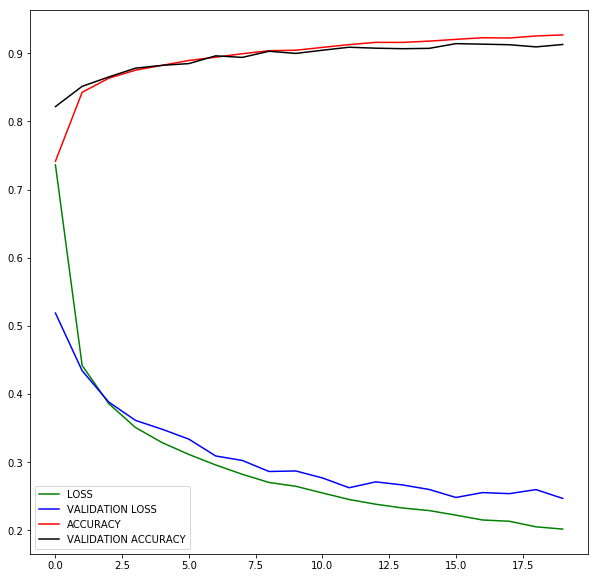

In [34]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'],'g',label = 'LOSS')
plt.plot(hist.history['val_loss'],'b',label = 'VALIDATION LOSS')
plt.plot(hist.history['acc'],'r',label = 'ACCURACY')
plt.plot(hist.history['val_acc'],'black',label = 'VALIDATION ACCURACY')
plt.legend()
plt.show()